In [ ]:
# Helper libraries
import datetime
import time
from packaging import version
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
import numpy as np
import pandas as pd
from numpy.random import seed

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.3.0


In [ ]:
print("Keras version: ", keras.__version__)

Keras version:  2.4.0


In [ ]:
%matplotlib inline

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print('train_images:\t{}'.format(train_images.shape))
print('train_labels:\t{}'.format(train_labels.shape))
print('test_images:\t\t{}'.format(test_images.shape))
print('test_labels:\t\t{}'.format(test_labels.shape))

train_images:	(60000, 28, 28)
train_labels:	(60000,)
test_images:		(10000, 28, 28)
test_labels:		(10000,)


In [ ]:
print("First ten labels training dataset:\n {}\n".format(train_labels[0:10]))
print("This output is the numeric label, need to convert to item description")

First ten labels training dataset:
 [9 0 0 3 0 2 7 2 5 5]

This output is the numeric label, need to convert to item description


In [ ]:
# from collections import Counter
Counter(train_labels).most_common()

[(9, 6000),
 (0, 6000),
 (3, 6000),
 (2, 6000),
 (7, 6000),
 (5, 6000),
 (1, 6000),
 (6, 6000),
 (4, 6000),
 (8, 6000)]

In [ ]:
Counter(test_labels).most_common()

[(9, 1000),
 (2, 1000),
 (1, 1000),
 (6, 1000),
 (4, 1000),
 (5, 1000),
 (7, 1000),
 (3, 1000),
 (8, 1000),
 (0, 1000)]

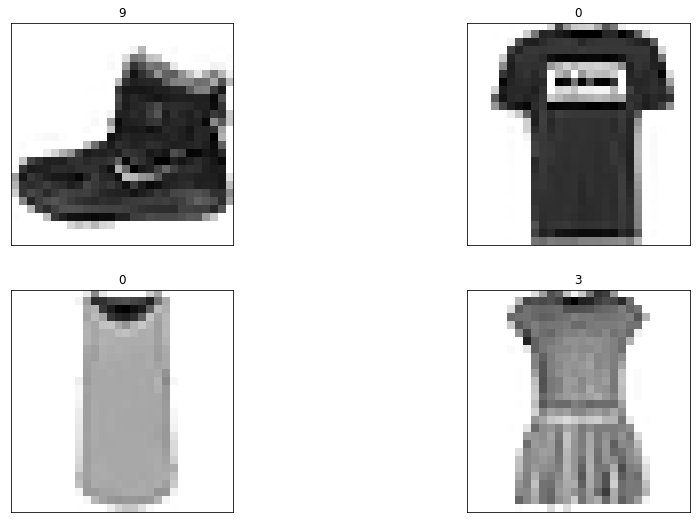

In [ ]:
fig = plt.figure(figsize = (15, 9))

for i in range(4):
    plt.subplot(2, 2, 1+i)
    plt.title(train_labels[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].reshape(28,28), cmap='binary')

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

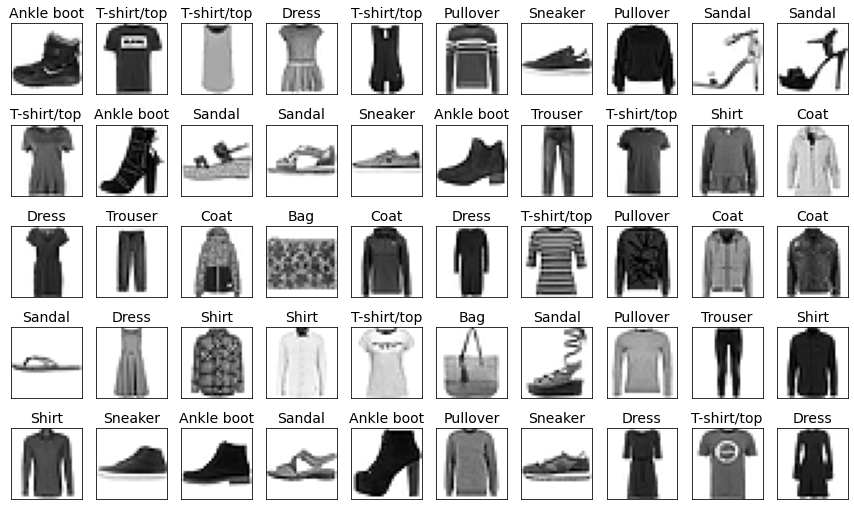

In [ ]:
fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(class_names[train_labels[i]], fontsize=14)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].reshape(28,28), cmap='binary')

In [ ]:
np.set_printoptions(linewidth=np.inf)
print("{}".format(train_images[0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images_norm = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images_norm = test_images.astype('float32')/255

In [ ]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

# Deep Neural Net Experiments (w/ Adam Optimizer)

In [ ]:
def dnnModel(num_layers, hidden_units, hidden_activation, dropout, epochs, optimizer, name):

  seed(5)
  tf.random.set_seed(5)

  model = models.Sequential()
  model.add(layers.Flatten())

  for x in range(0,num_layers):
  
    model.add(layers.Dense(units=hidden_units[x], activation=hidden_activation))

  if dropout > 0:

    model.add(layers.Dropout(dropout))

  model.add(layers.Dense(units=10, activation='softmax'))

  model.compile(
      optimizer=optimizer, 
      loss='categorical_crossentropy', 
      metrics=['accuracy'])

  start_time = time.time()

  history = model.fit(
      x=train_images_norm, 
      y=train_labels_encoded, 
      epochs=epochs, 
      validation_split=(1/60), 
      batch_size=100,
      verbose=False)
  
  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  plt.figure(figsize=(12, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
      plt.subplot(1, 2, i + 1)
      plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
      plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
      plt.legend()
  plt.show()
  
  total_time = time.time() - start_time

  loss, accuracy = model.evaluate(test_images_norm, test_labels_encoded)

  results = {
      'Model':name,
      'Seed':5,
      'Layers':num_layers, 
      'Hidden Nodes':hidden_units,
      'Hidden Activation':hidden_activation,
      'Dropout Rate':dropout,
      'Epochs':epochs,
      'Optimizer':optimizer,
      'Time':total_time,
      'Test Accuracy':accuracy
      }

  return (model,results)

def modelInsights(model):

  preds = model.predict(test_images_norm)

  plot = plt.figure(figsize = (12, 16))

  start_index = 0

  for i in range(25):
      plot = plt.subplot(5, 5, i + 1)
      plot = plt.grid(False)
      plot = plt.xticks([])
      plot = plt.yticks([])
      pred = np.argmax(preds[start_index + i])
      actual = np.argmax(test_labels_encoded[start_index + i])
      col = 'g'
      if pred != actual:
          col = 'r'
      plot = plt.xlabel('i={}\nPredicted={}\nActual={}'.format(start_index + i, class_names[pred], class_names[actual]), color = col)
      plot = plt.imshow(test_images[start_index + i].reshape(28,28), cmap='binary')

  print('First 25 Predictions')
  print('--------------------')
  plt.show()
  print()

  # Get the predicted classes (Test):
  pred_test = np.argmax(model.predict(test_images_norm), axis=-1)

  conf_mx = tf.math.confusion_matrix(test_labels, pred_test)

  print('Confusion Matrix (Testing Set)')
  print('------------------------------')

  fig, ax = plt.subplots(figsize=(15,15))
  ax = sns.heatmap(conf_mx, annot=True, fmt='g')

  ax.set_xlabel("Predicted Classes")
  ax.set_ylabel("Actual Classes")
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names, va='center')
  plt.show()
  print()

  for class_index in range(0,10):

    i = 0

    fig = plt.figure(figsize=(12,6))
    fig.suptitle('First 5 {} Images'.format(class_names[class_index]))

    for image in np.where(test_labels==class_index)[0][0:10]:

      ax = fig.add_subplot(2,5,i+1)
      ax.set_xticks([])
      ax.set_yticks([])
      pred = np.argmax(preds[image])
      actual = np.argmax(test_labels_encoded[image])
      col = 'g'
      if pred != actual:
          col = 'r'
      ax.set_xlabel('i={}\nPredicted={}\nActual={}'.format(image, class_names[pred], class_names[actual]), color = col)
      ax.imshow(test_images[image].reshape(28,28), cmap='binary')
      i = i+1

In [ ]:
dnn_results = pd.DataFrame(columns=['Model','Seed','Layers','Hidden Nodes','Hidden Activation','Dropout Rate','Epochs','Optimizer','Time','Test Accuracy'])

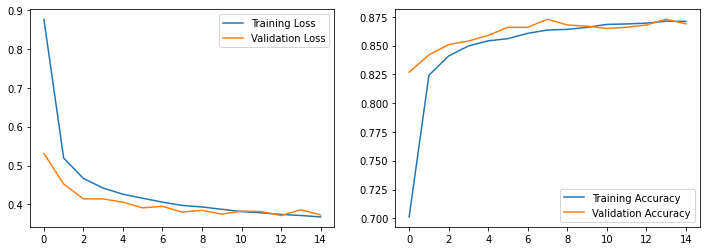

313/313 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8529
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp1_10_Model/assets


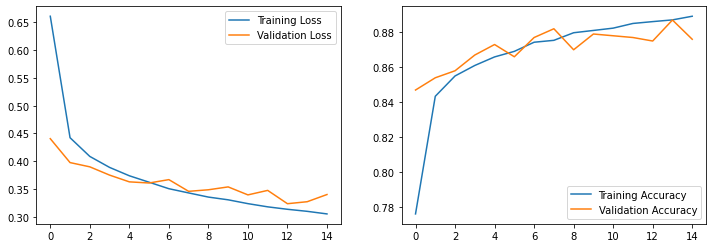

313/313 [==============================] - 0s 1ms/step - loss: 0.3800 - accuracy: 0.8665
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp1_20_Model/assets


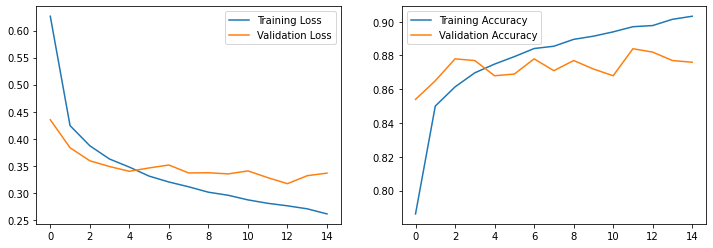

313/313 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8735
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp1_40_Model/assets


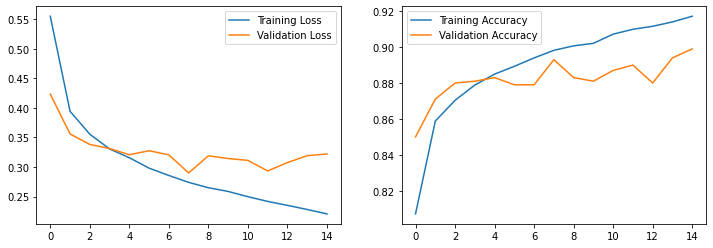

313/313 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8829
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp1_80_Model/assets


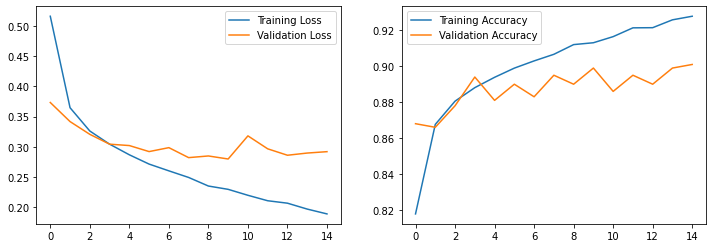

313/313 [==============================] - 1s 2ms/step - loss: 0.3341 - accuracy: 0.8889
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp1_160_Model/assets


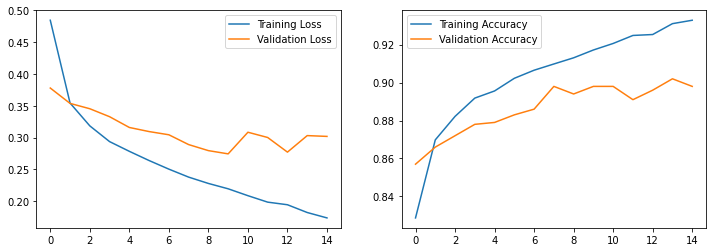

313/313 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8959
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp1_320_Model/assets


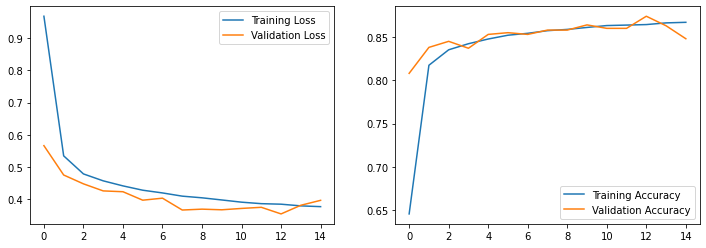

313/313 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.8354
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2_10_Model/assets


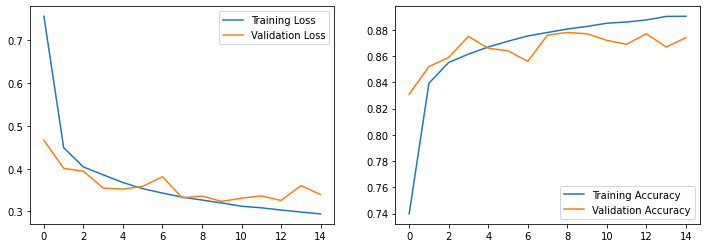

313/313 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8650
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2_20_Model/assets


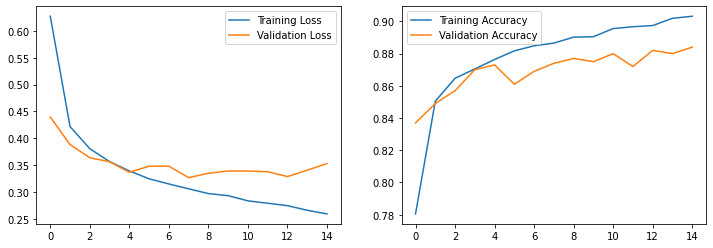

313/313 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.8715
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2_40_Model/assets


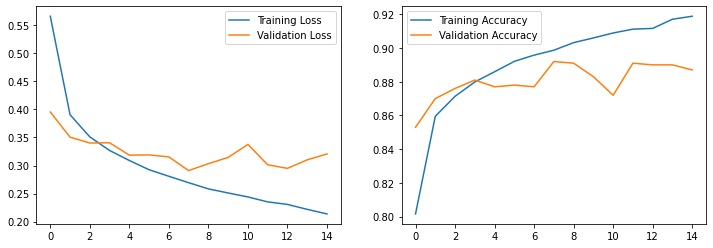

313/313 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8866
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2_80_Model/assets


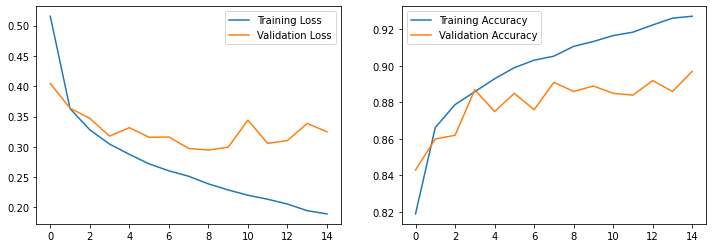

313/313 [==============================] - 1s 2ms/step - loss: 0.3484 - accuracy: 0.8842
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2_160_Model/assets


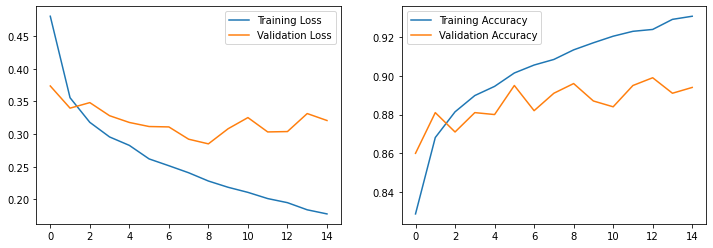

313/313 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8898
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2_320_Model/assets


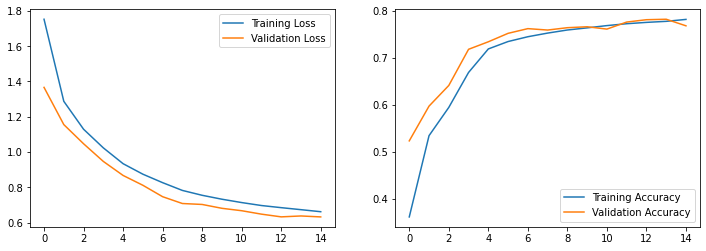

313/313 [==============================] - 0s 1ms/step - loss: 0.7163 - accuracy: 0.7680
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2b_10_Model/assets


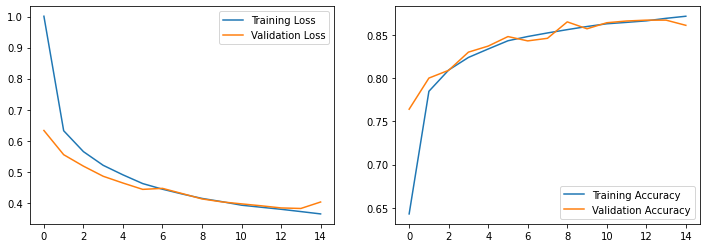

313/313 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8511
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2b_20_Model/assets


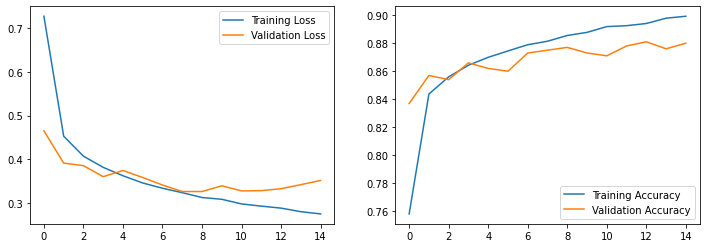

313/313 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8734
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2b_40_Model/assets


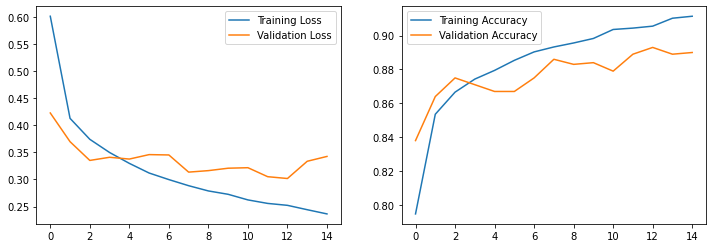

313/313 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8775
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2b_80_Model/assets


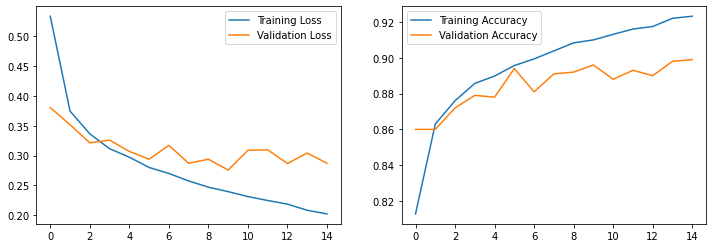

313/313 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8840
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2b_160_Model/assets


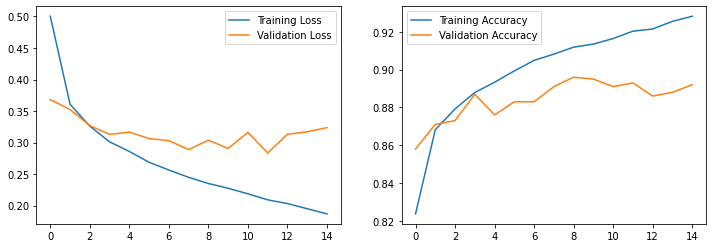

313/313 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8911
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2b_320_Model/assets


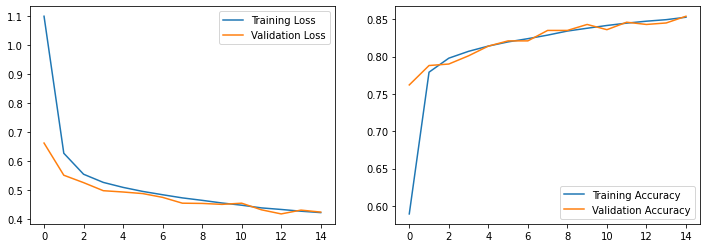

313/313 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.8317
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2c_10_Model/assets


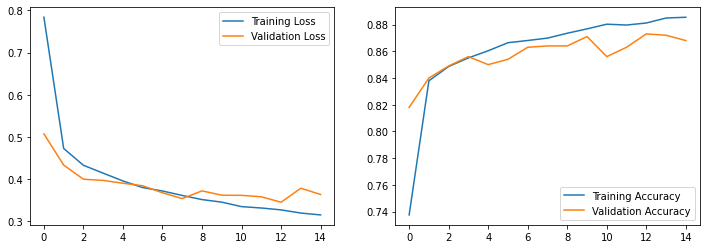

313/313 [==============================] - 0s 1ms/step - loss: 0.3827 - accuracy: 0.8617
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2c_20_Model/assets


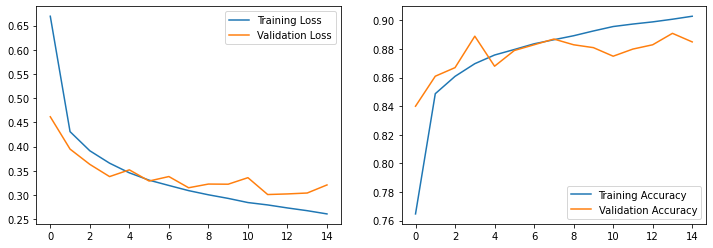

313/313 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8749
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2c_40_Model/assets


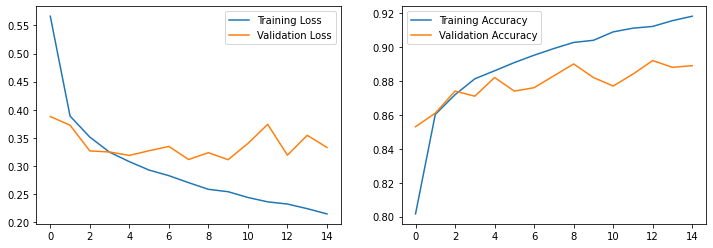

313/313 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.8856
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2c_80_Model/assets


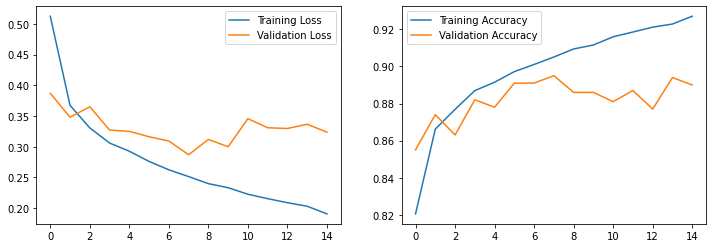

313/313 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8820
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2c_160_Model/assets


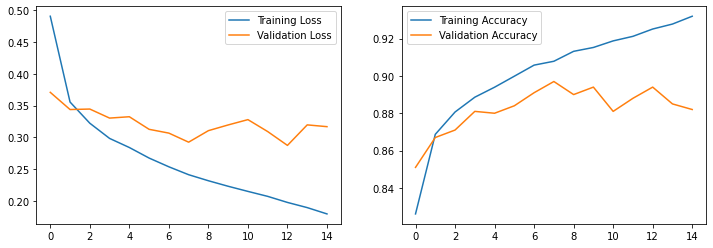

313/313 [==============================] - 1s 2ms/step - loss: 0.3437 - accuracy: 0.8855
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2c_320_Model/assets


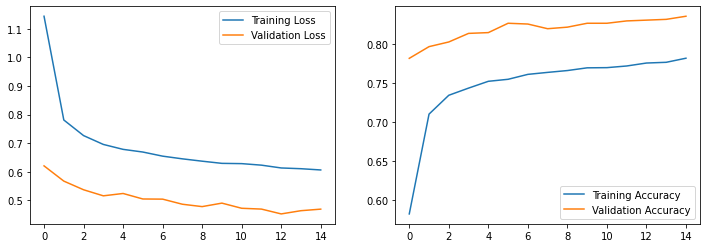

313/313 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.8266
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp1_10_Model_Dropout/assets


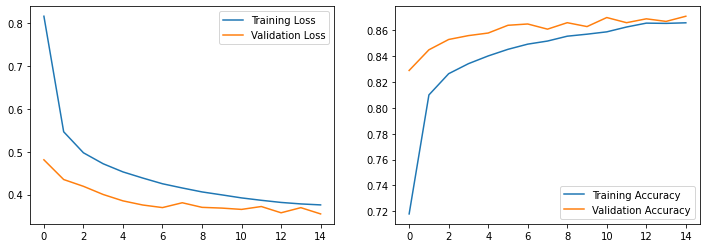

313/313 [==============================] - 0s 1ms/step - loss: 0.3893 - accuracy: 0.8600
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp1_20_Model_Dropout/assets


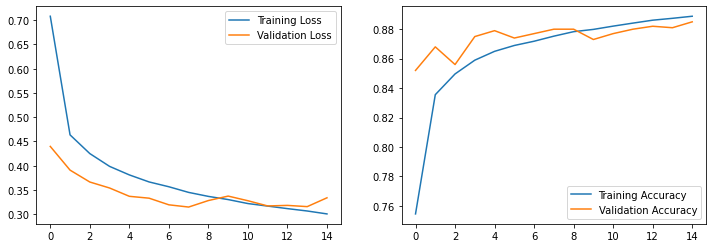

313/313 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8690
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp1_40_Model_Dropout/assets


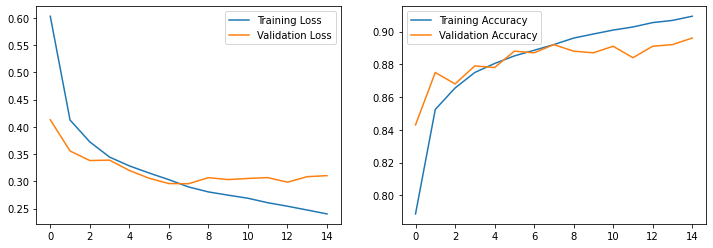

313/313 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8831
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp1_80_Model_Dropout/assets


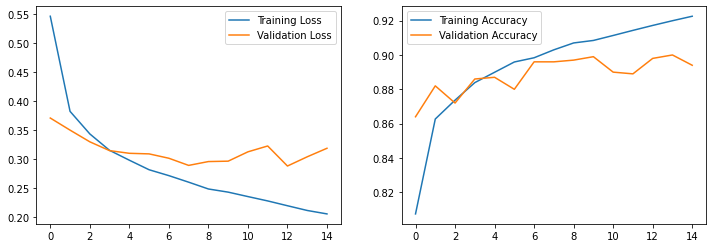

313/313 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8887
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp1_160_Model_Dropout/assets


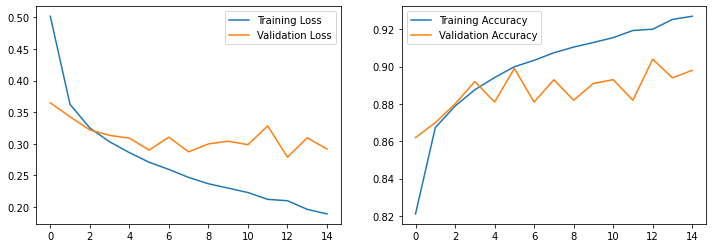

313/313 [==============================] - 1s 2ms/step - loss: 0.3294 - accuracy: 0.8918
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp1_320_Model_Dropout/assets


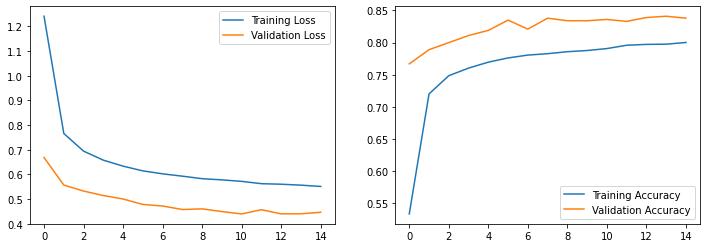

313/313 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.8301
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2_10_Model_Dropout/assets


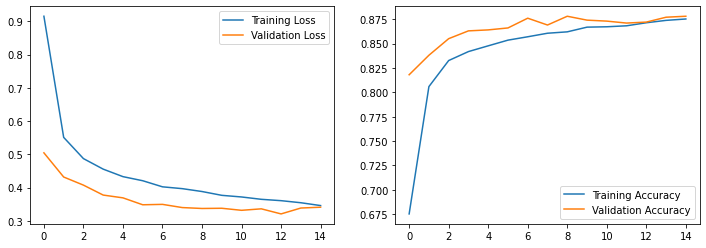

313/313 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8601
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2_20_Model_Dropout/assets


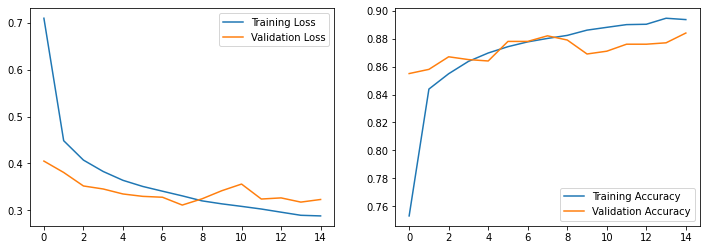

313/313 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8713
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2_40_Model_Dropout/assets


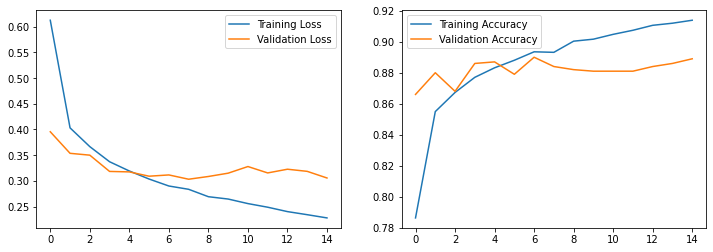

313/313 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8847
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2_80_Model_Dropout/assets


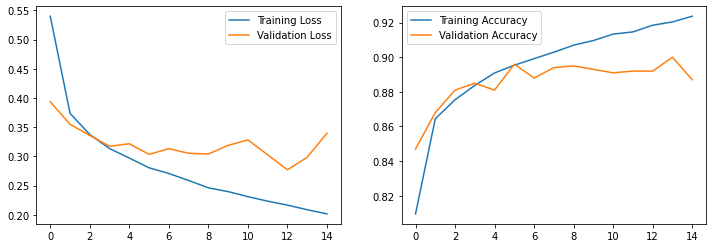

313/313 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8802
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2_160_Model_Dropout/assets


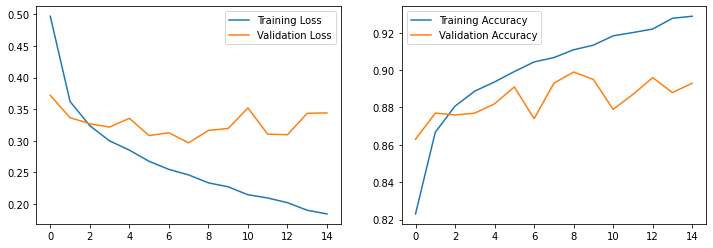

313/313 [==============================] - 1s 2ms/step - loss: 0.3560 - accuracy: 0.8891
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2_320_Model_Dropout/assets


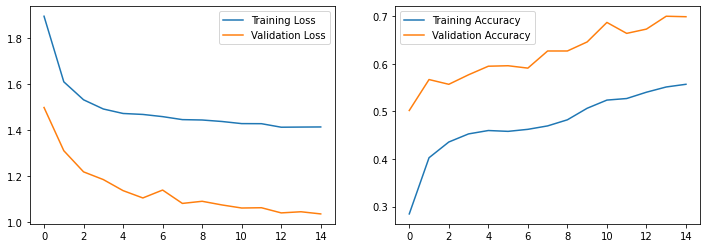

313/313 [==============================] - 0s 1ms/step - loss: 1.0973 - accuracy: 0.6828
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2b_10_Model_Dropout/assets


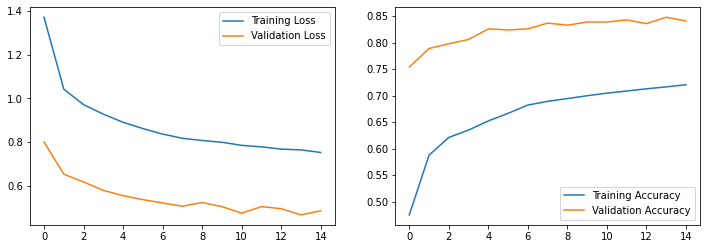

313/313 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.8294
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2b_20_Model_Dropout/assets


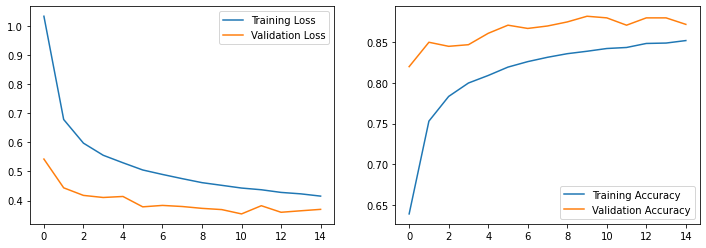

313/313 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8666
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2b_40_Model_Dropout/assets


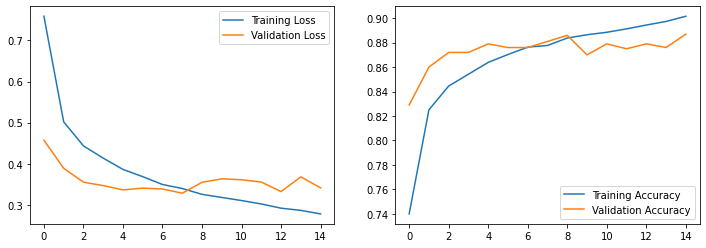

313/313 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8791
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2b_80_Model_Dropout/assets


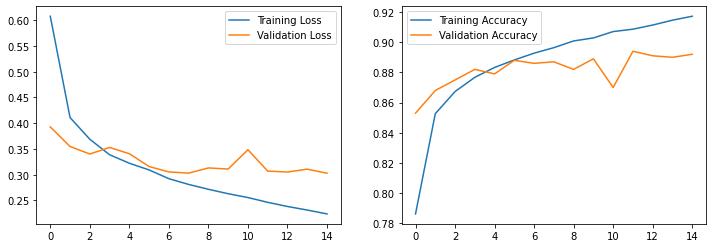

313/313 [==============================] - 1s 2ms/step - loss: 0.3464 - accuracy: 0.8822
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2b_160_Model_Dropout/assets


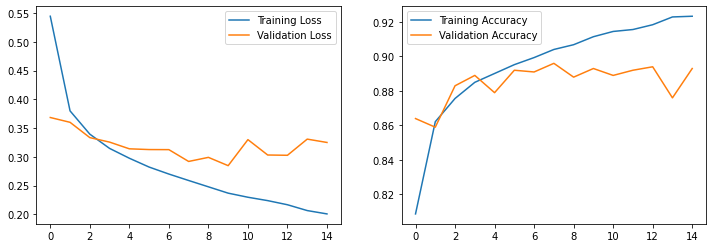

313/313 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8852
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2b_320_Model_Dropout/assets


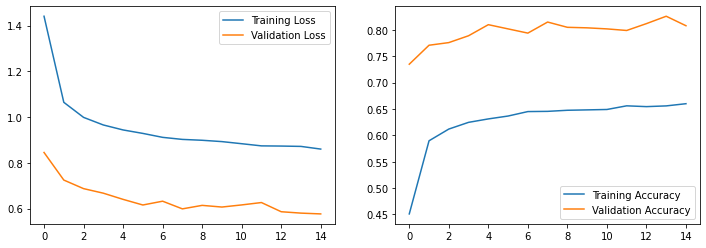

313/313 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.7961
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2c_10_Model_Dropout/assets


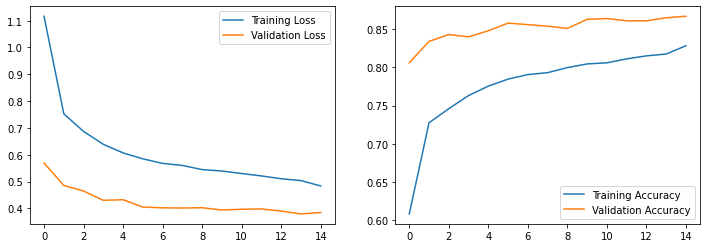

313/313 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.8559
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2c_20_Model_Dropout/assets


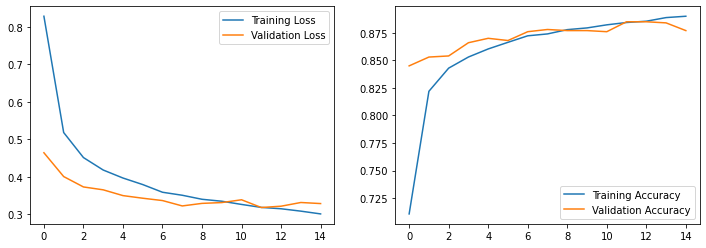

313/313 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 0.8691
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2c_40_Model_Dropout/assets


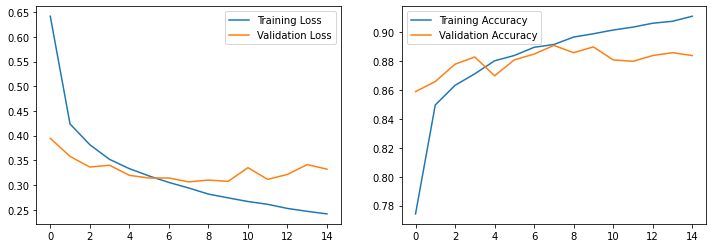

313/313 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8771
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2c_80_Model_Dropout/assets


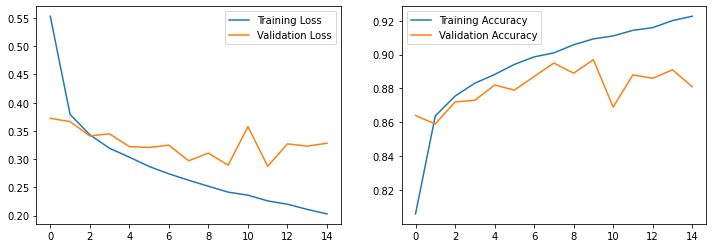

313/313 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8889
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2c_160_Model_Dropout/assets


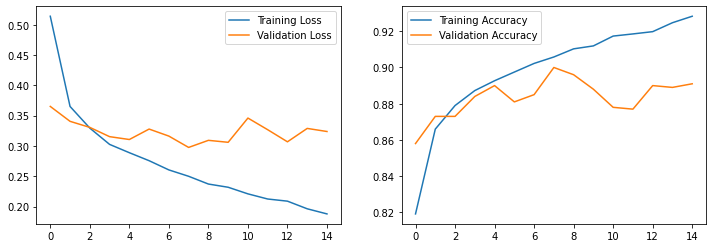

313/313 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8892
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp2c_320_Model_Dropout/assets


Model Seed Layers  ... Optimizer       Time Test Accuracy
0             Exp1_10_Model    5      2  ...      adam  15.296686        0.8529
1             Exp1_20_Model    5      2  ...      adam  16.477110        0.8665
2             Exp1_40_Model    5      2  ...      adam  16.423880        0.8735
3             Exp1_80_Model    5      2  ...      adam  18.701164        0.8829
4            Exp1_160_Model    5      2  ...      adam  27.339288        0.8889
5            Exp1_320_Model    5      2  ...      adam  47.265209        0.8959
6             Exp2_10_Model    5      3  ...      adam  16.012873        0.8354
7             Exp2_20_Model    5      3  ...      adam  15.481611        0.8650
8             Exp2_40_Model    5      3  ...      adam  17.316354        0.8715
9             Exp2_80_Model    5      3  ...      adam  20.747995        0.8866
10           Exp2_160_Model    5      3  ...      adam  35.400109        0.8842
11           Exp2_320_Model    5      3  ...      adam  67.278816        0.8898
12           Exp2b_10_Model    5      3  ...      adam  15.328039        0.7680
13           Exp2b_20_Model    5      3  ...      adam  15.362138        0.8511
14           Exp2b_40_Model    5      3  ...      adam  17.188245        0.8734
15           Exp2b_80_Model    5      3  ...      adam  19.022899        0.8775
16          Exp2b_160_Model    5      3  ...      adam  26.028244        0.8840
17          Exp2b_320_Model    5      3  ...      adam  41.303373        0.8911
18           Exp2c_10_Model    5      3  ...      adam  15.313271        0.8317
19           Exp2c_20_Model    5      3  ...      adam  16.013107        0.8617
20           Exp2c_40_Model    5      3  ...      adam  16.522624        0.8749
21           Exp2c_80_Model    5      3  ...      adam  20.261153        0.8856
22          Exp2c_160_Model    5      3  ...      adam  31.374561        0.8820
23          Exp2c_320_Model    5      3  ...      adam  56.610209        0.8855
24    Exp1_10_Model_Dropout    5      2  ...      adam  15.568735        0.8266
25    Exp1_20_Model_Dropout    5      2  ...      adam  15.626791        0.8600
26    Exp1_40_Model_Dropout    5      2  ...      adam  16.910317        0.8690
27    Exp1_80_Model_Dropout    5      2  ...      adam  20.230859        0.8831
28   Exp1_160_Model_Dropout    5      2  ...      adam  30.298517        0.8887
29   Exp1_320_Model_Dropout    5      2  ...      adam  50.654522        0.8918
30    Exp2_10_Model_Dropout    5      3  ...      adam  16.597235        0.8301
31    Exp2_20_Model_Dropout    5      3  ...      adam  16.549309        0.8601
32    Exp2_40_Model_Dropout    5      3  ...      adam  17.918334        0.8713
33    Exp2_80_Model_Dropout    5      3  ...      adam  22.733843        0.8847
34   Exp2_160_Model_Dropout    5      3  ...      adam  43.037478        0.8802
35   Exp2_320_Model_Dropout    5      3  ...      adam  66.772697        0.8891
36   Exp2b_10_Model_Dropout    5      3  ...      adam  15.170470        0.6828
37   Exp2b_20_Model_Dropout    5      3  ...      adam  16.472810        0.8294
38   Exp2b_40_Model_Dropout    5      3  ...      adam  17.439175        0.8666
39   Exp2b_80_Model_Dropout    5      3  ...      adam  19.450006        0.8791
40  Exp2b_160_Model_Dropout    5      3  ...      adam  26.993408        0.8822
41  Exp2b_320_Model_Dropout    5      3  ...      adam  43.305806        0.8852
42   Exp2c_10_Model_Dropout    5      3  ...      adam  15.835229        0.7961
43   Exp2c_20_Model_Dropout    5      3  ...      adam  16.441110        0.8559
44   Exp2c_40_Model_Dropout    5      3  ...      adam  17.760675        0.8691
45   Exp2c_80_Model_Dropout    5      3  ...      adam  20.631788        0.8771
46  Exp2c_160_Model_Dropout    5      3  ...      adam  35.157434        0.8889
47  Exp2c_320_Model_Dropout    5      3  ...      adam  55.938830        0.8892

[48 rows x 10 columns]

In [ ]:
node_options = [10, 20, 40, 80, 160, 320]

for dropout_option in [0,0.2]:

  for nodes in node_options:

    if dropout_option == 0:

      folder_name = 'Exp1_'+str(nodes)+'_Model'

    else:

      folder_name = 'Exp1_'+str(nodes)+'_Model_Dropout'

    exp_model = dnnModel(
      num_layers=2,
      hidden_units=[nodes,nodes],
      hidden_activation='relu',
      epochs=15,
      optimizer='adam',
      dropout=dropout_option,
      name=folder_name
    )

    exp_model[0].save('/content/drive/My Drive/Colab Notebooks/'+folder_name)

    dnn_results = dnn_results.append(exp_model[1],ignore_index=True)

  for nodes in node_options:

    if dropout_option == 0:

      folder_name = 'Exp2_'+str(nodes)+'_Model'

    else:

      folder_name = 'Exp2_'+str(nodes)+'_Model_Dropout'

    exp_model = dnnModel(
      num_layers=3,
      hidden_units=[nodes,nodes,nodes],
      hidden_activation='relu',
      epochs=15,
      optimizer='adam',
      dropout=dropout_option,
      name=folder_name
    )

    exp_model[0].save('/content/drive/My Drive/Colab Notebooks/'+folder_name)

    dnn_results = dnn_results.append(exp_model[1],ignore_index=True)

  for nodes in node_options:

    if dropout_option == 0:

      folder_name = 'Exp2b_'+str(nodes)+'_Model'

    else:

      folder_name = 'Exp2b_'+str(nodes)+'_Model_Dropout'

    exp_model = dnnModel(
        num_layers=3,
        hidden_units=[nodes,nodes/2,nodes/4],
        hidden_activation='relu',
        epochs=15,
        optimizer='adam',
        dropout=dropout_option,
        name=folder_name
      )

    exp_model[0].save('/content/drive/My Drive/Colab Notebooks/'+folder_name)

    dnn_results = dnn_results.append(exp_model[1],ignore_index=True)

  for nodes in node_options:

    if dropout_option == 0:

      folder_name = 'Exp2c_'+str(nodes)+'_Model'

    else:

      folder_name = 'Exp2c_'+str(nodes)+'_Model_Dropout'

    exp_model = dnnModel(
        num_layers=3,
        hidden_units=[nodes,nodes,nodes/2],
        hidden_activation='relu',
        epochs=15,
        optimizer='adam',
        dropout=dropout_option,
        name=folder_name
      )

    exp_model[0].save('/content/drive/My Drive/Colab Notebooks/'+folder_name)

    dnn_results = dnn_results.append(exp_model[1],ignore_index=True)

dnn_results.to_csv('DNN_Results.csv')
dnn_results

In [ ]:
dnn_results.to_csv('/content/drive/My Drive/Colab Notebooks/DNN_Results.csv')

## Experiment 1 (DNN w/ 2 Layers of Equal Size)


1.   No Dropout Layer
2.   Dropout Layer (20%)



First 25 Predictions
--------------------


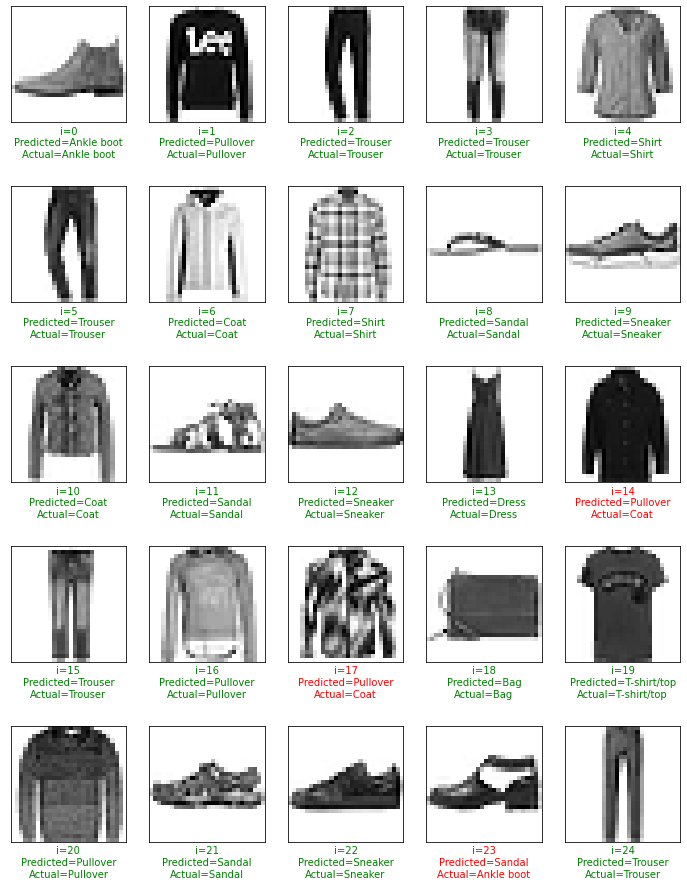


Confusion Matrix (Testing Set)
------------------------------


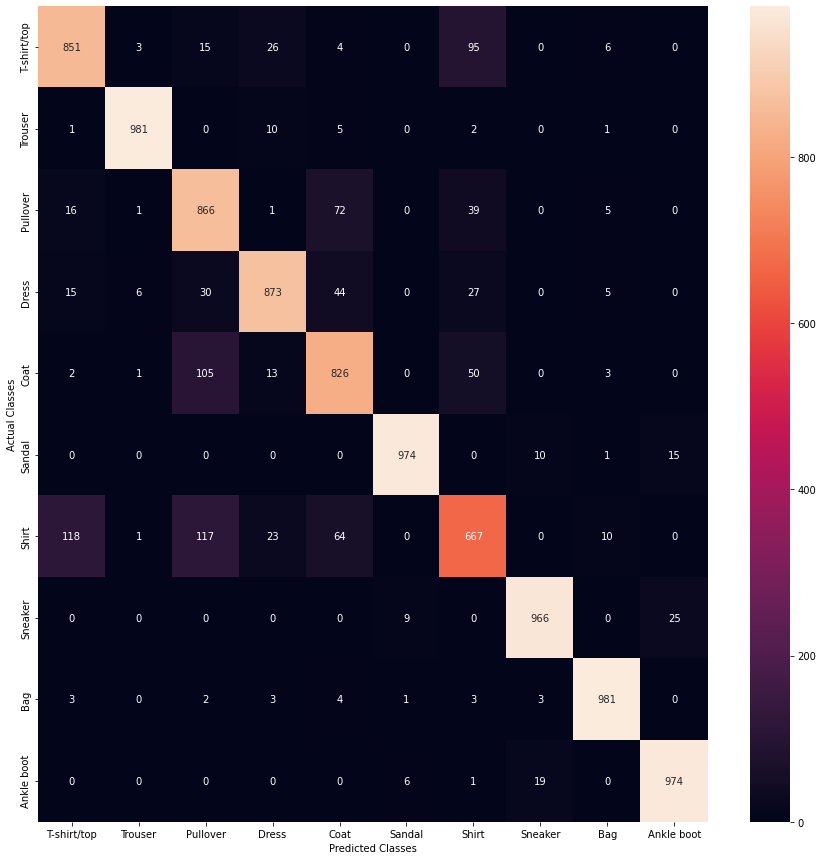

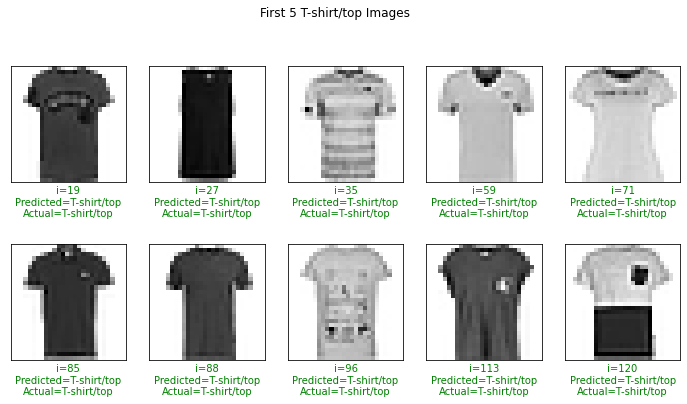

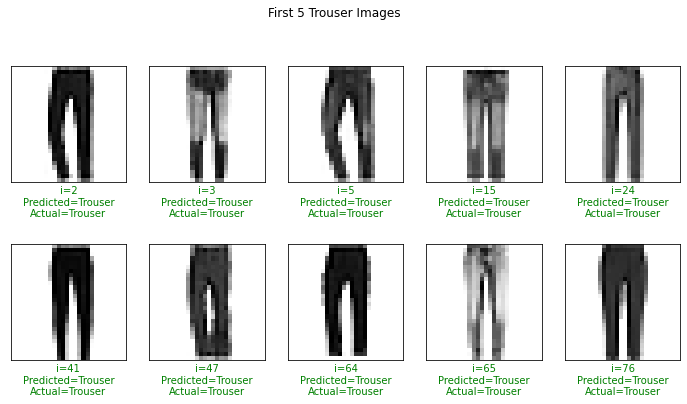

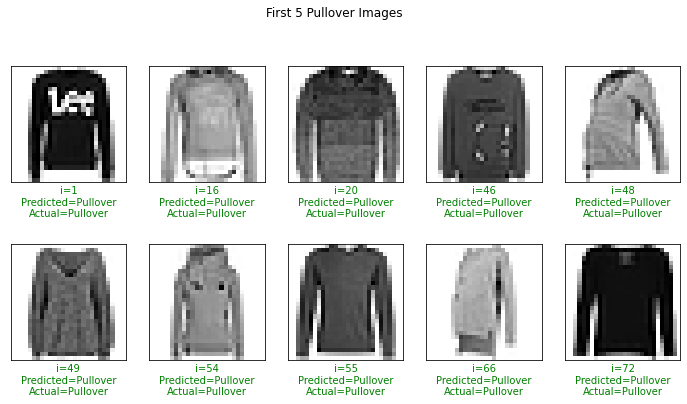

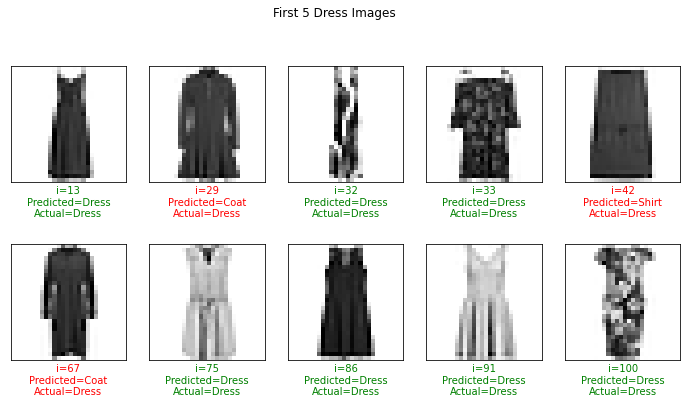

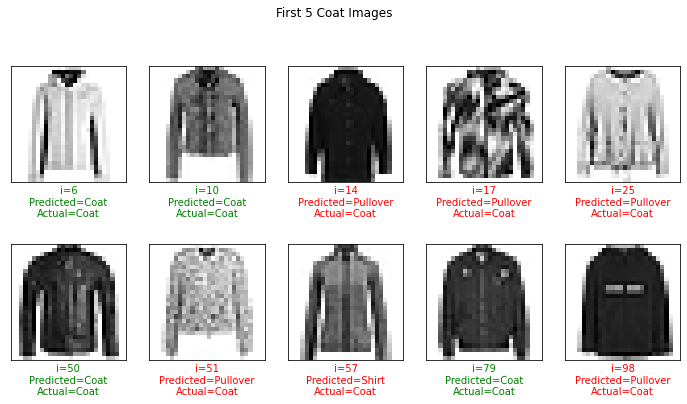

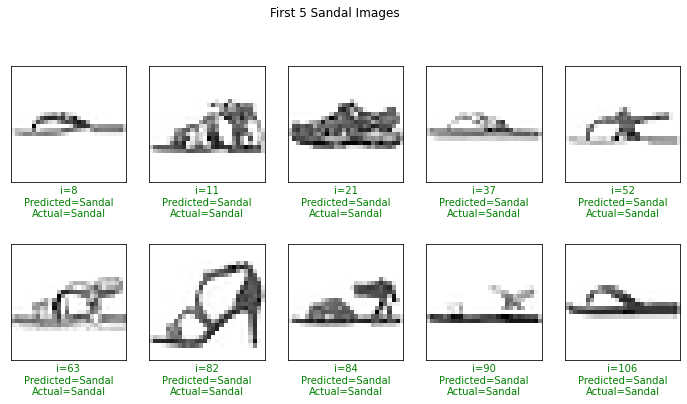

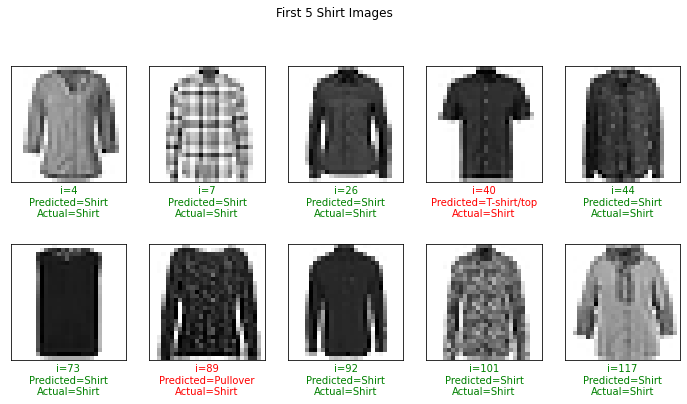

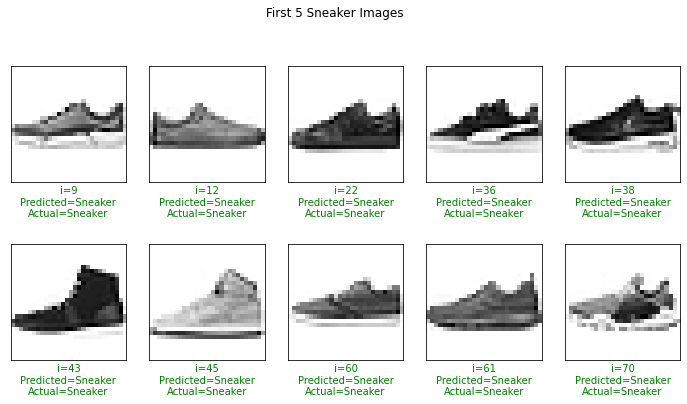

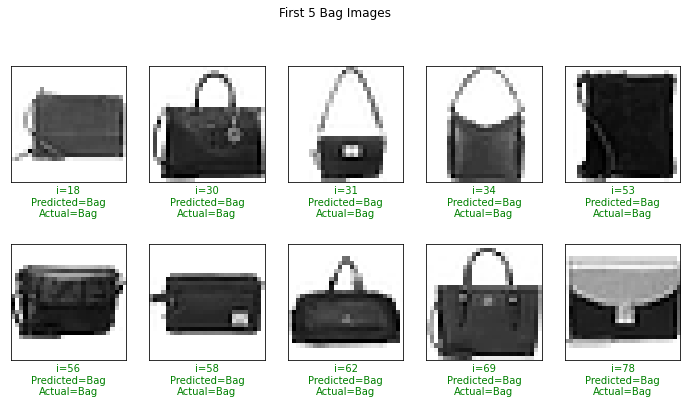

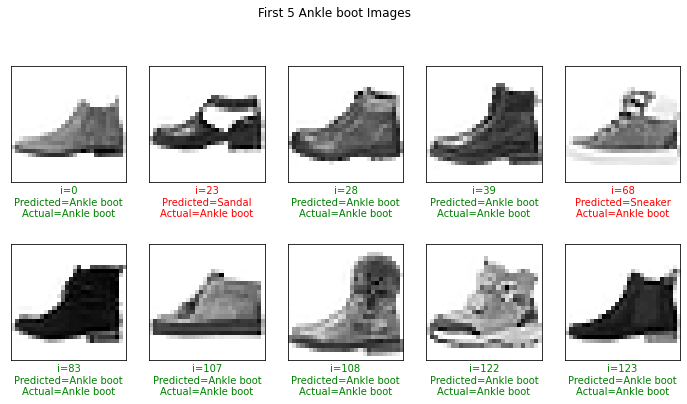

In [ ]:
exp1_best = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Exp1_320_Model')
modelInsights(exp1_best)

First 25 Predictions
--------------------


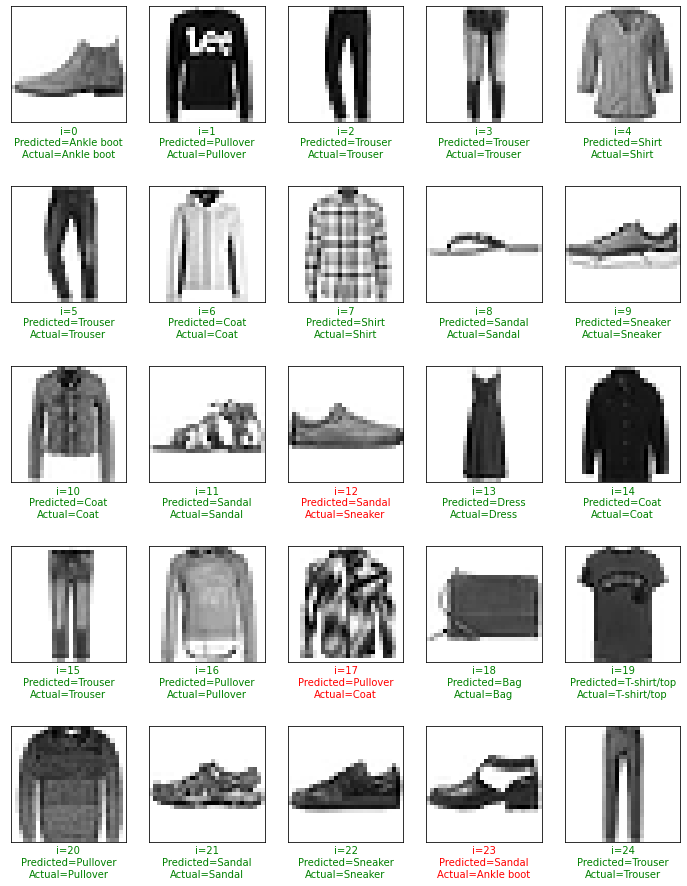


Confusion Matrix (Testing Set)
------------------------------


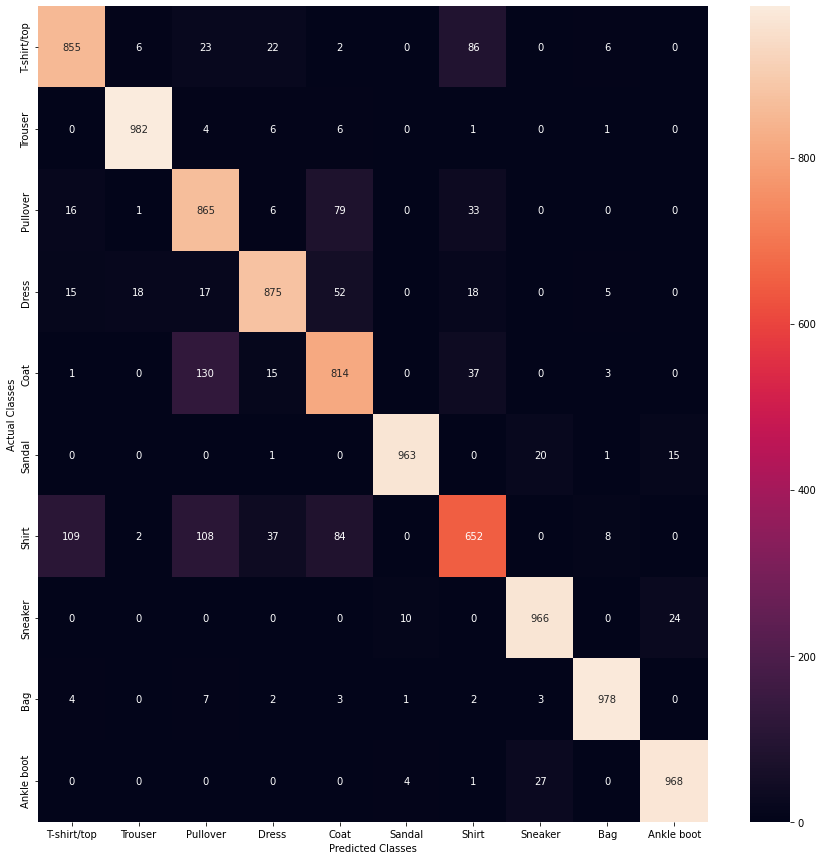

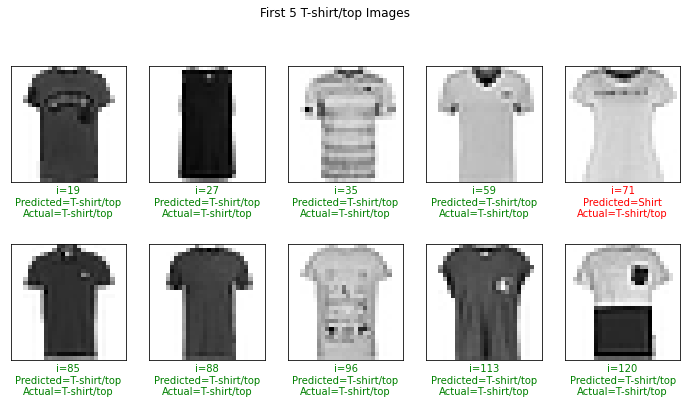

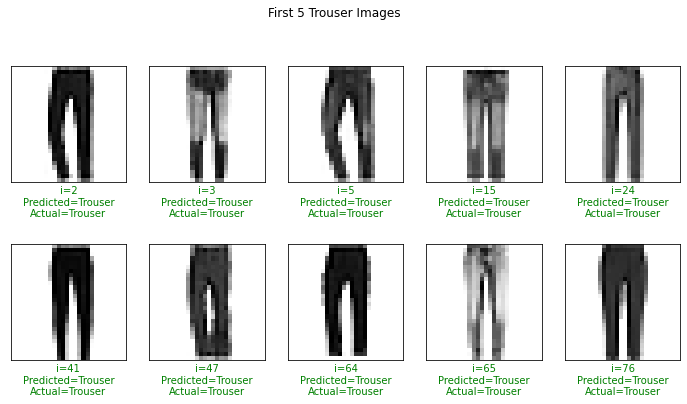

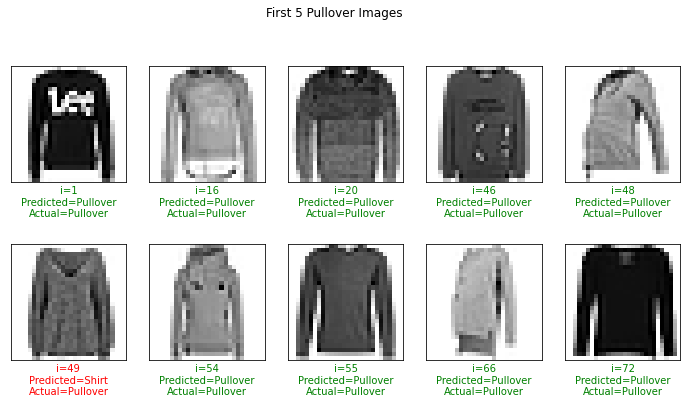

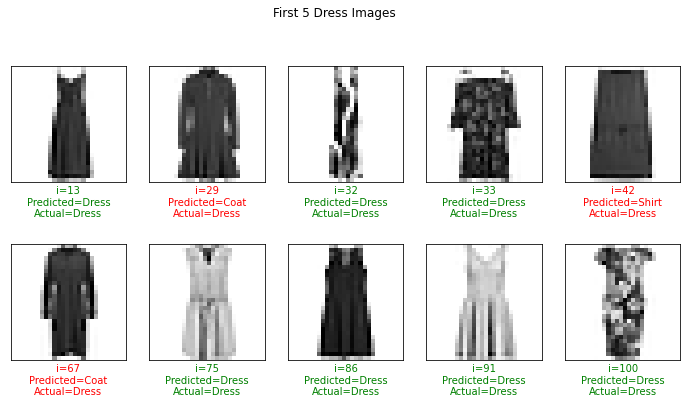

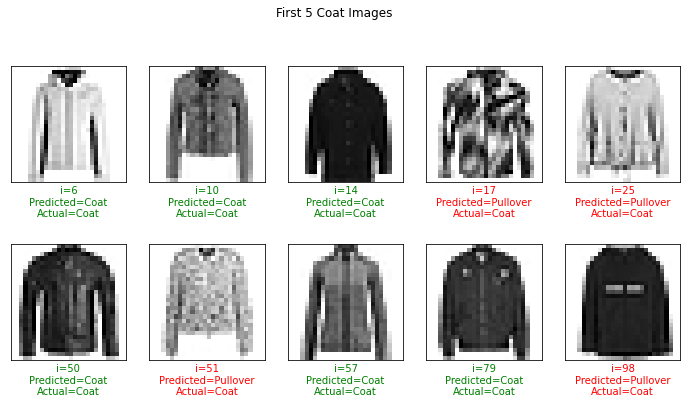

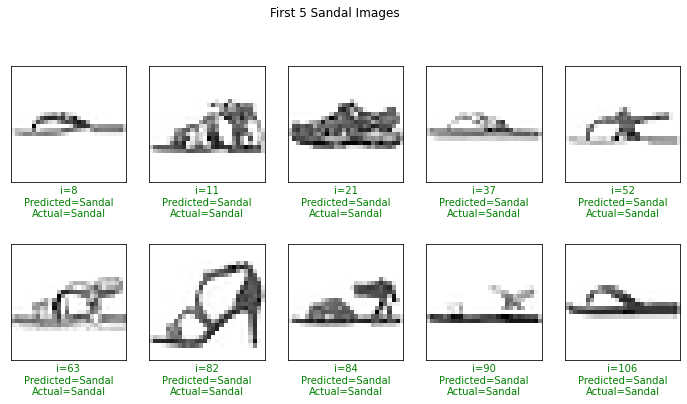

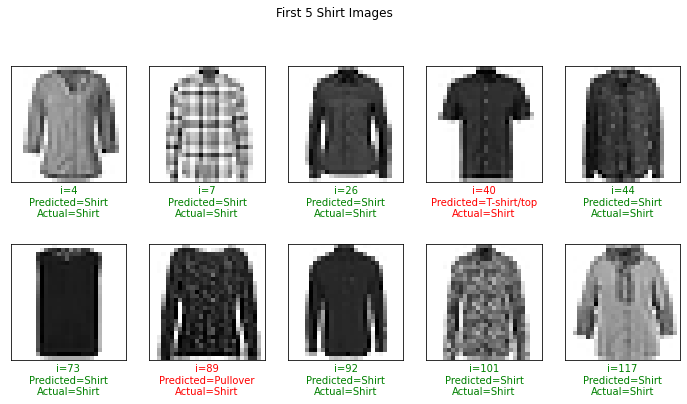

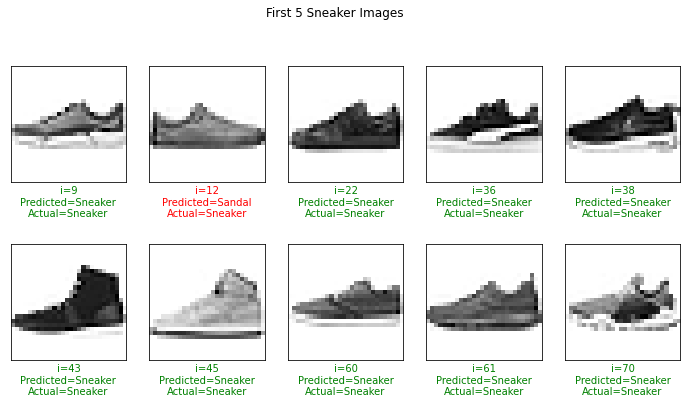

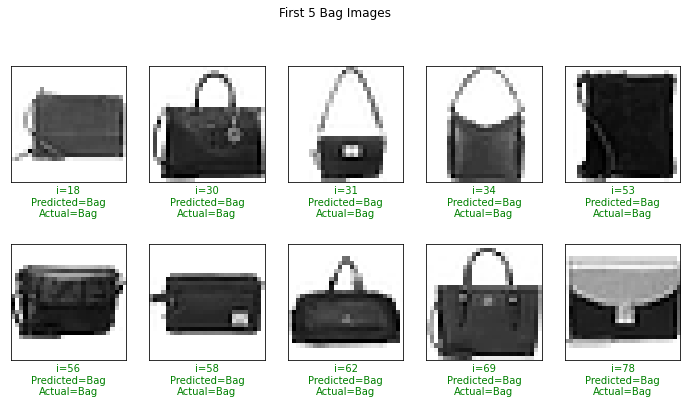

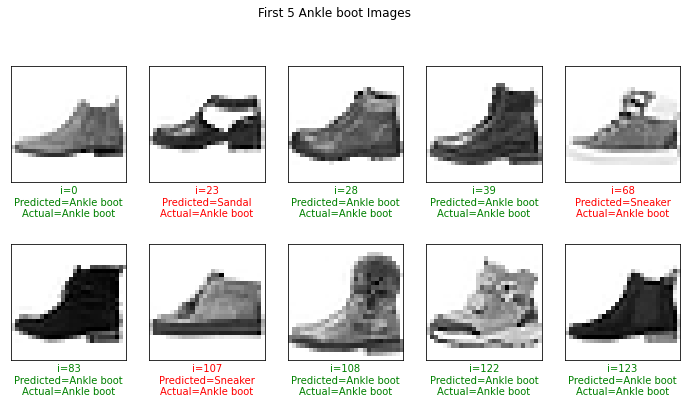

In [ ]:
exp1_dropout_best = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Exp1_320_Model_Dropout')
modelInsights(exp1_dropout_best)

In [ ]:
dnn_results['Experiment'] = dnn_results['Model'].apply(lambda x: x.split('_')[0])
dnn_results['N'] = dnn_results['Hidden Nodes'].apply(lambda x: x[0])

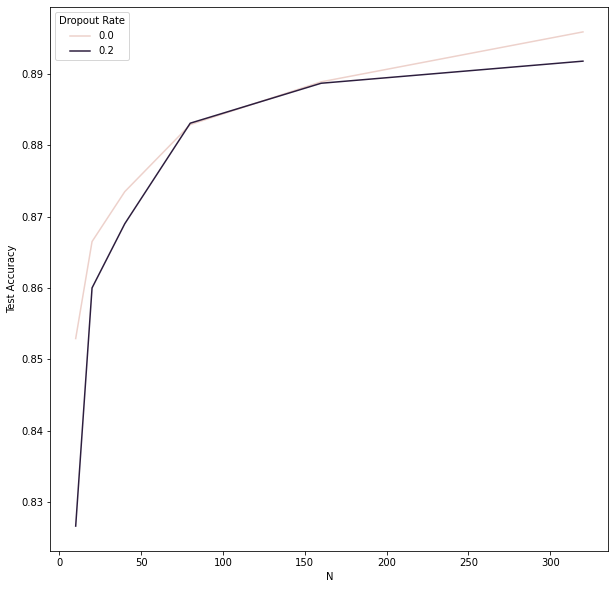

In [ ]:
plot_df = dnn_results[dnn_results['Experiment'] == 'Exp1']

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(x='N',y='Test Accuracy',data=plot_df,hue='Dropout Rate')

## Experiment 2 (DNN w/ 3 Layers of Equal Size)



First 25 Predictions
--------------------


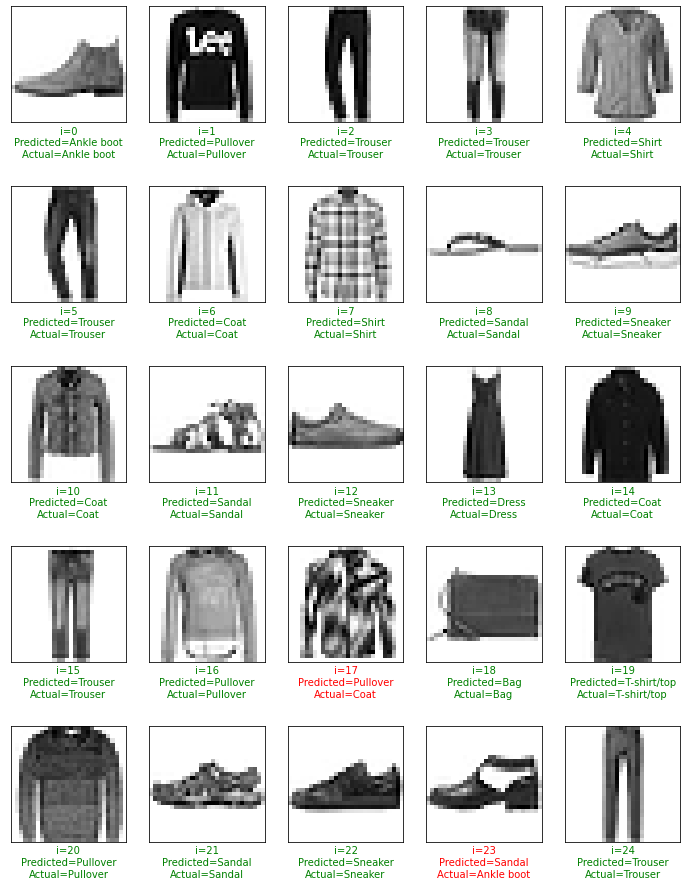


Confusion Matrix (Testing Set)
------------------------------


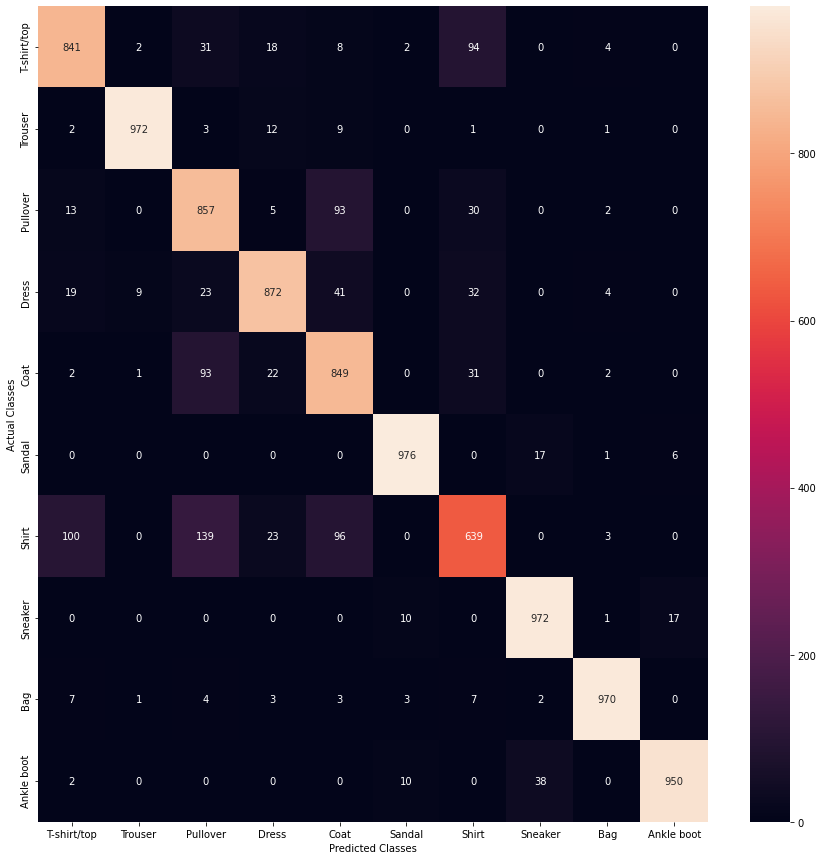

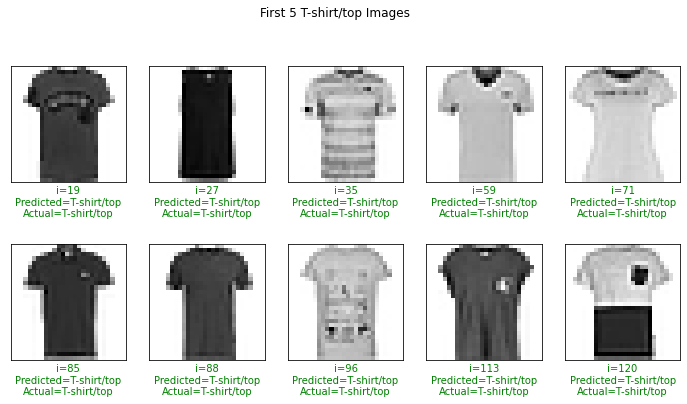

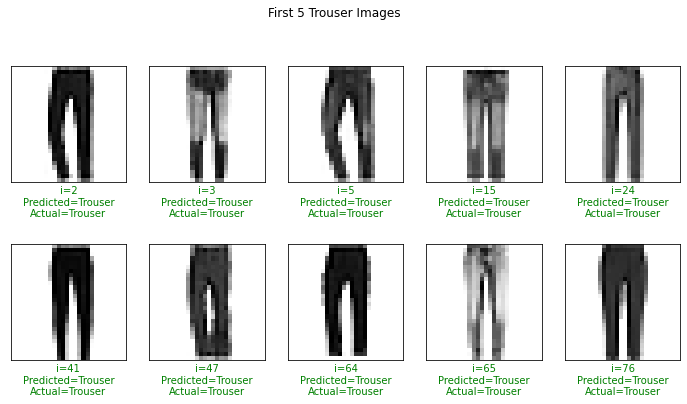

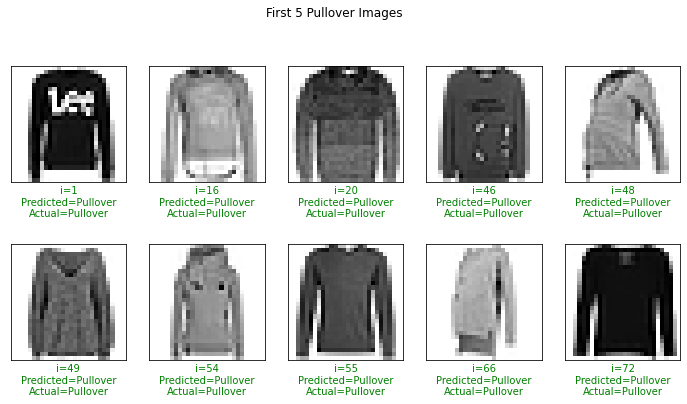

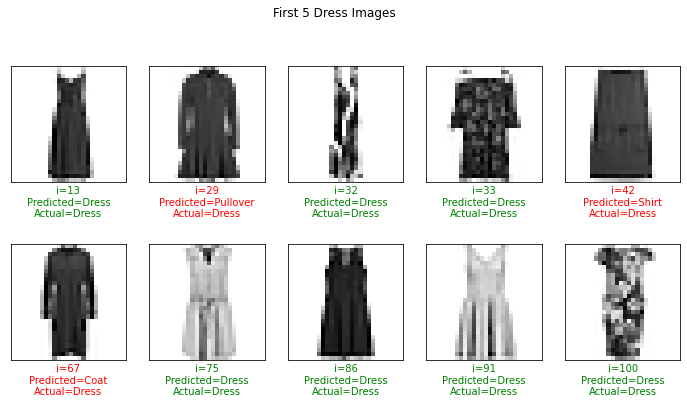

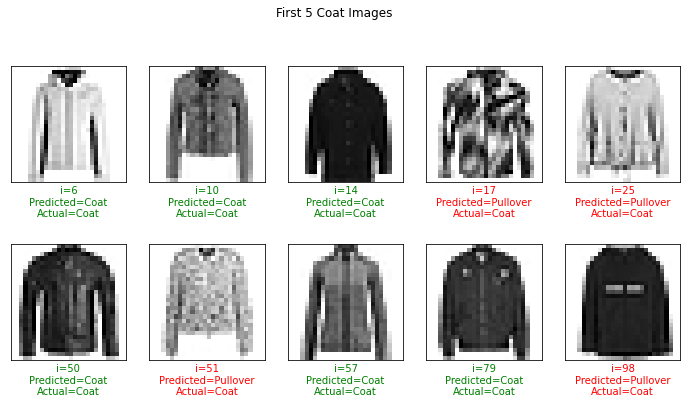

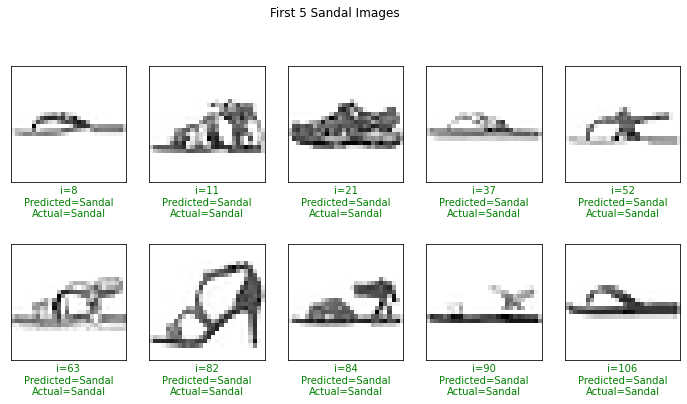

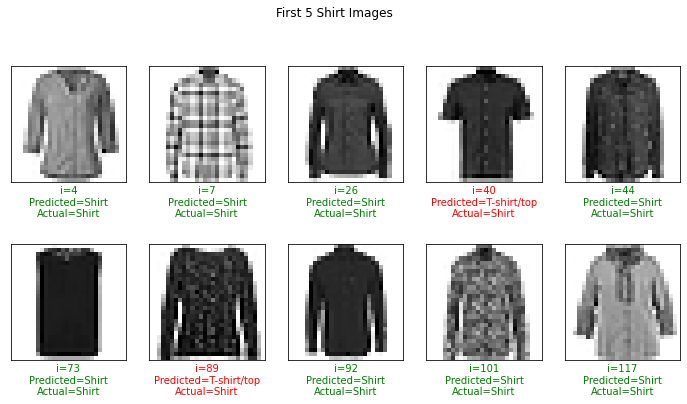

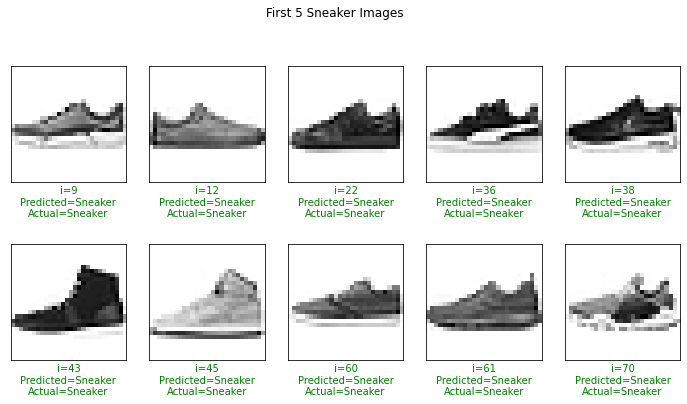

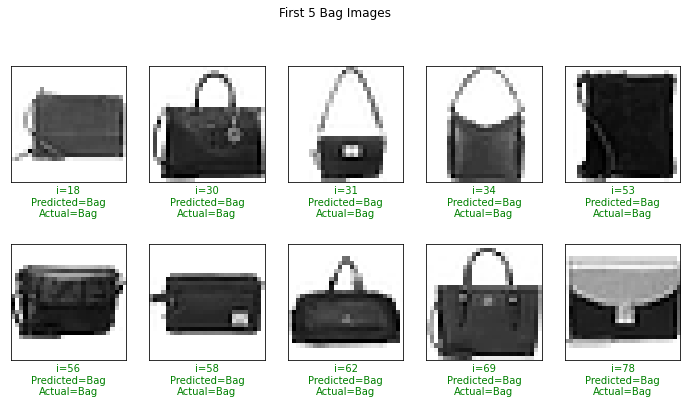

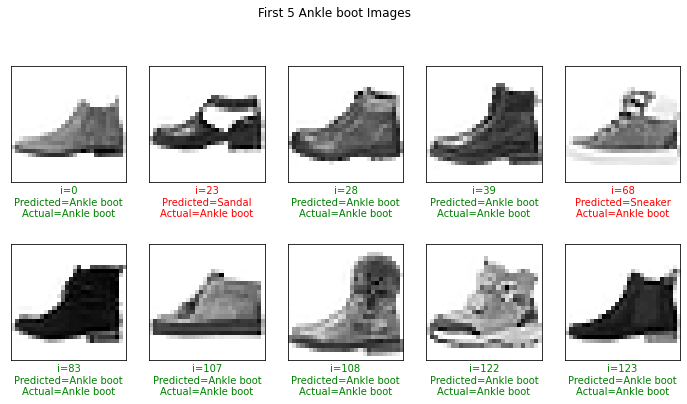

In [ ]:
exp2_best = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Exp2_320_Model')
modelInsights(exp2_best)

First 25 Predictions
--------------------


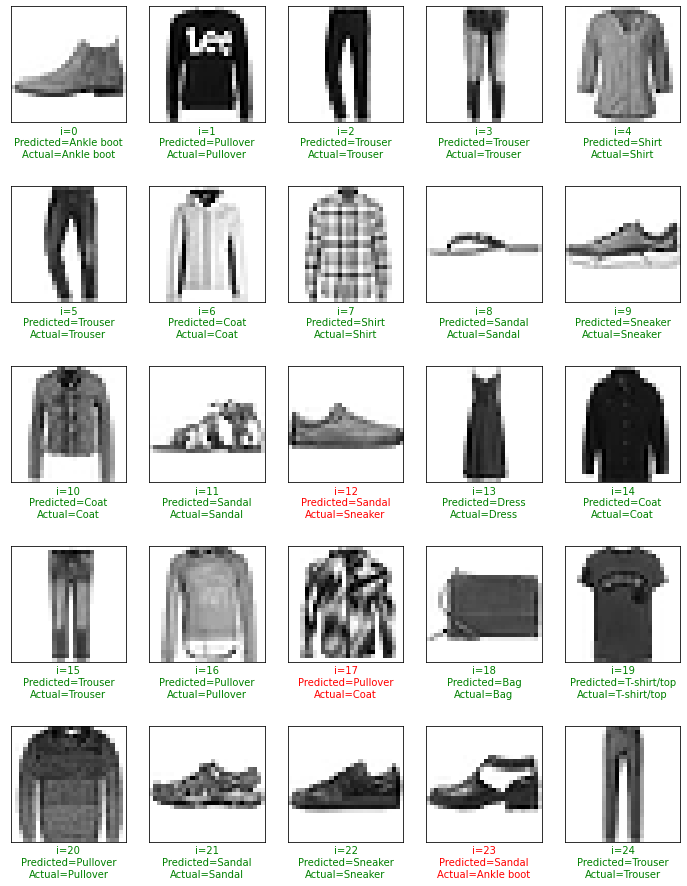


Confusion Matrix (Testing Set)
------------------------------


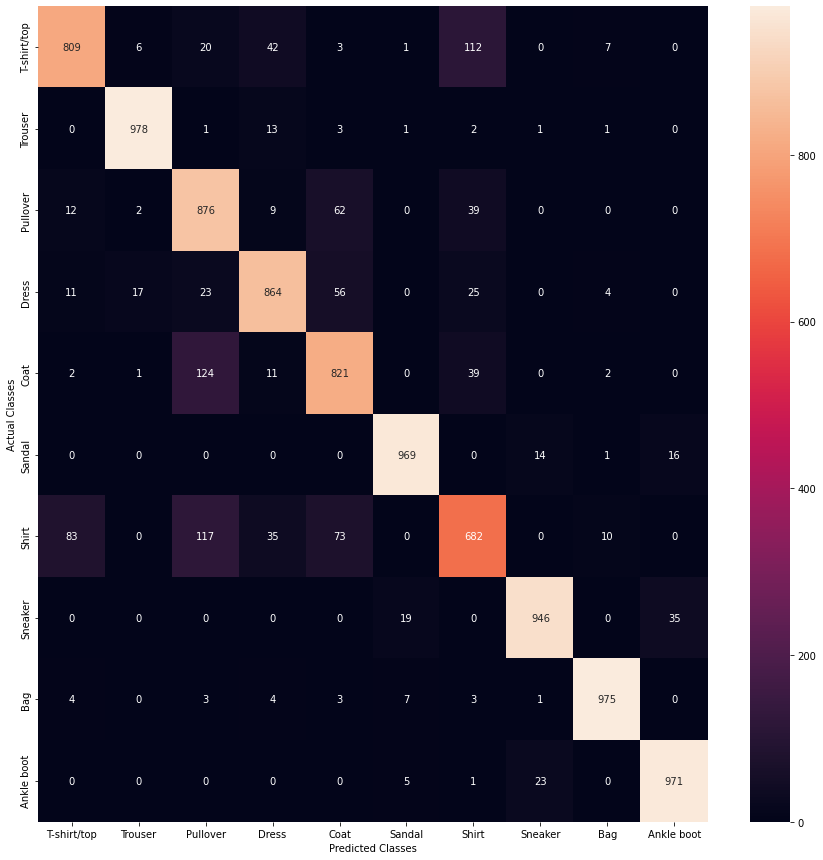

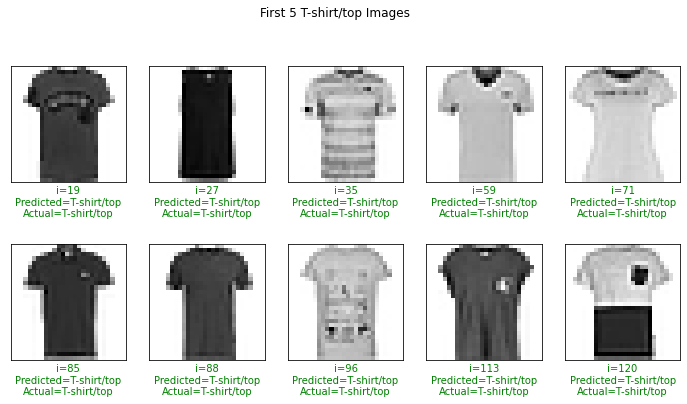

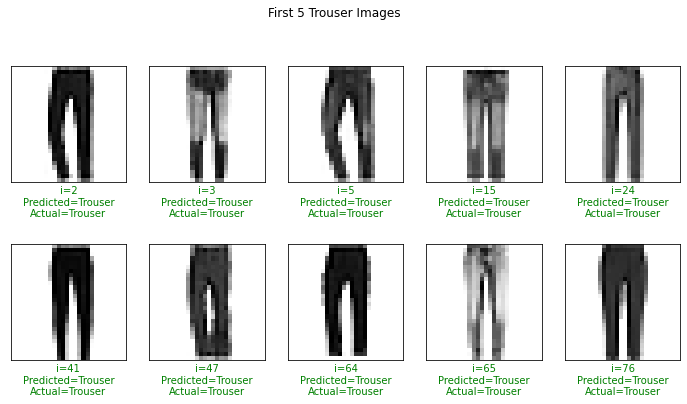

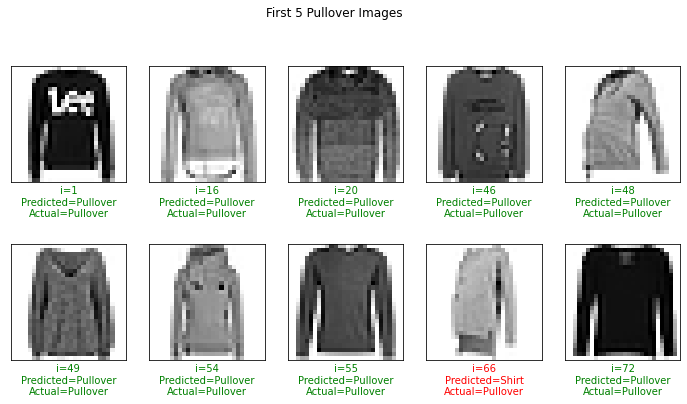

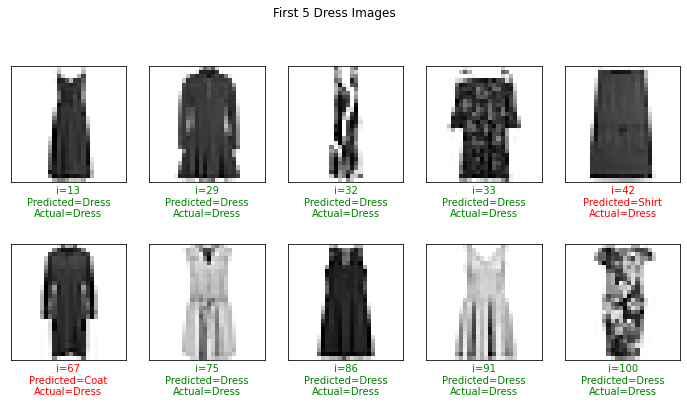

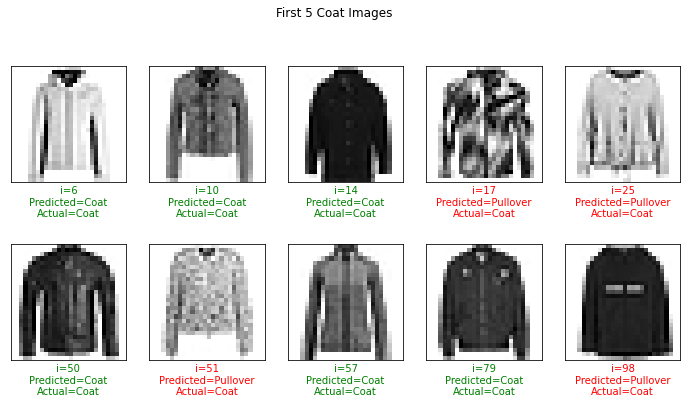

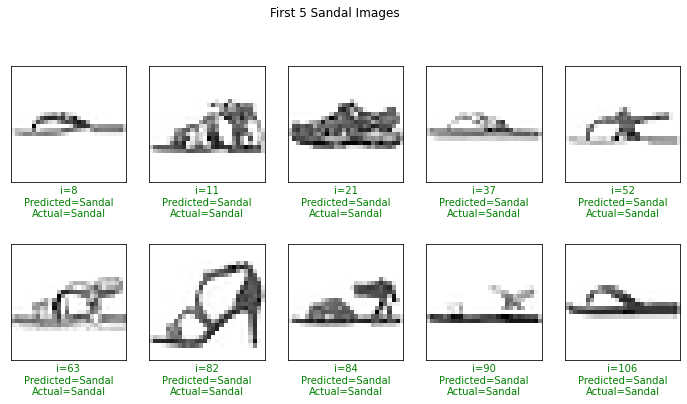

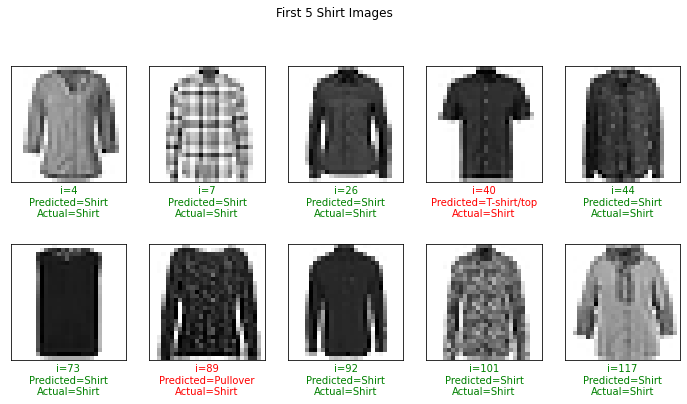

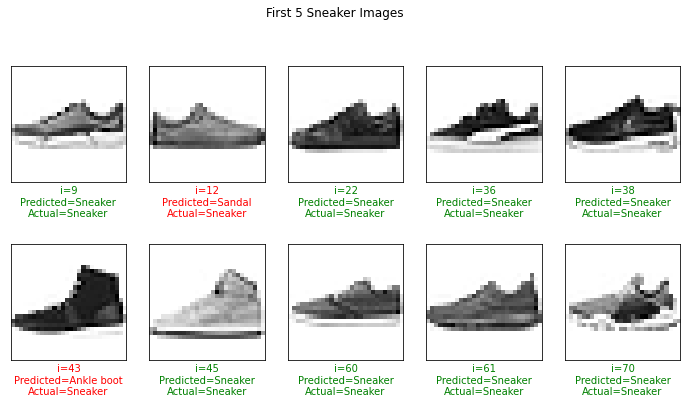

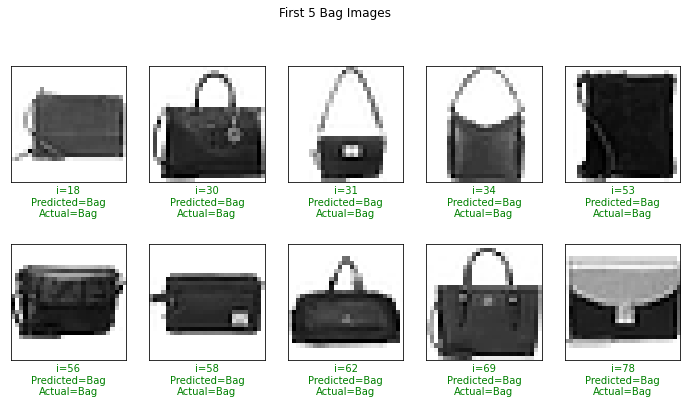

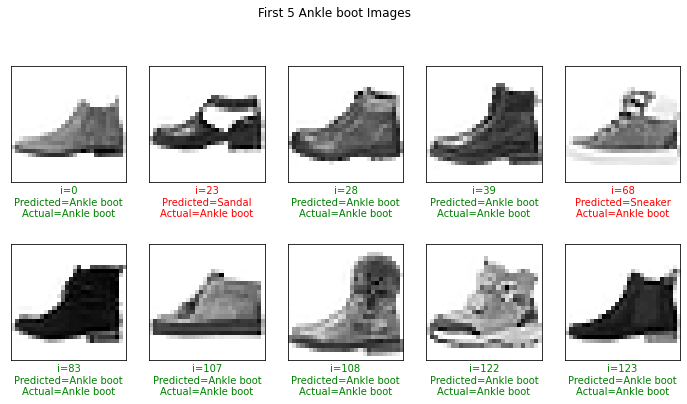

In [ ]:
exp2_dropout_best = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Exp2_320_Model_Dropout')
modelInsights(exp2_dropout_best)

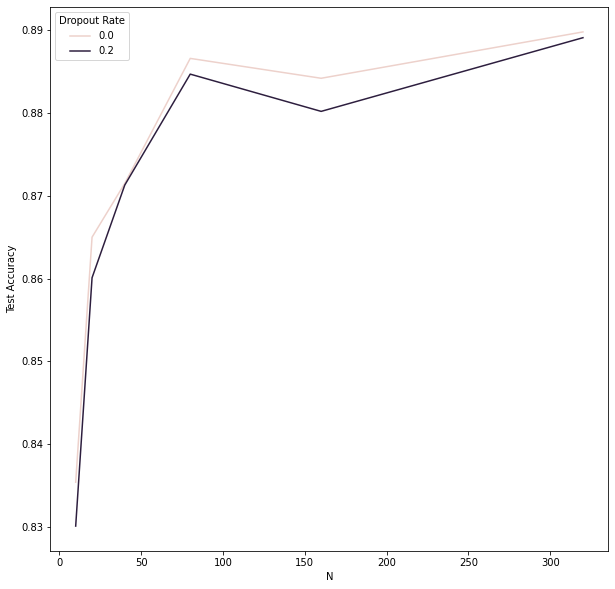

In [ ]:
plot_df = dnn_results[dnn_results['Experiment'] == 'Exp2']

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(x='N',y='Test Accuracy',data=plot_df,hue='Dropout Rate')

## Experiment 2B (DNN w/ 3 Layers with Layer Sizes N -> N/2 -> N/4)



First 25 Predictions
--------------------


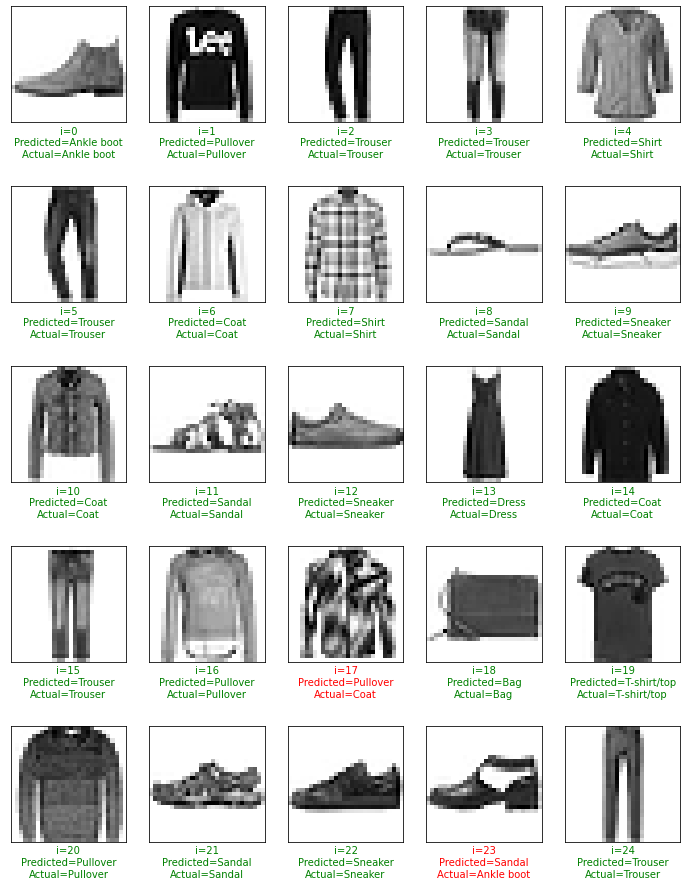


Confusion Matrix (Testing Set)
------------------------------


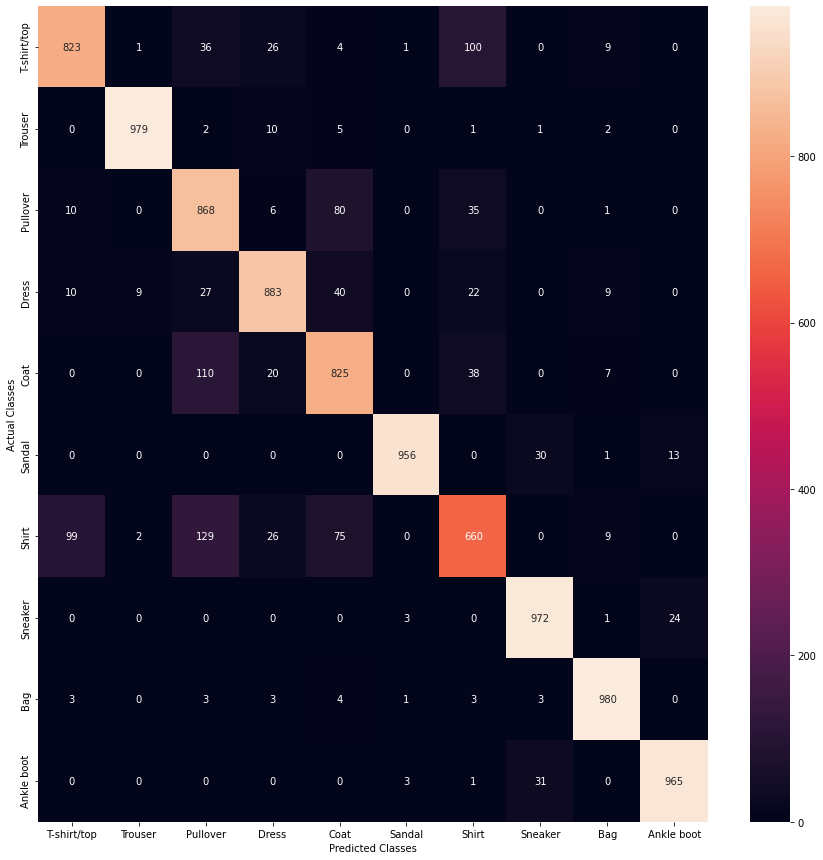

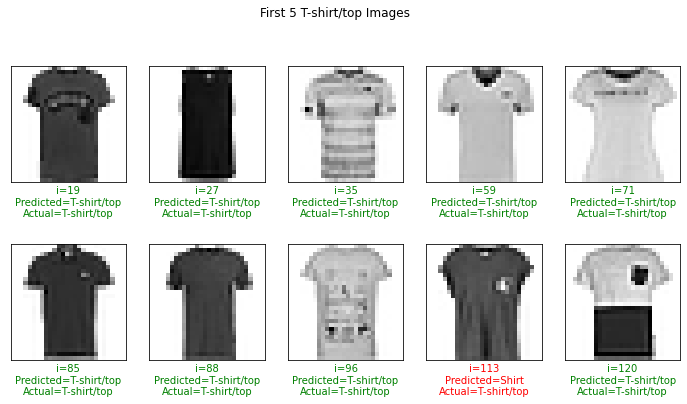

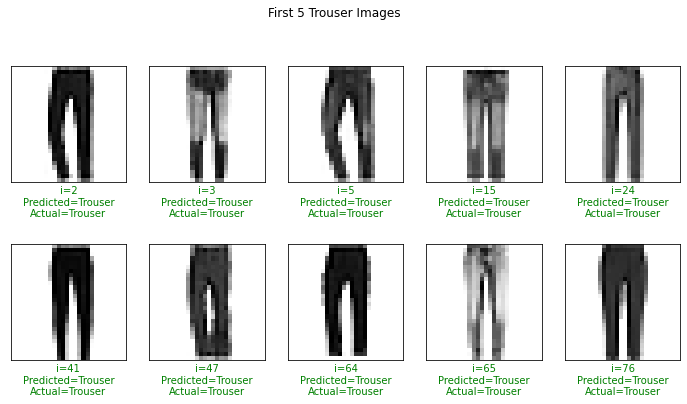

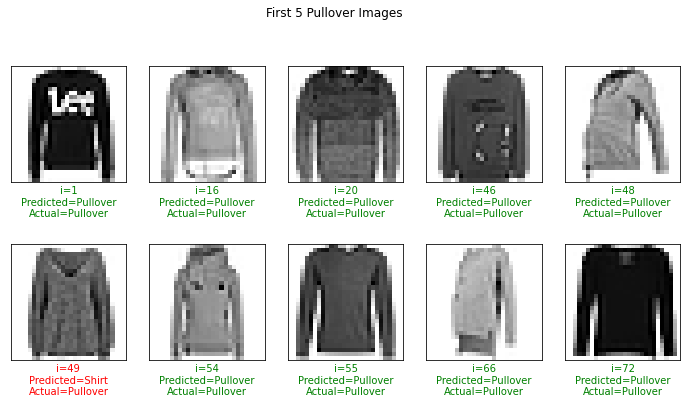

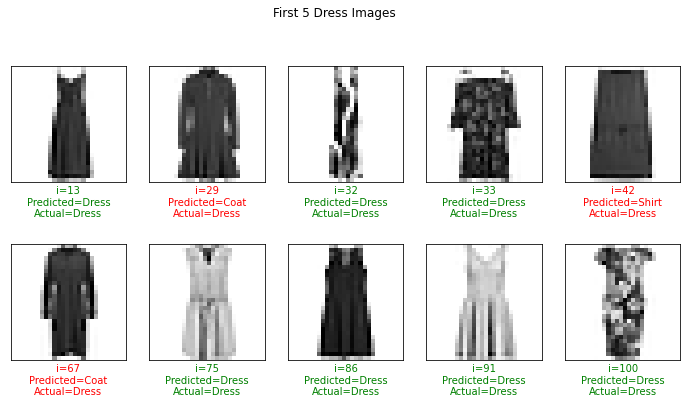

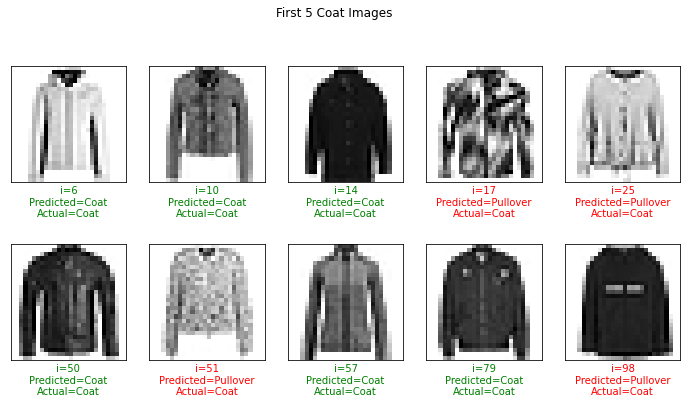

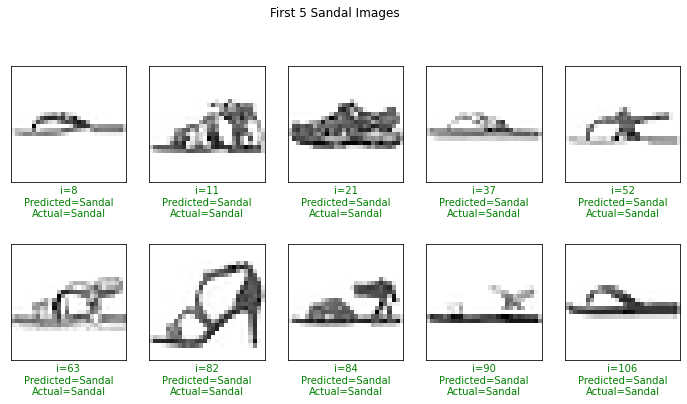

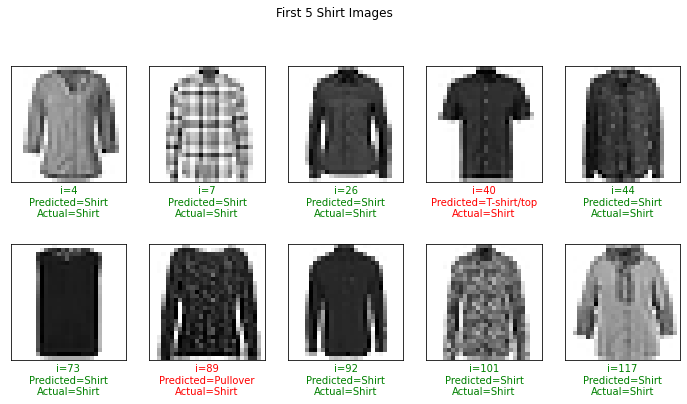

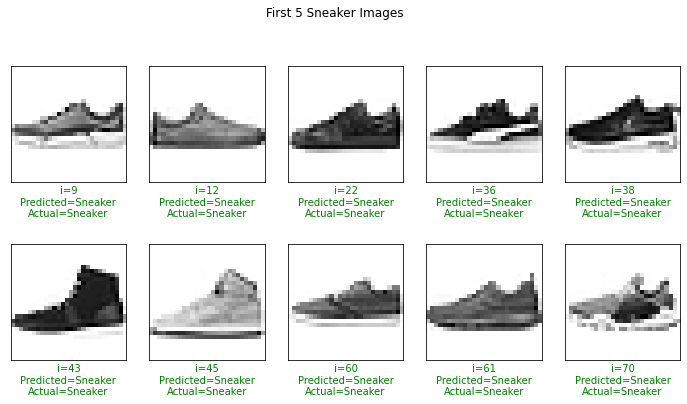

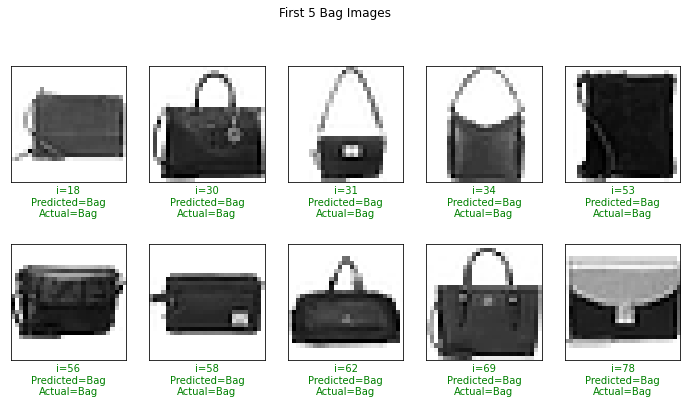

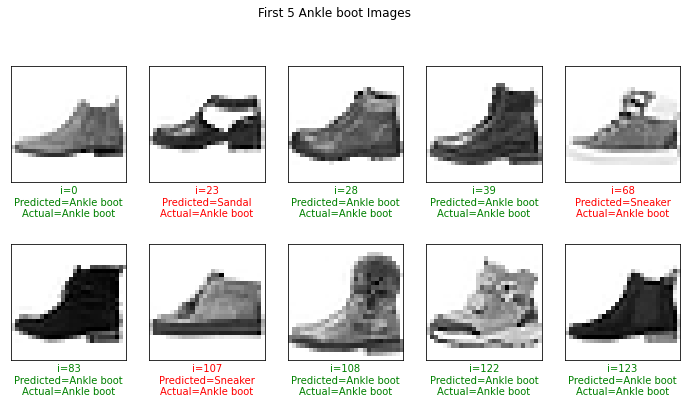

In [ ]:
exp2b_best = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Exp2b_320_Model')
modelInsights(exp2b_best)

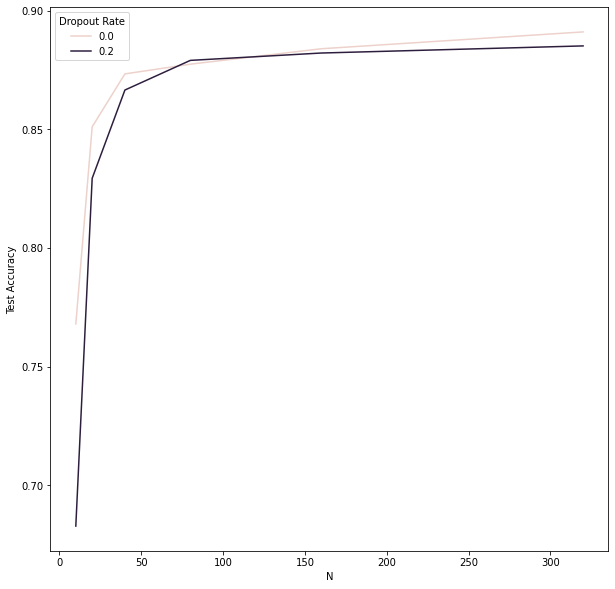

In [ ]:
plot_df = dnn_results[dnn_results['Experiment'] == 'Exp2b']

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(x='N',y='Test Accuracy',data=plot_df,hue='Dropout Rate')

## Experiment 2C (DNN w/ 3 Layers with Layer Sizes N -> N -> N/2)



First 25 Predictions
--------------------


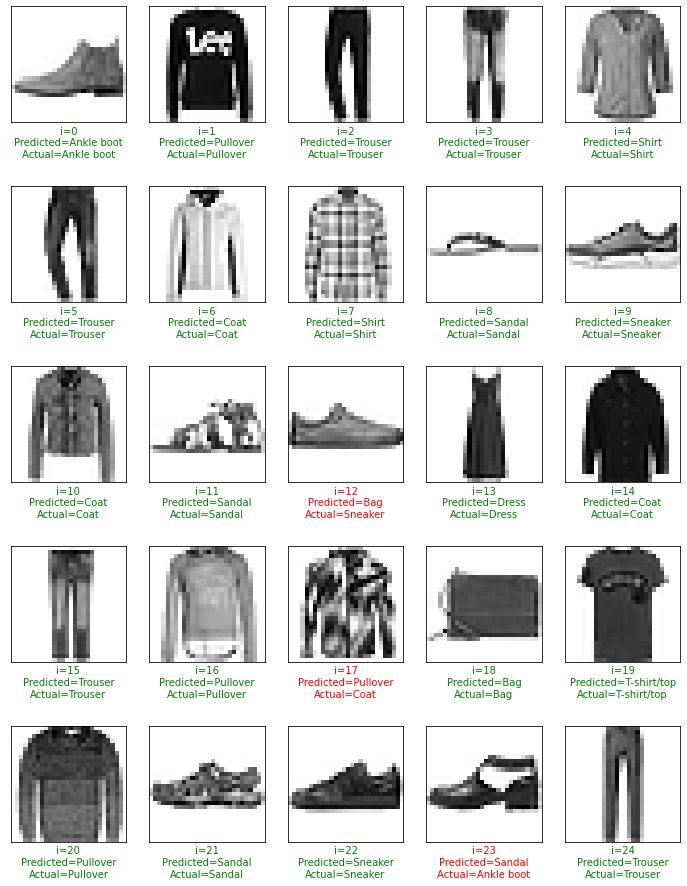


Confusion Matrix (Testing Set)
------------------------------


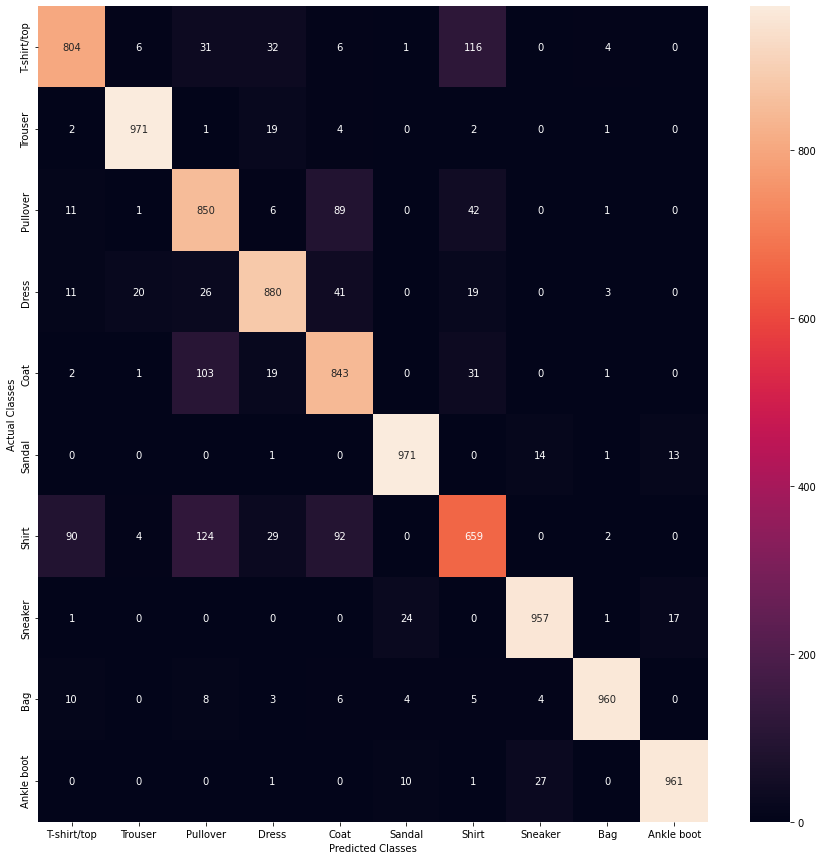

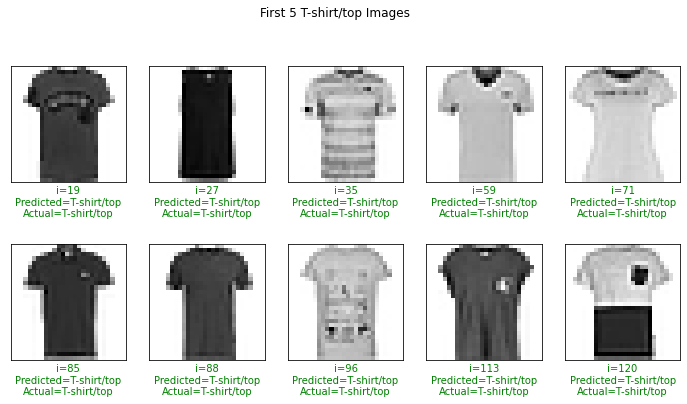

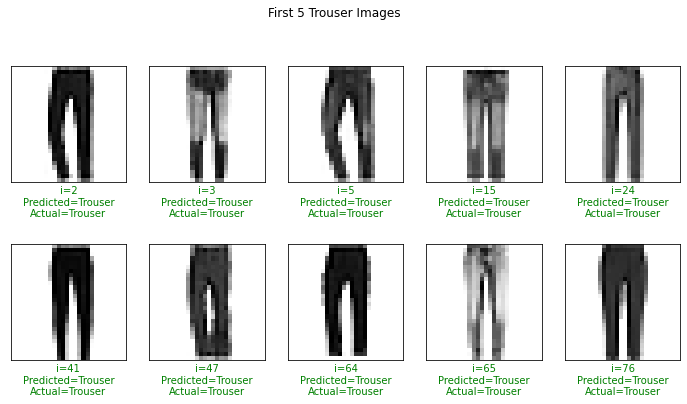

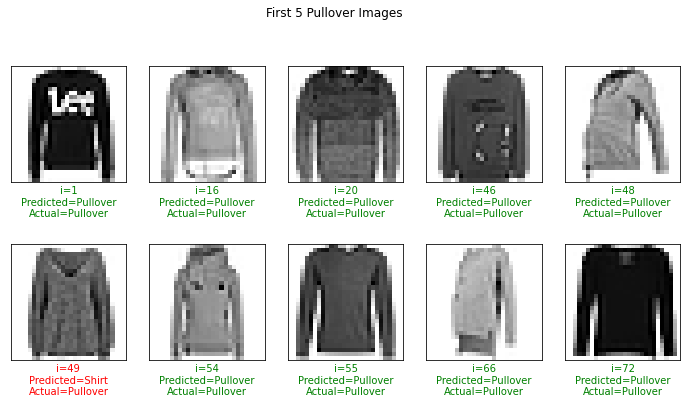

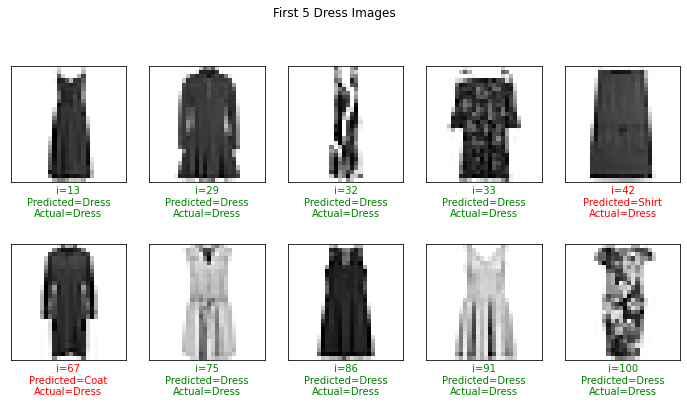

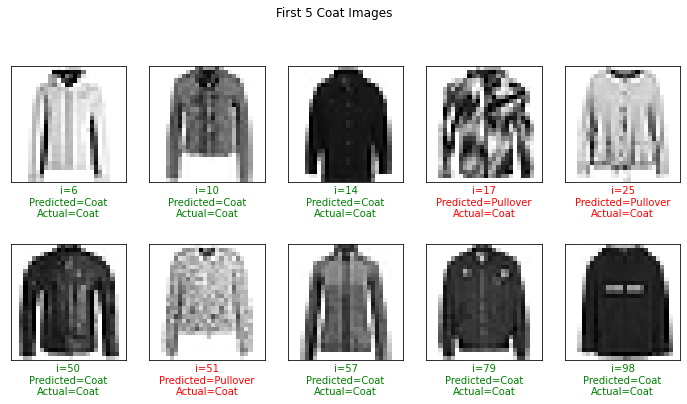

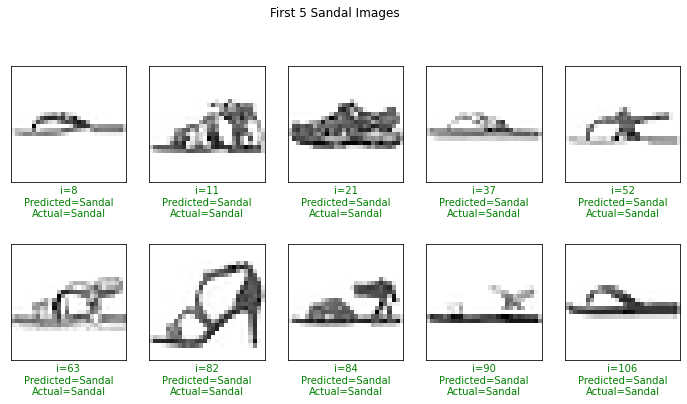

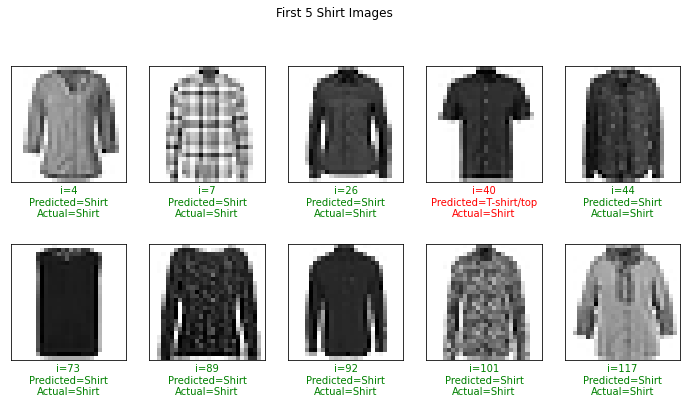

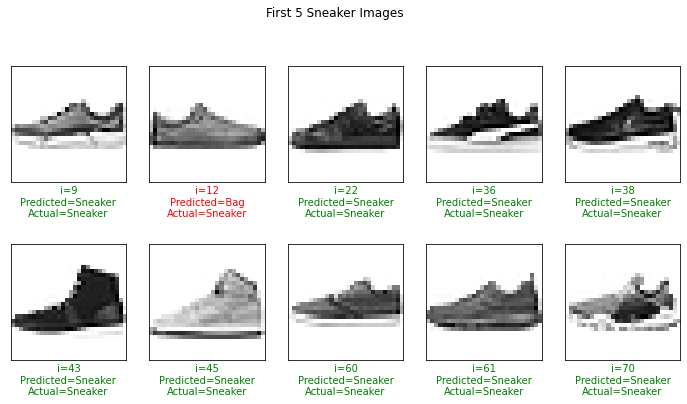

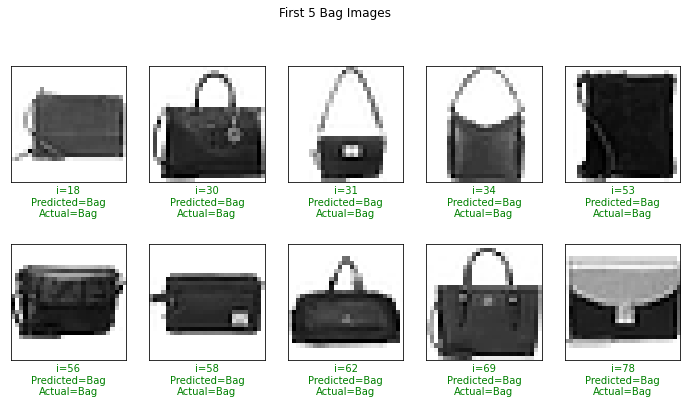

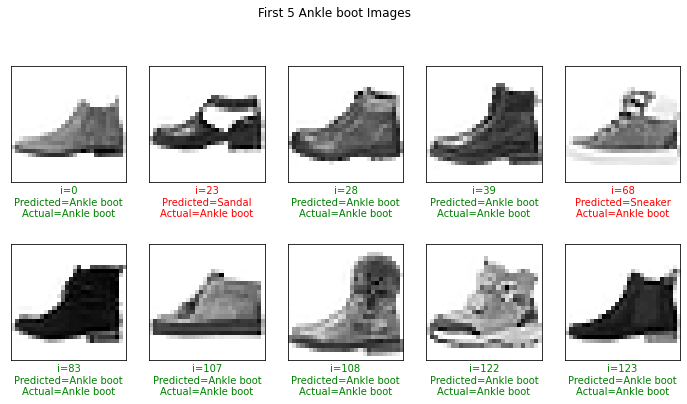

In [ ]:
exp2c_best = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Exp2c_80_Model')
modelInsights(exp2c_best)

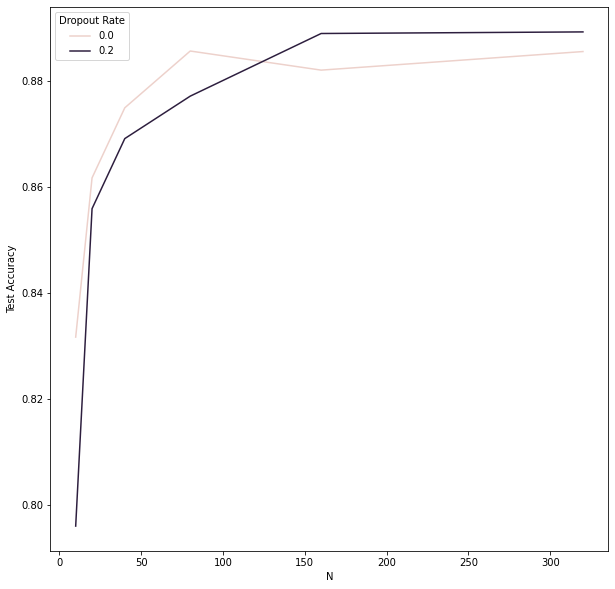

In [ ]:
plot_df = dnn_results[dnn_results['Experiment'] == 'Exp2c']

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(x='N',y='Test Accuracy',data=plot_df,hue='Dropout Rate')

# Convoluted Neural Net Experiments

In [ ]:
cnn_results = pd.DataFrame(columns=['Model','Seed','Layers','Filters','Hidden Activation','Dropout Rate','Epochs','Optimizer','Time','Test Accuracy'])

In [ ]:
def cnnModel(num_layers, num_filters, hidden_activation, dropout, epochs, optimizer, name):

  seed(5)
  tf.random.set_seed(5)

  model = models.Sequential()

  for x in range(0,num_layers):
  
    model.add(layers.Conv2D(filters=num_filters[x], kernel_size=(3,3), strides=(1,1), activation=hidden_activation, input_shape=(28,28,1)))
    model.add(layers.MaxPooling2D((2,2), strides=2))

  model.add(layers.Flatten())
  model.add(layers.Dense(units=1024, activation=hidden_activation))

  if dropout > 0:

    model.add(layers.Dropout(dropout))

  model.add(layers.Dense(units=10, activation='softmax'))

  model.compile(
      optimizer=optimizer, 
      loss='categorical_crossentropy', 
      metrics=['accuracy'])

  start_time = time.time()

  history = model.fit(
      x=train_images_norm, 
      y=train_labels_encoded, 
      epochs=epochs, 
      validation_split=(1/60), 
      batch_size=100,
      verbose=False)
  
  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  plt.figure(figsize=(12, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
      plt.subplot(1, 2, i + 1)
      plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
      plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
      plt.legend()
  plt.show()

  total_time = time.time() - start_time

  loss, accuracy = model.evaluate(test_images_norm, test_labels_encoded)

  results = {'Model':name,
             'Seed':5,
             'Layers':num_layers, 
             'Filters':num_filters,
             'Hidden Activation':hidden_activation,
             'Dropout Rate':dropout,
             'Epochs':epochs,
             'Optimizer':optimizer,
             'Time':total_time,
             'Test Accuracy':accuracy
             }

  print(total_time)

  return (model,results)

Running model with 1 -> 2 filters


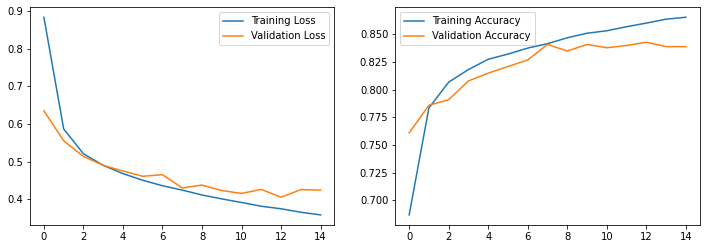

313/313 [==============================] - 2s 6ms/step - loss: 0.4253 - accuracy: 0.8442
233.64738297462463
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_1_Model/assets
Running model with 2 -> 4 filters


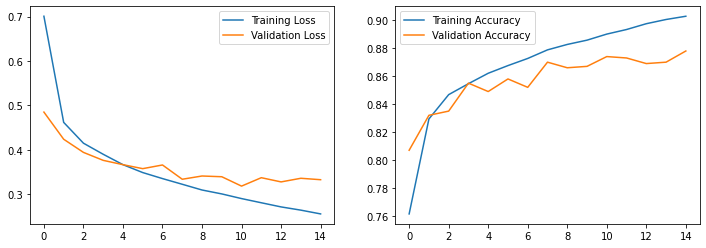

313/313 [==============================] - 2s 7ms/step - loss: 0.3323 - accuracy: 0.8775
249.50851202011108
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_2_Model/assets
Running model with 4 -> 8 filters


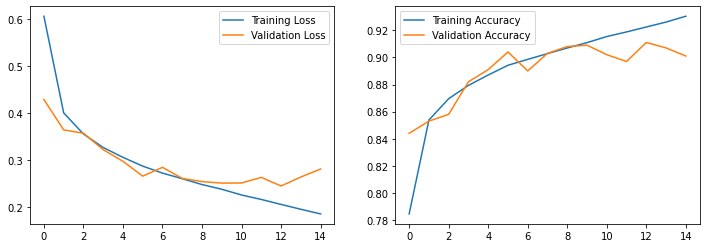

313/313 [==============================] - 2s 8ms/step - loss: 0.2960 - accuracy: 0.8951
287.11675786972046
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_4_Model/assets
Running model with 8 -> 16 filters


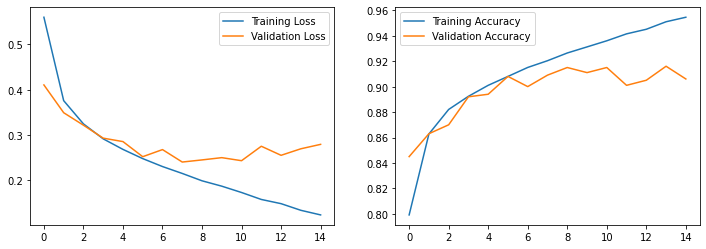

313/313 [==============================] - 3s 8ms/step - loss: 0.2977 - accuracy: 0.9016
343.6225519180298
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_8_Model/assets
Running model with 16 -> 32 filters


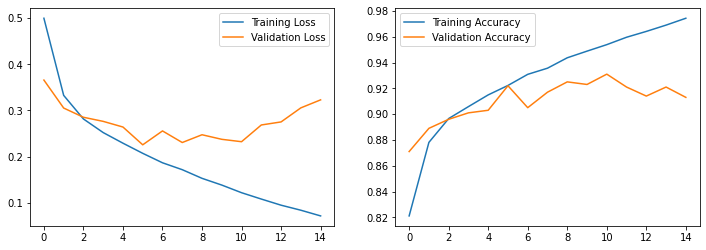

313/313 [==============================] - 3s 10ms/step - loss: 0.3371 - accuracy: 0.9067
486.41391229629517
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_16_Model/assets
Running model with 32 -> 64 filters


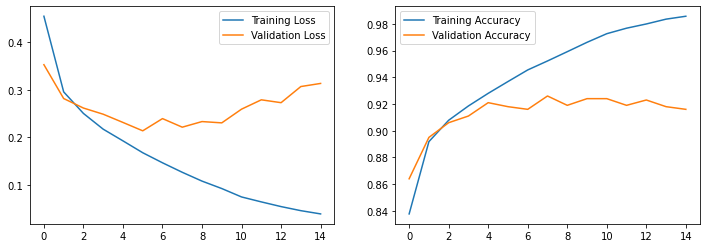

313/313 [==============================] - 4s 12ms/step - loss: 0.3612 - accuracy: 0.9146
845.4483313560486
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_32_Model/assets
Running model with 1 -> 2 -> 2 filters


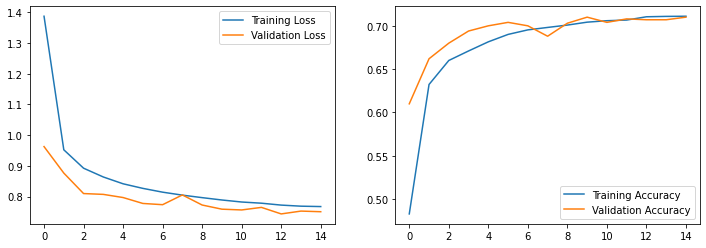

313/313 [==============================] - 2s 6ms/step - loss: 0.7948 - accuracy: 0.7029
239.21847081184387
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp4_1_Model/assets
Running model with 2 -> 4 -> 4 filters


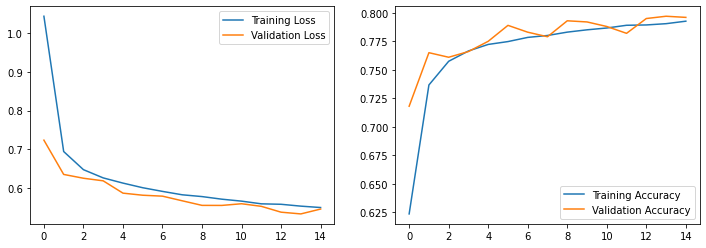

313/313 [==============================] - 2s 7ms/step - loss: 0.5735 - accuracy: 0.7855
249.5887610912323
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp4_2_Model/assets
Running model with 4 -> 8 -> 8 filters


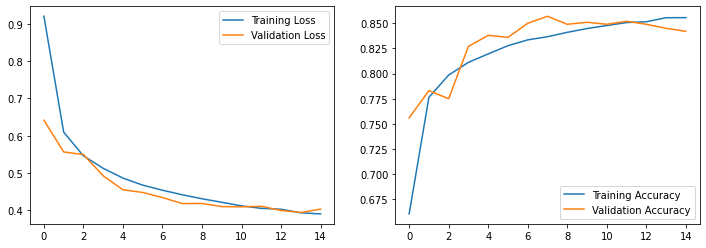

313/313 [==============================] - 2s 8ms/step - loss: 0.4423 - accuracy: 0.8387
270.7562928199768
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp4_4_Model/assets
Running model with 8 -> 16 -> 16 filters


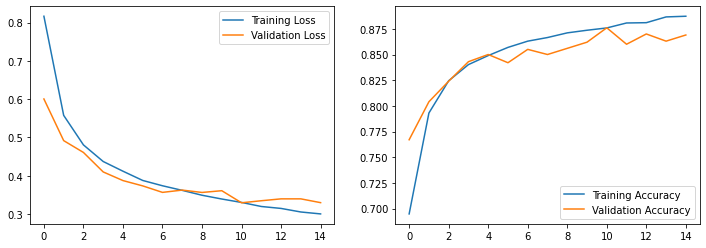

313/313 [==============================] - 2s 7ms/step - loss: 0.3654 - accuracy: 0.8686
309.9524767398834
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp4_8_Model/assets
Running model with 16 -> 32 -> 32 filters


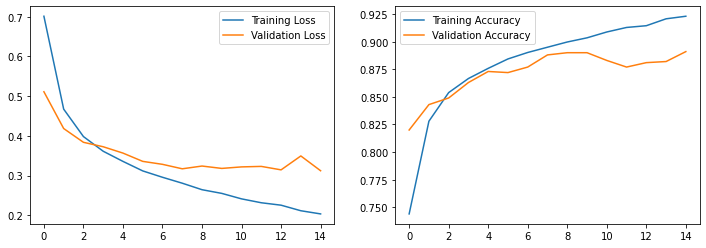

313/313 [==============================] - 3s 8ms/step - loss: 0.3162 - accuracy: 0.8880
406.71434259414673
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp4_16_Model/assets
Running model with 32 -> 64 -> 64 filters


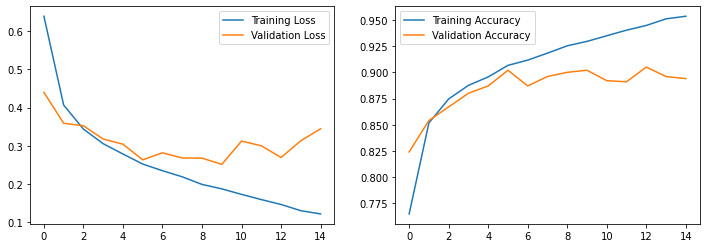

313/313 [==============================] - 3s 11ms/step - loss: 0.3616 - accuracy: 0.8917
709.9085111618042
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp4_32_Model/assets
Running model with 1 -> 2 filters


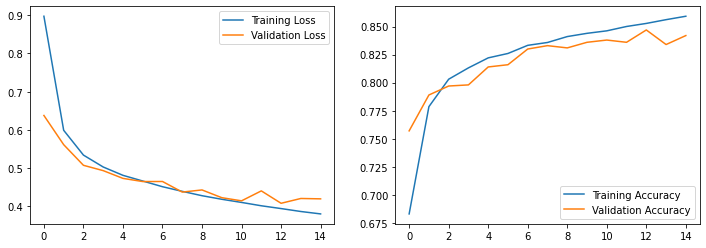

313/313 [==============================] - 2s 6ms/step - loss: 0.4222 - accuracy: 0.8438
250.99589014053345
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_1_Model_Dropout/assets
Running model with 2 -> 4 filters


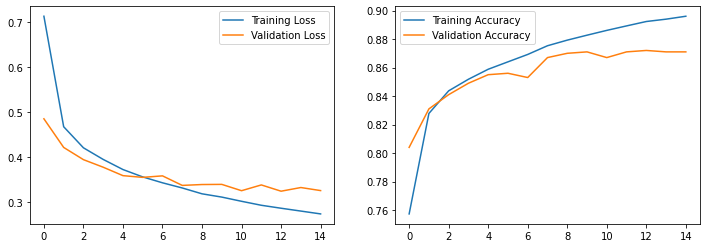

313/313 [==============================] - 2s 7ms/step - loss: 0.3300 - accuracy: 0.8764
265.6077387332916
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_2_Model_Dropout/assets
Running model with 4 -> 8 filters


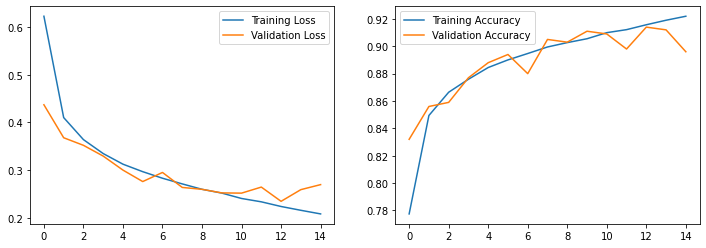

313/313 [==============================] - 2s 8ms/step - loss: 0.2931 - accuracy: 0.8920
296.4236912727356
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_4_Model_Dropout/assets
Running model with 8 -> 16 filters


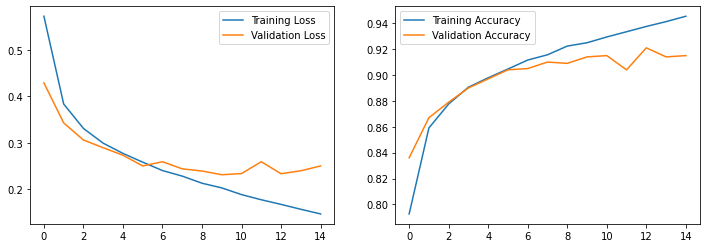

313/313 [==============================] - 3s 8ms/step - loss: 0.2912 - accuracy: 0.9020
357.43529748916626
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_8_Model_Dropout/assets
Running model with 16 -> 32 filters


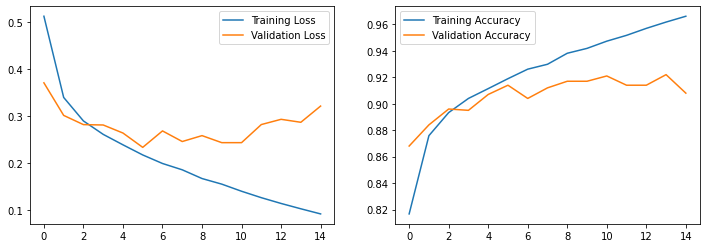

313/313 [==============================] - 3s 10ms/step - loss: 0.3211 - accuracy: 0.9039
493.99628353118896
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_16_Model_Dropout/assets
Running model with 32 -> 64 filters


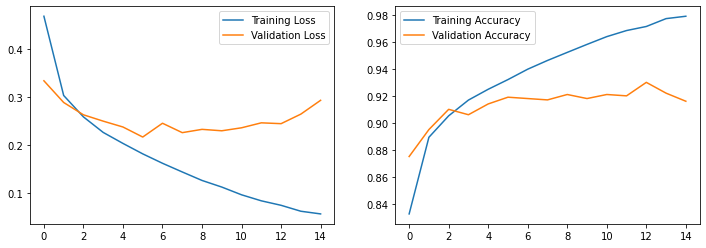

313/313 [==============================] - 4s 13ms/step - loss: 0.3232 - accuracy: 0.9139
865.3213038444519
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_32_Model_Dropout/assets
Running model with 1 -> 2 -> 2 filters


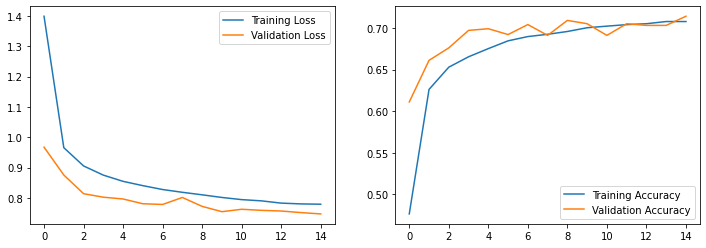

313/313 [==============================] - 2s 7ms/step - loss: 0.7949 - accuracy: 0.7039
252.76056122779846
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp4_1_Model_Dropout/assets
Running model with 2 -> 4 -> 4 filters


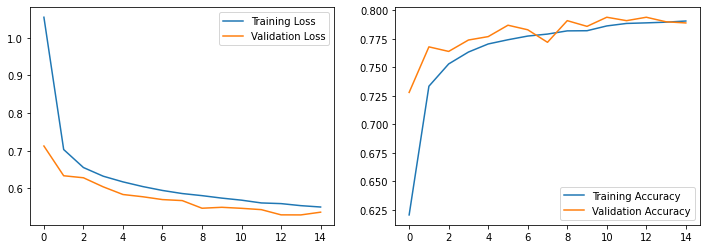

313/313 [==============================] - 2s 7ms/step - loss: 0.5739 - accuracy: 0.7848
270.15631651878357
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp4_2_Model_Dropout/assets
Running model with 4 -> 8 -> 8 filters


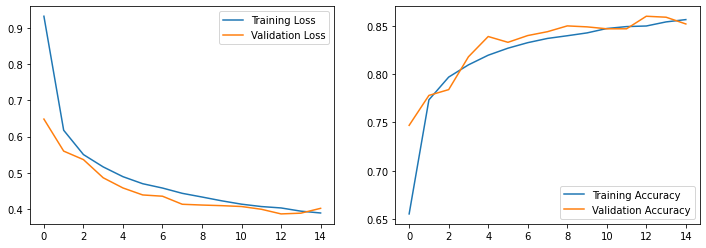

313/313 [==============================] - 2s 7ms/step - loss: 0.4357 - accuracy: 0.8441
287.9522440433502
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp4_4_Model_Dropout/assets
Running model with 8 -> 16 -> 16 filters


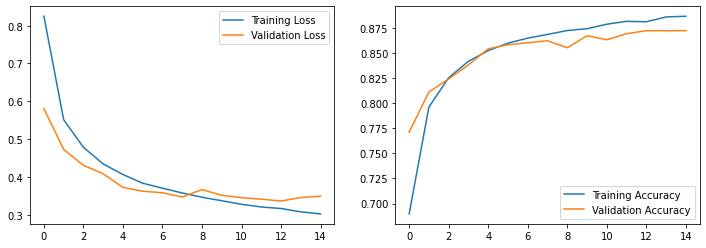

313/313 [==============================] - 2s 7ms/step - loss: 0.3774 - accuracy: 0.8647
324.21317315101624
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp4_8_Model_Dropout/assets
Running model with 16 -> 32 -> 32 filters


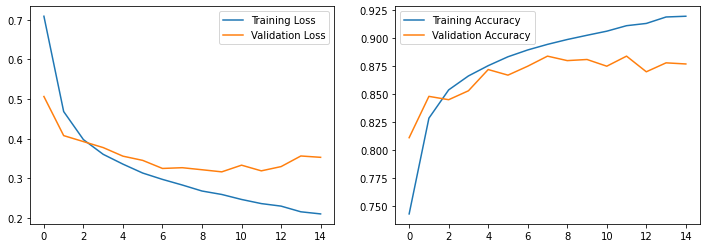

313/313 [==============================] - 3s 8ms/step - loss: 0.3281 - accuracy: 0.8849
419.00569677352905
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp4_16_Model_Dropout/assets
Running model with 32 -> 64 -> 64 filters


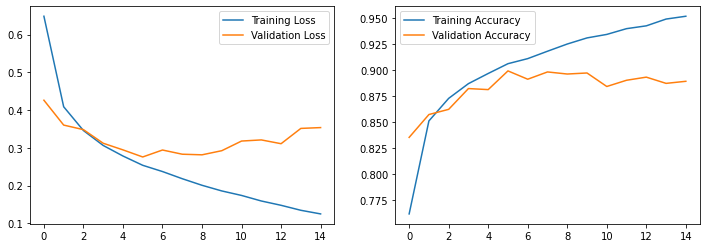

313/313 [==============================] - 3s 10ms/step - loss: 0.3565 - accuracy: 0.8958
721.3594908714294
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp4_32_Model_Dropout/assets


Model Seed Layers  ... Optimizer        Time Test Accuracy
0            Exp3_1_Model    5      2  ...      adam  233.647383        0.8442
1            Exp3_2_Model    5      2  ...      adam  249.508512        0.8775
2            Exp3_4_Model    5      2  ...      adam  287.116758        0.8951
3            Exp3_8_Model    5      2  ...      adam  343.622552        0.9016
4           Exp3_16_Model    5      2  ...      adam  486.413912        0.9067
5           Exp3_32_Model    5      2  ...      adam  845.448331        0.9146
6            Exp4_1_Model    5      3  ...      adam  239.218471        0.7029
7            Exp4_2_Model    5      3  ...      adam  249.588761        0.7855
8            Exp4_4_Model    5      3  ...      adam  270.756293        0.8387
9            Exp4_8_Model    5      3  ...      adam  309.952477        0.8686
10          Exp4_16_Model    5      3  ...      adam  406.714343        0.8880
11          Exp4_32_Model    5      3  ...      adam  709.908511        0.8917
12   Exp3_1_Model_Dropout    5      2  ...      adam  250.995890        0.8438
13   Exp3_2_Model_Dropout    5      2  ...      adam  265.607739        0.8764
14   Exp3_4_Model_Dropout    5      2  ...      adam  296.423691        0.8920
15   Exp3_8_Model_Dropout    5      2  ...      adam  357.435297        0.9020
16  Exp3_16_Model_Dropout    5      2  ...      adam  493.996284        0.9039
17  Exp3_32_Model_Dropout    5      2  ...      adam  865.321304        0.9139
18   Exp4_1_Model_Dropout    5      3  ...      adam  252.760561        0.7039
19   Exp4_2_Model_Dropout    5      3  ...      adam  270.156317        0.7848
20   Exp4_4_Model_Dropout    5      3  ...      adam  287.952244        0.8441
21   Exp4_8_Model_Dropout    5      3  ...      adam  324.213173        0.8647
22  Exp4_16_Model_Dropout    5      3  ...      adam  419.005697        0.8849
23  Exp4_32_Model_Dropout    5      3  ...      adam  721.359491        0.8958

[24 rows x 10 columns]

In [ ]:
filter_options = [1, 2, 4, 8, 16, 32]

for dropout_option in [0,0.2]:
  
  # Experiment 3
  for filters in filter_options:

    print('Running model with {} -> {} filters'.format(filters,filters*2))

    if dropout_option == 0:

      folder_name = 'Exp3_'+str(filters)+'_Model'

    else:

      folder_name = 'Exp3_'+str(filters)+'_Model_Dropout'

    exp_model = cnnModel(
        num_layers=2,
        num_filters=[filters,(filters*2)],
        hidden_activation='relu',
        dropout=dropout_option,
        epochs=15,
        optimizer='adam',
        name=folder_name
      )
    
    exp_model[0].save('/content/drive/My Drive/Colab Notebooks/'+folder_name)

    cnn_results = cnn_results.append(exp_model[1],ignore_index=True)

  cnn_results.to_csv('/content/drive/My Drive/Colab Notebooks/CNN_Results.csv')

  # Experiment 4
  for filters in filter_options:

    print('Running model with {} -> {} -> {} filters'.format(filters,filters*2,filters*2))

    if dropout_option == 0:

      folder_name = 'Exp4_'+str(filters)+'_Model'

    else:

      folder_name = 'Exp4_'+str(filters)+'_Model_Dropout'

    exp_model = cnnModel(
        num_layers=3,
        num_filters=[filters,(filters*2),(filters*4)],
        hidden_activation='relu',
        dropout=dropout_option,
        epochs=15,
        optimizer='adam',
        name=folder_name
      )
    
    exp_model[0].save('/content/drive/My Drive/Colab Notebooks/'+folder_name)

    cnn_results = cnn_results.append(exp_model[1],ignore_index=True)

  cnn_results.to_csv('/content/drive/My Drive/Colab Notebooks/CNN_Results.csv')

cnn_results

## Experiment 3 (CNN with 2 Convolution/Max Pooling Layers)



First 25 Predictions
--------------------


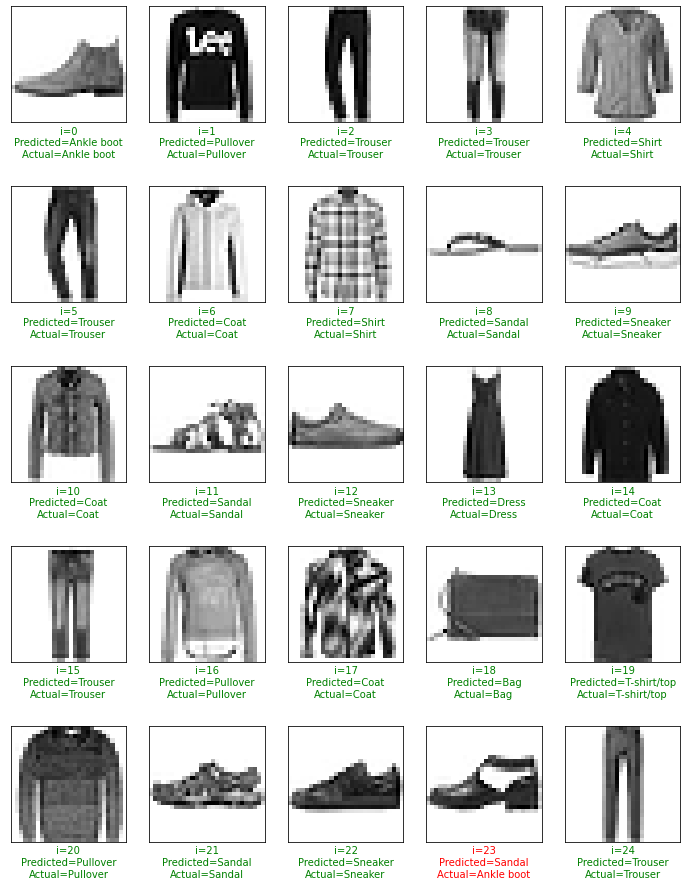


Confusion Matrix (Testing Set)
------------------------------


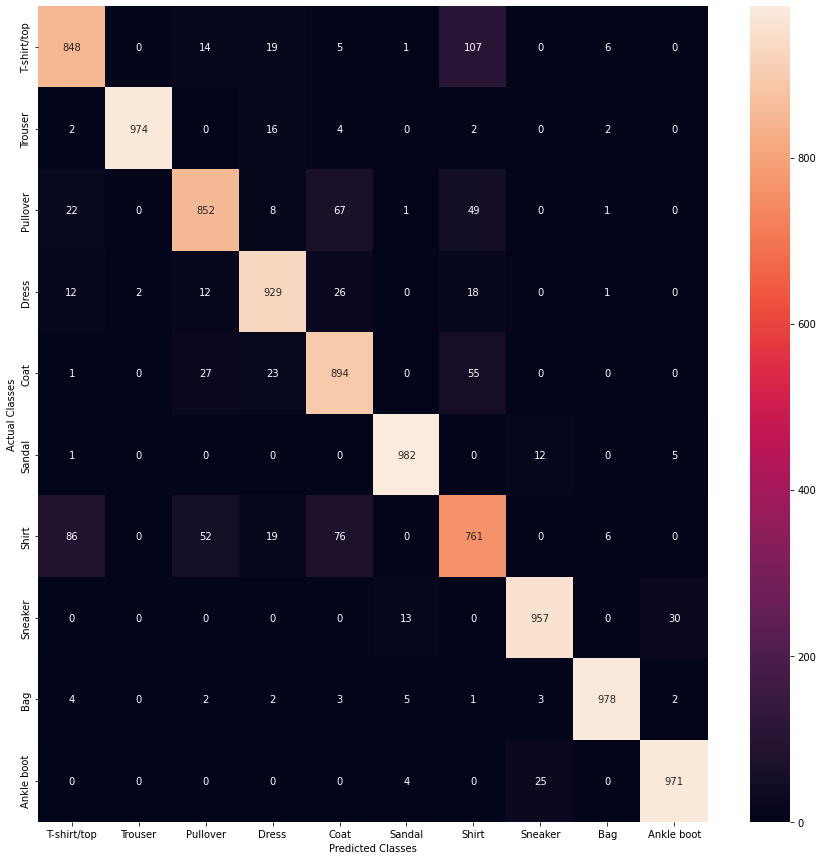

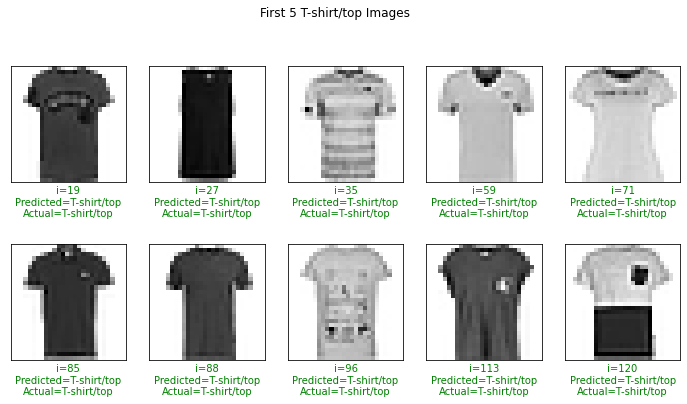

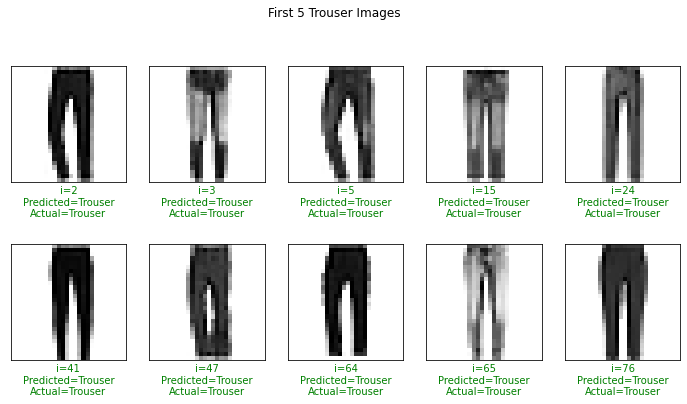

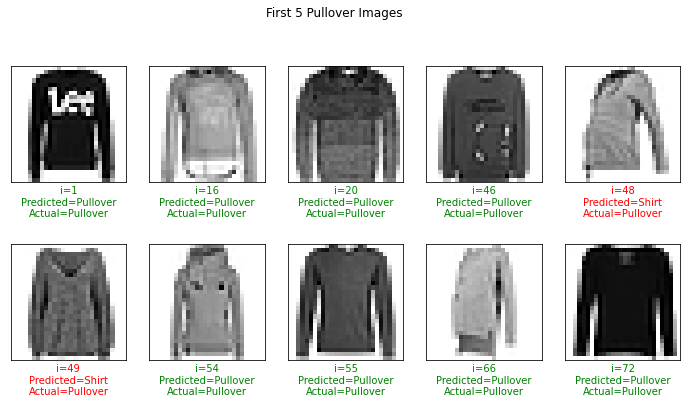

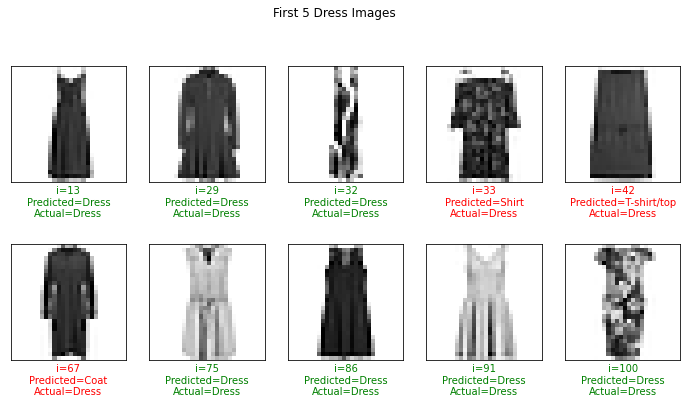

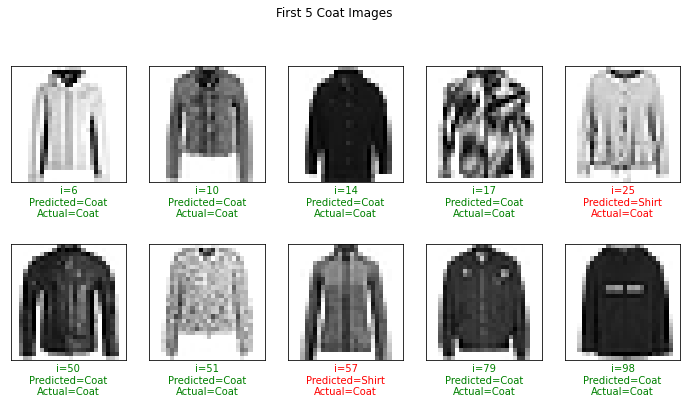

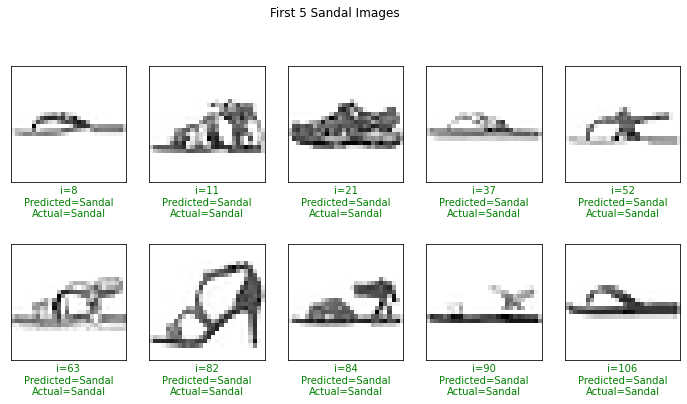

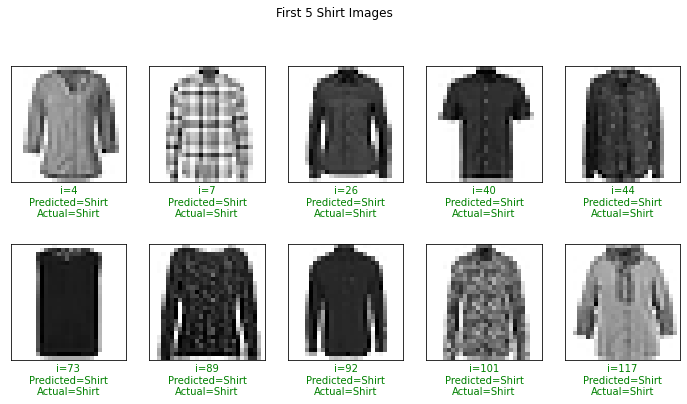

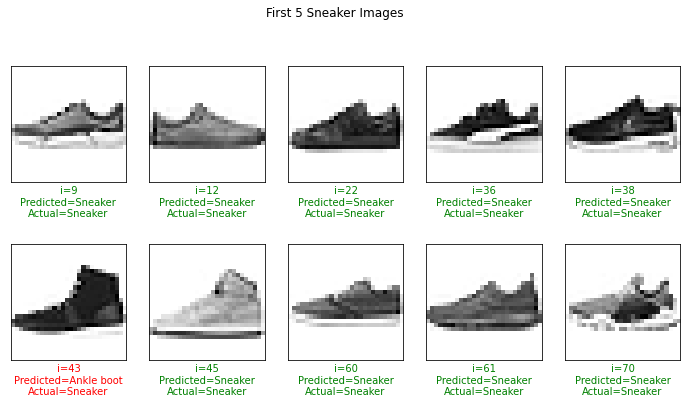

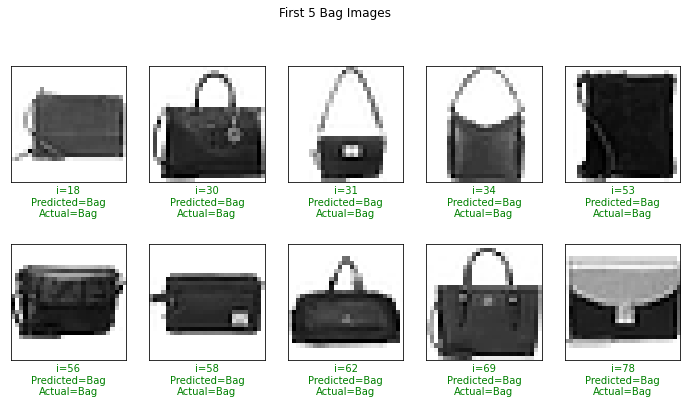

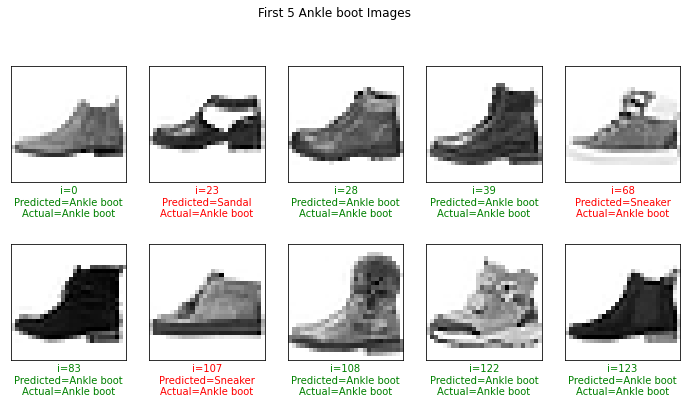

In [ ]:
exp3_best = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Exp3_32_Model')
modelInsights(exp3_best)

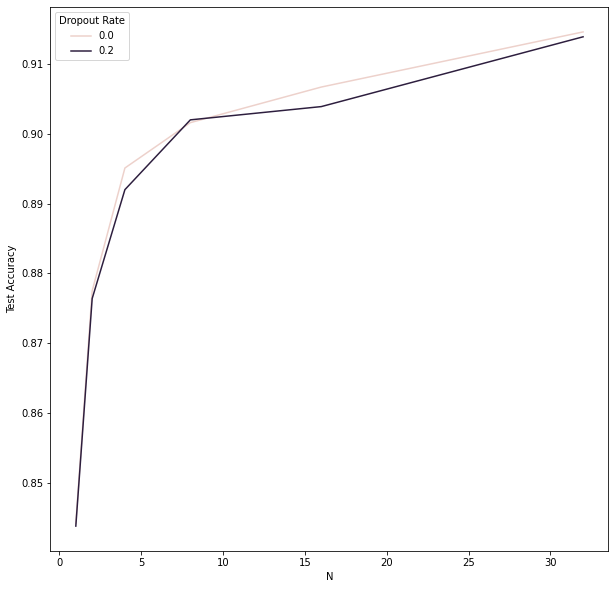

In [ ]:
cnn_results['Experiment'] = cnn_results['Model'].apply(lambda x: x.split('_')[0])
cnn_results['N'] = cnn_results['Filters'].apply(lambda x: x[0])

plot_df = cnn_results[cnn_results['Experiment'] == 'Exp3']

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(x='N',y='Test Accuracy',data=plot_df,hue='Dropout Rate')

Epoch 1/6
590/590 [==============================] - 63s 107ms/step - loss: 0.4697 - accuracy: 0.8303 - val_loss: 0.3597 - val_accuracy: 0.8610
Epoch 2/6
590/590 [==============================] - 63s 107ms/step - loss: 0.3081 - accuracy: 0.8878 - val_loss: 0.2933 - val_accuracy: 0.8920
Epoch 3/6
590/590 [==============================] - 63s 106ms/step - loss: 0.2613 - accuracy: 0.9044 - val_loss: 0.2749 - val_accuracy: 0.8930
Epoch 4/6
590/590 [==============================] - 63s 106ms/step - loss: 0.2297 - accuracy: 0.9149 - val_loss: 0.2516 - val_accuracy: 0.9010
Epoch 5/6
590/590 [==============================] - 63s 106ms/step - loss: 0.2040 - accuracy: 0.9241 - val_loss: 0.2408 - val_accuracy: 0.9100
Epoch 6/6
590/590 [==============================] - 63s 106ms/step - loss: 0.1781 - accuracy: 0.9334 - val_loss: 0.2191 - val_accuracy: 0.9140


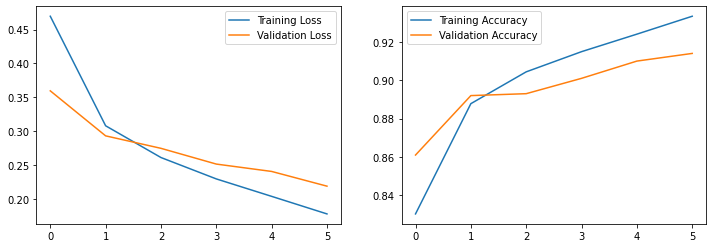

313/313 [==============================] - 4s 13ms/step - loss: 0.2430 - accuracy: 0.9119
Total Time: 377.89621663093567
Test Accuracy: 0.911899983882904
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Exp3_32_Model_6Epochs/assets


In [ ]:
# Repeat Exp3 stopping at 6 Epochs

seed(5)
tf.random.set_seed(5)

model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(2,2), strides=(1,1), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2), strides=2))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(units=1024, activation='relu'))

model.add(layers.Dense(units=10, activation='softmax'))

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

start_time = time.time()

history = model.fit(
    x=train_images_norm, 
    y=train_labels_encoded, 
    epochs=6, 
    validation_split=(1/60), 
    batch_size=100,
    verbose=True)

losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

plt.figure(figsize=(12, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

total_time = time.time() - start_time

loss, accuracy = model.evaluate(test_images_norm, test_labels_encoded)

print('Total Time:',total_time)
print('Test Accuracy:',accuracy)

model.save('/content/drive/My Drive/Colab Notebooks/Exp3_32_Model_6Epochs')

## Experiment 4 (CNN with 3 Convolution/Max Pooling Layers)



First 25 Predictions
--------------------


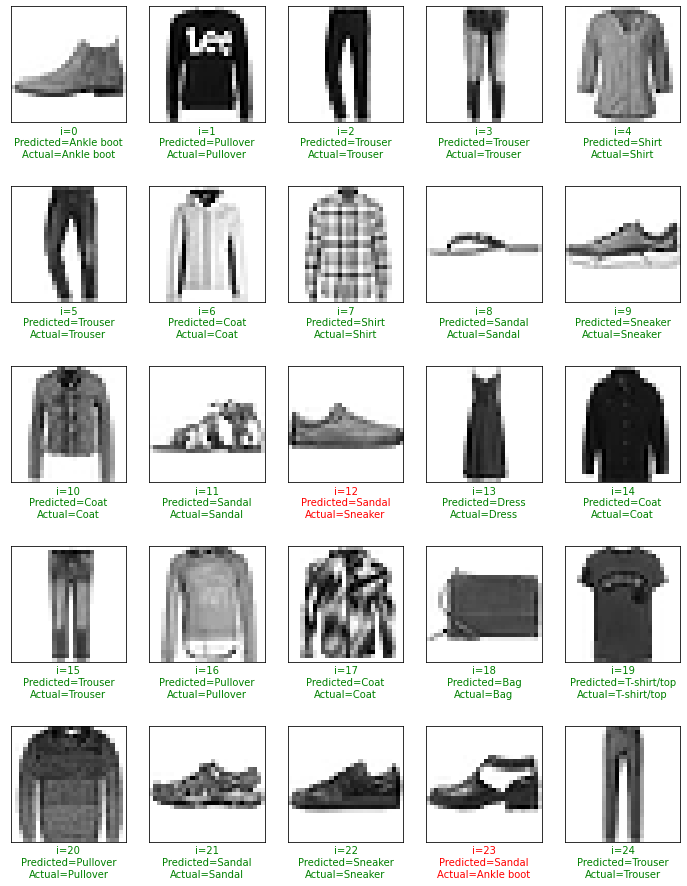


Confusion Matrix (Testing Set)
------------------------------


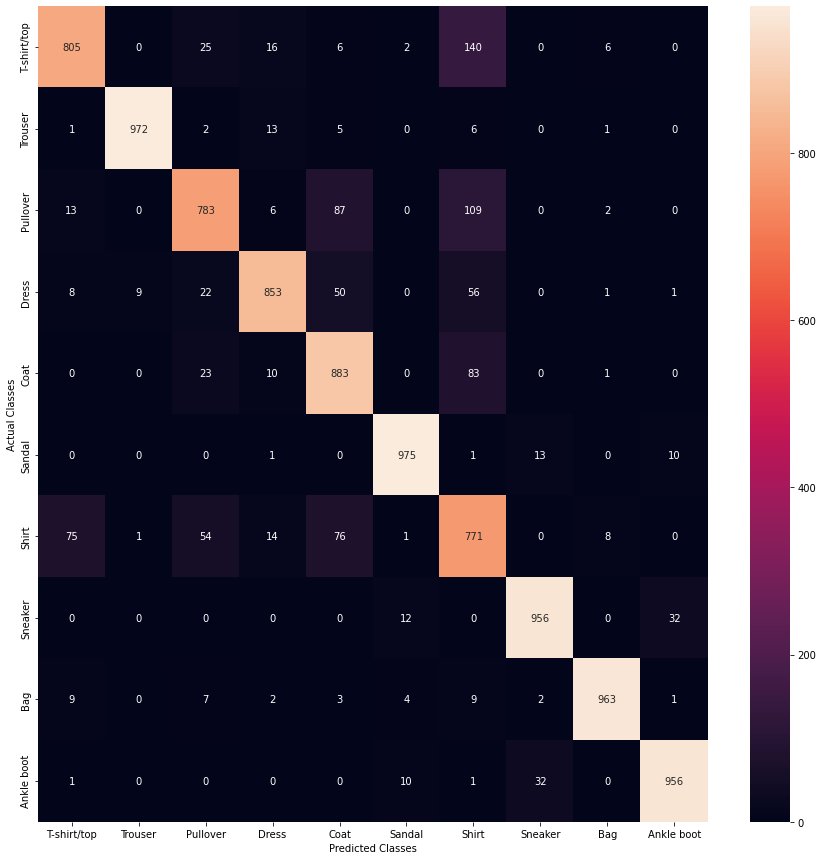

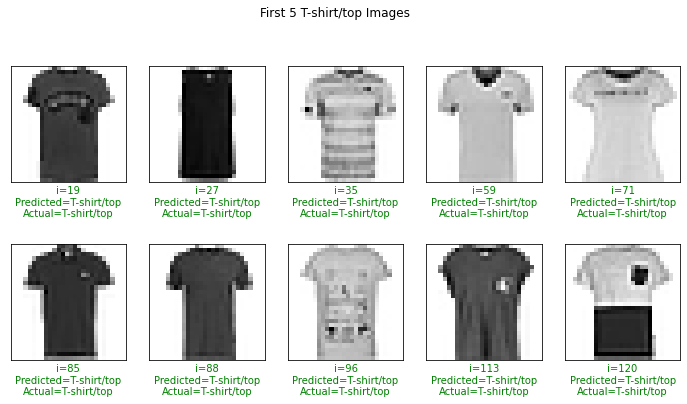

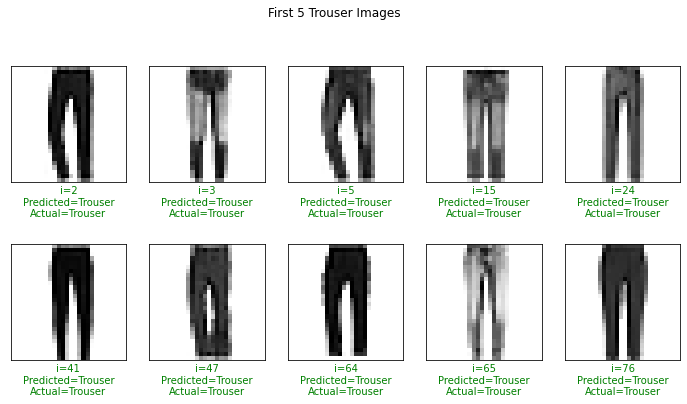

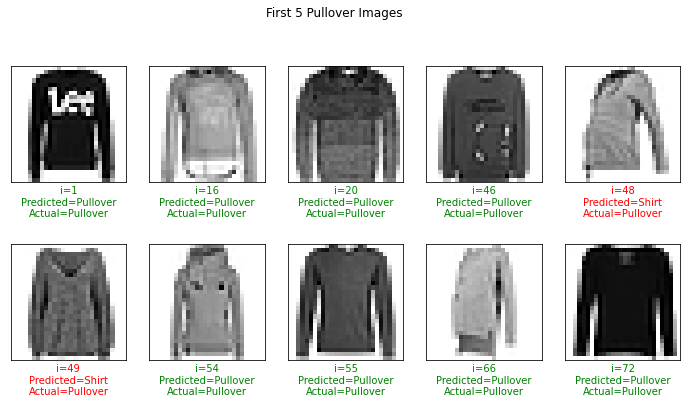

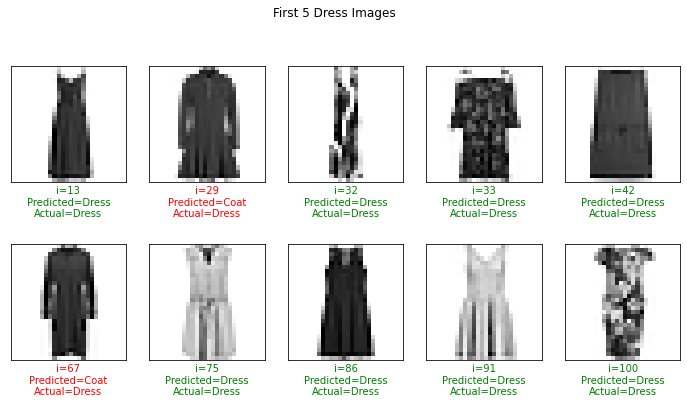

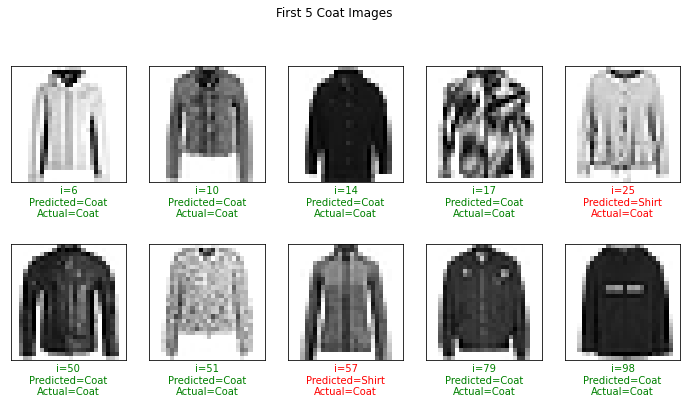

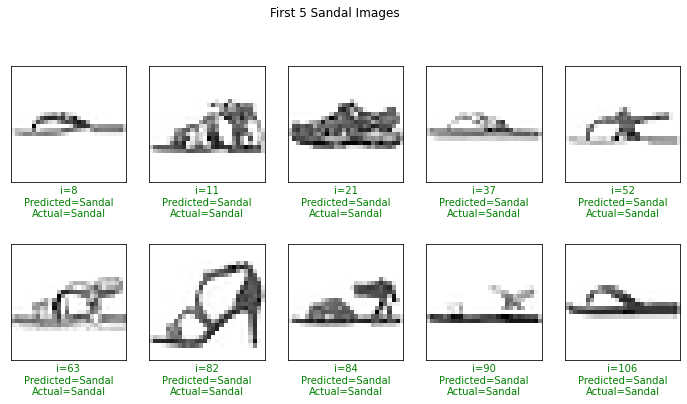

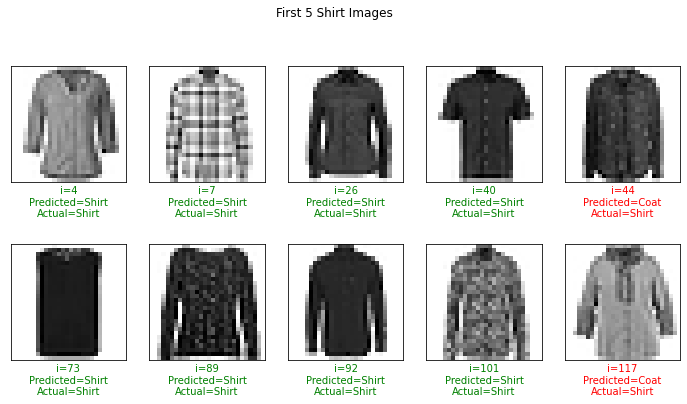

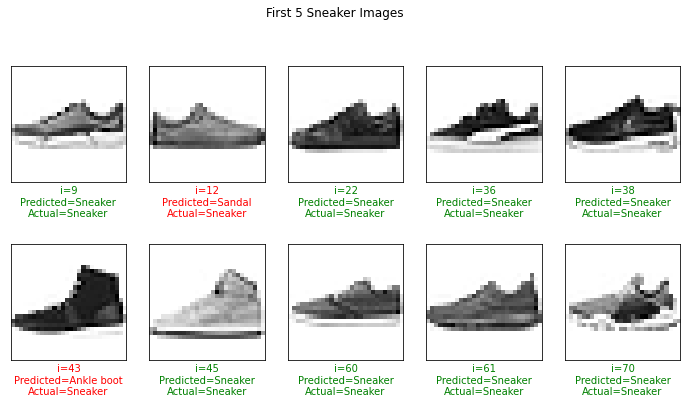

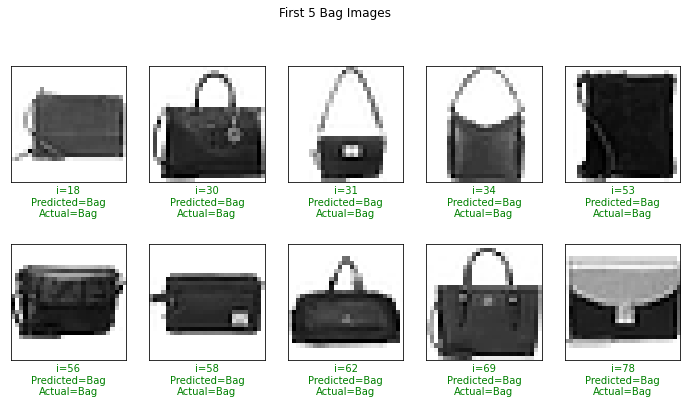

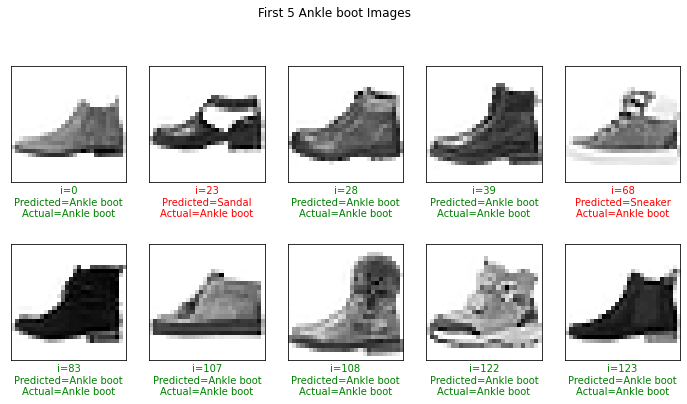

In [ ]:
exp4_best = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Exp4_32_Model')
modelInsights(exp4_best)

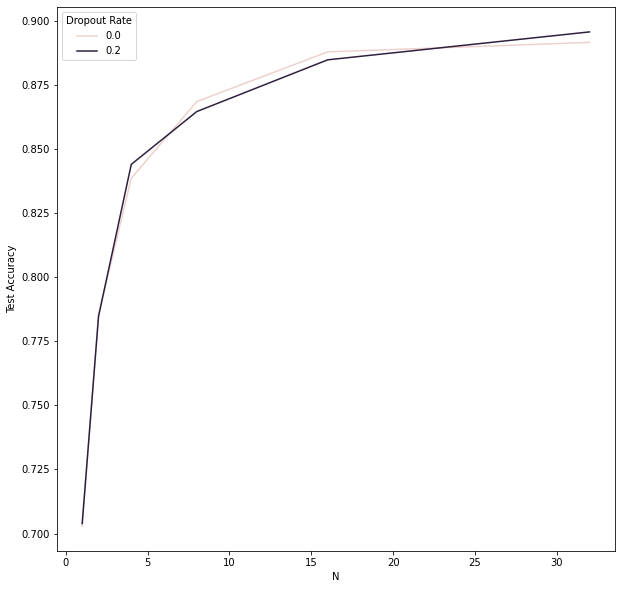

In [ ]:
plot_df = cnn_results[cnn_results['Experiment'] == 'Exp4']

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(x='N',y='Test Accuracy',data=plot_df,hue='Dropout Rate')

In [ ]:
exp5f

# Experiment 3 Analysis

*   Shirts vs. T-Shirts
*   Visualizing Filters



First 25 Predictions
--------------------


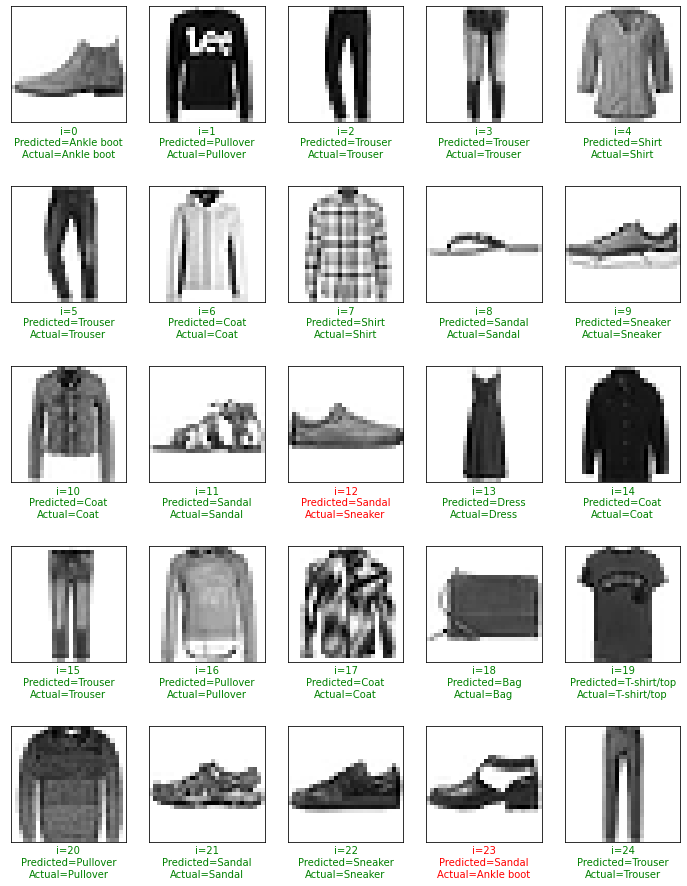


Confusion Matrix (Testing Set)
------------------------------


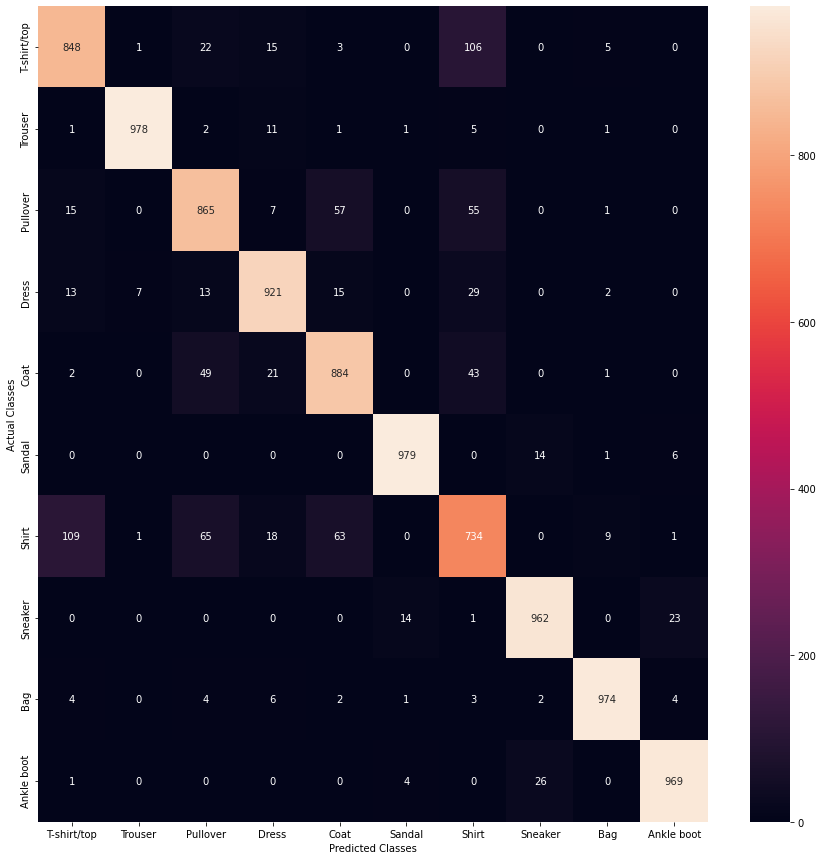

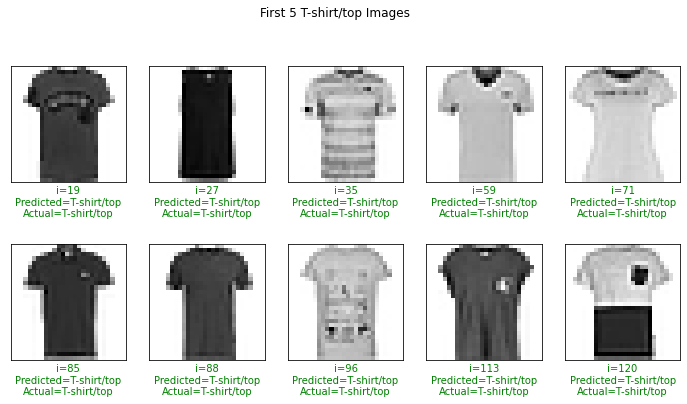

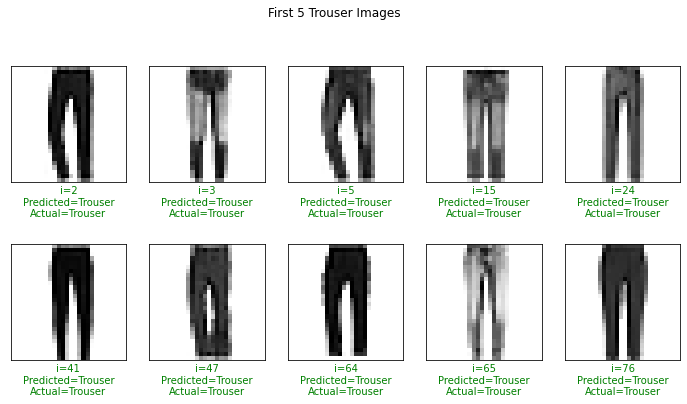

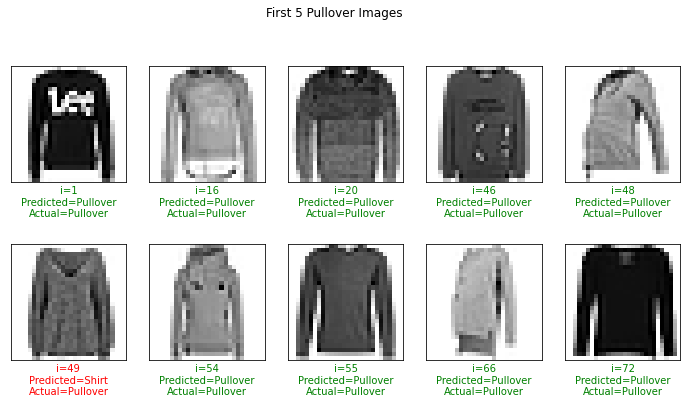

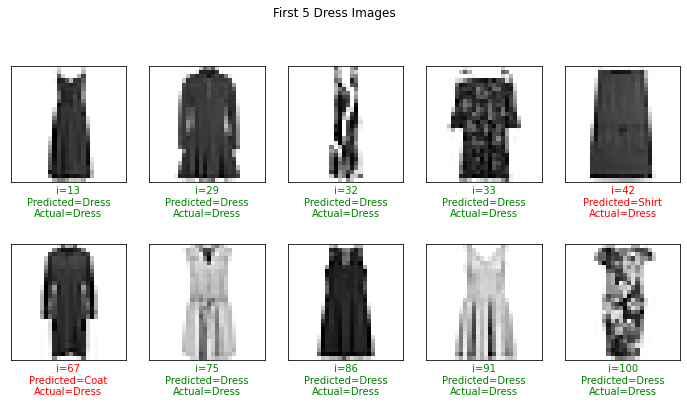

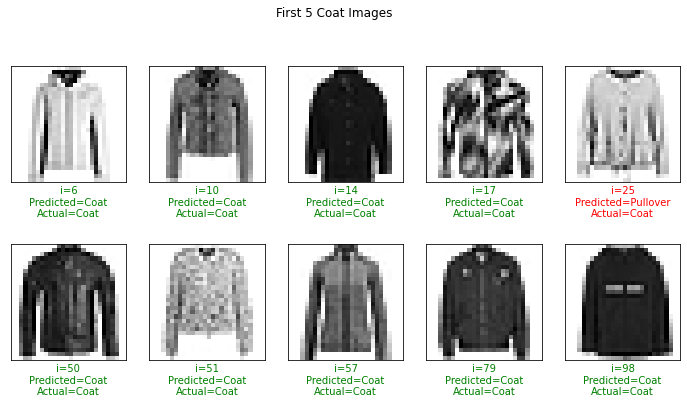

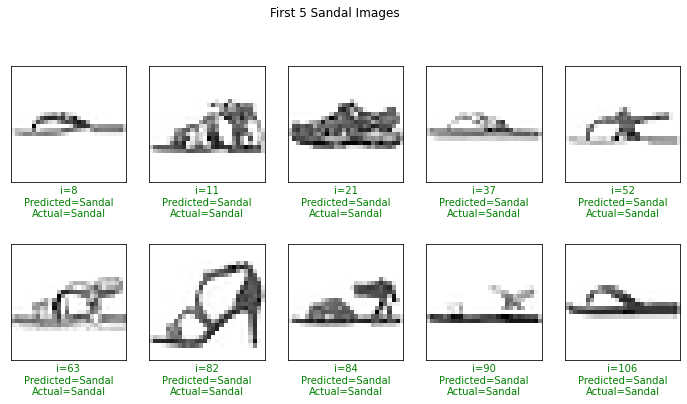

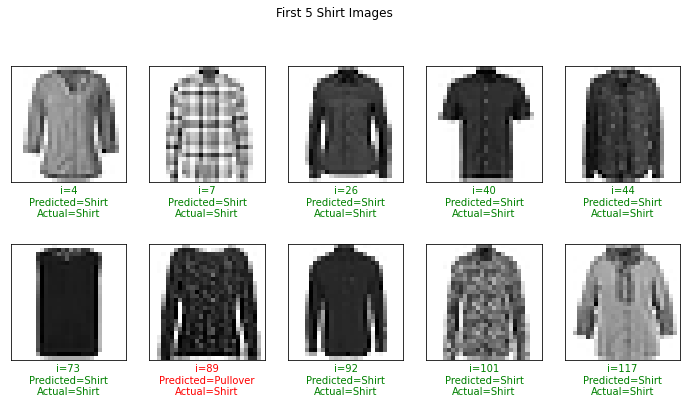

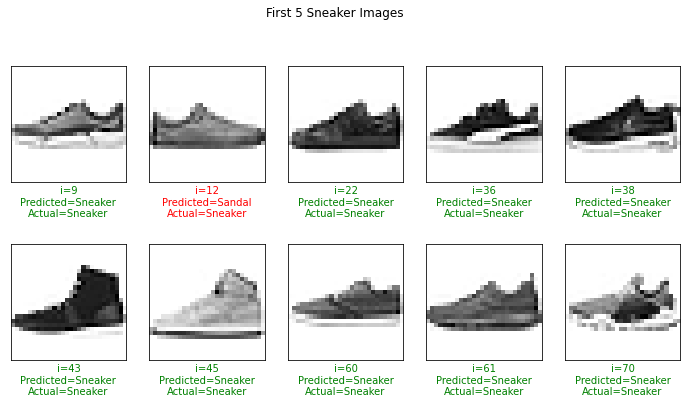

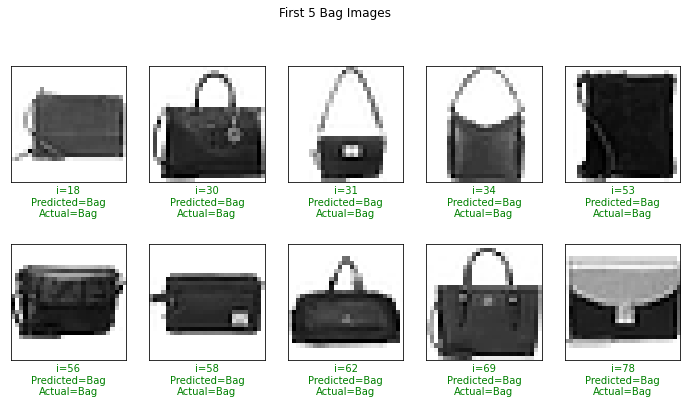

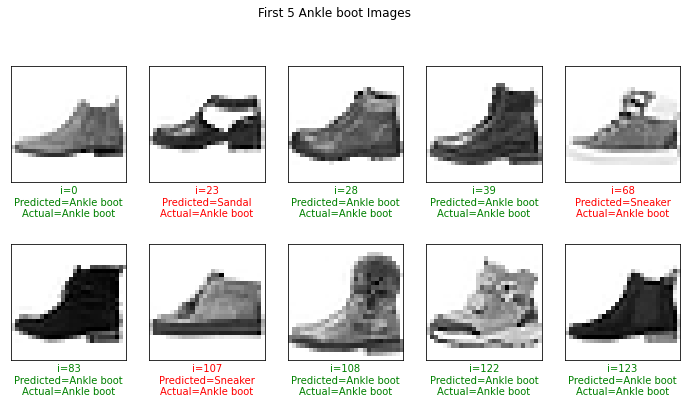

In [ ]:
modelInsights(exp3_best)

In [ ]:
def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

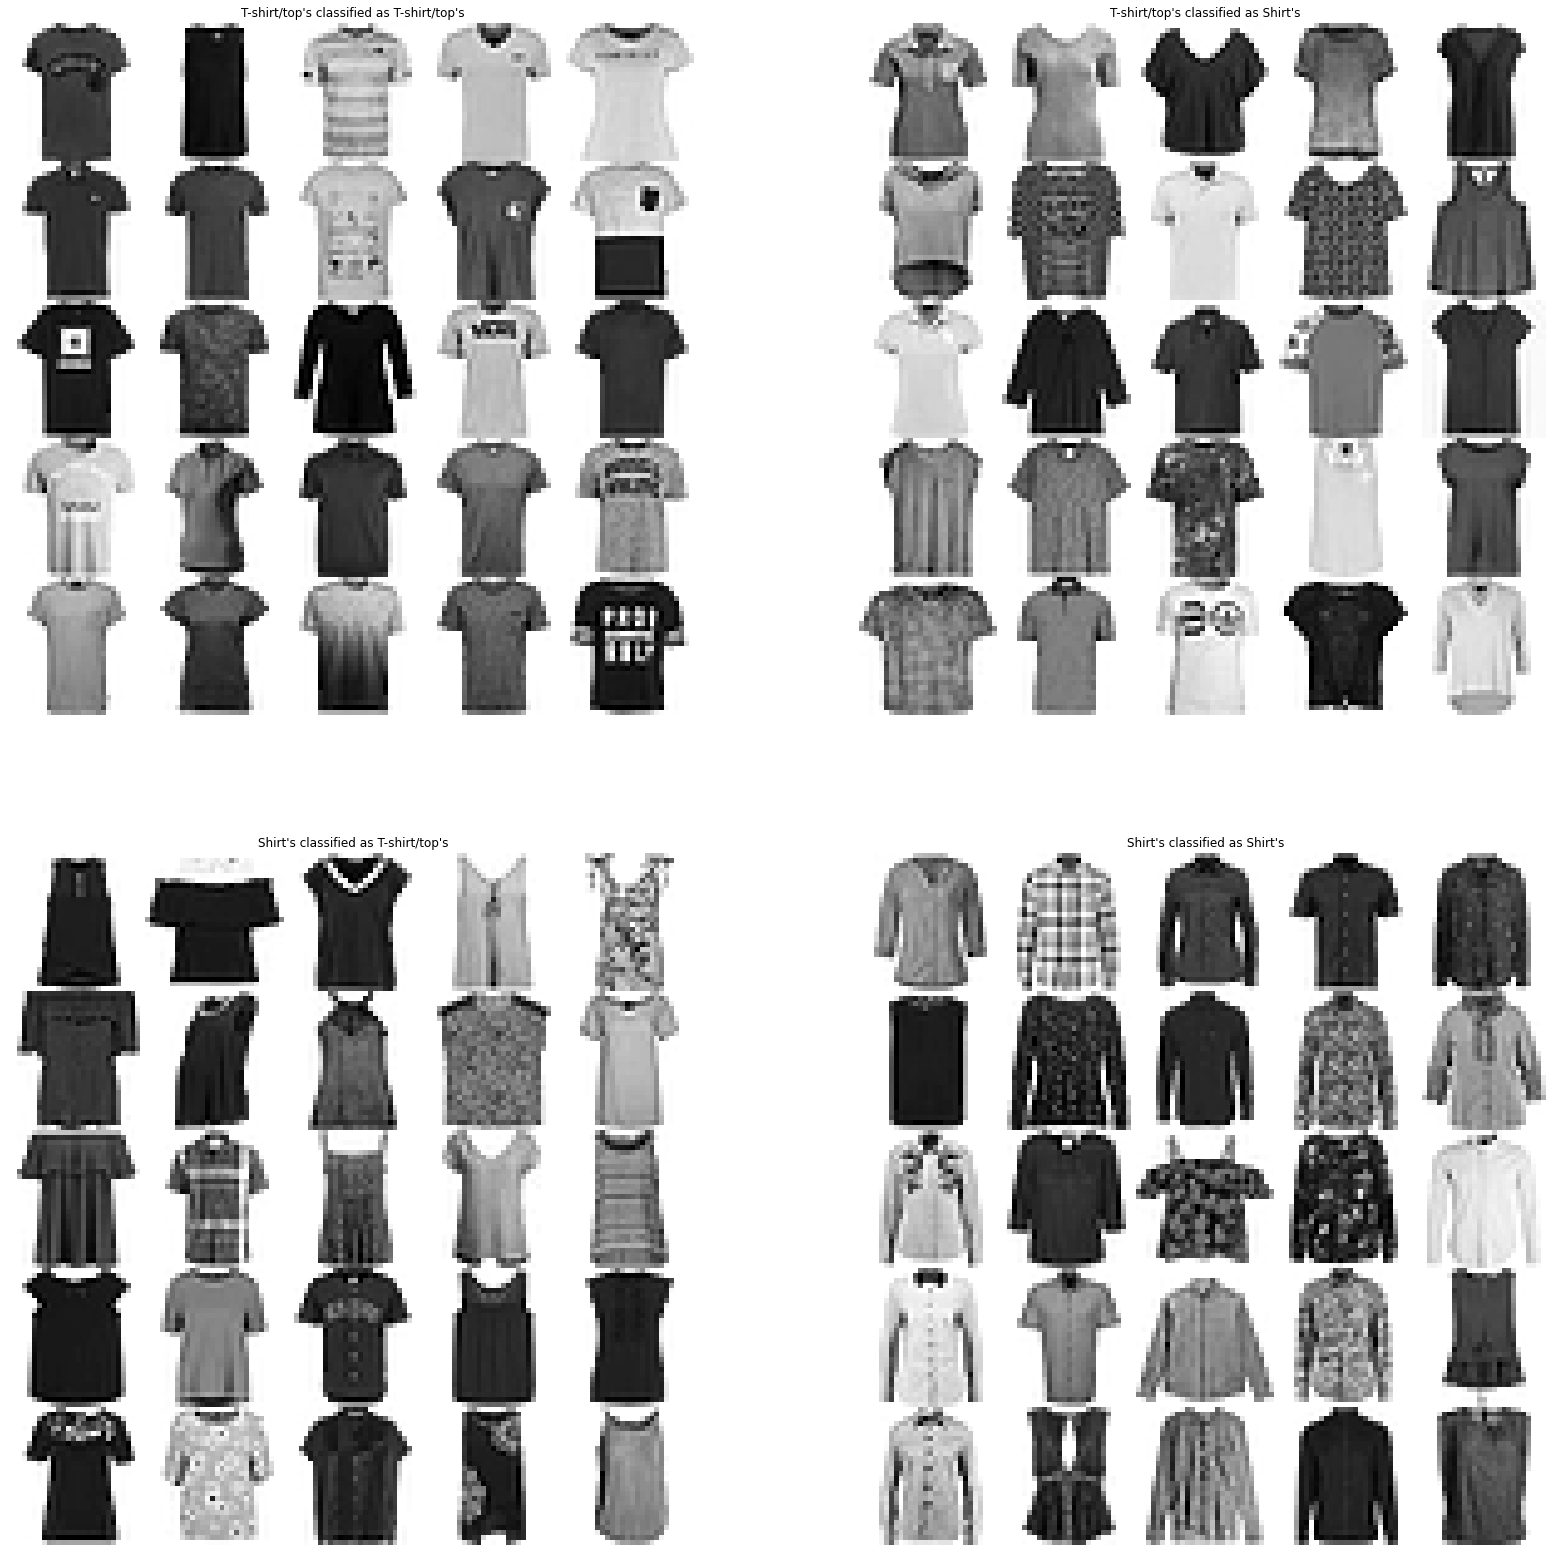

In [ ]:
pred_classes = np.argmax(exp3_best.predict(test_images_norm), axis=-1)

cl_a, cl_b = 0, 6
X_aa = test_images_norm[(test_labels == cl_a) & (pred_classes == cl_a)]
X_ab = test_images_norm[(test_labels == cl_a) & (pred_classes == cl_b)]
X_ba = test_images_norm[(test_labels == cl_b) & (pred_classes == cl_a)]
X_bb = test_images_norm[(test_labels == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(28,28))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);  
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{class_names[cl_a]}'s classified as {class_names[cl_a]}'s")
p2.set_title(f"{class_names[cl_a]}'s classified as {class_names[cl_b]}'s")
p3.set_title(f"{class_names[cl_b]}'s classified as {class_names[cl_a]}'s")
p4.set_title(f"{class_names[cl_b]}'s classified as {class_names[cl_b]}'s")

plt.show()

In [ ]:
# Extracts the outputs of the all the layers
layer_outputs = [layer.output for layer in exp3_best.layers]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=exp3_best.input, outputs=layer_outputs)

layer_names = []
for layer in exp3_best.layers:
    layer_names.append(layer.name)
    
layer_names

['conv2d_12',
 'max_pooling2d_12',
 'conv2d_13',
 'max_pooling2d_13',
 'flatten_54',
 'dense_192',
 'dense_193']

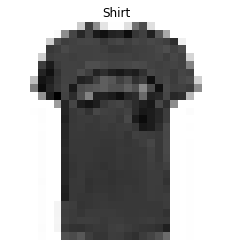

In [ ]:
from tensorflow.keras.preprocessing import image

(_,_), (test_images, test_labels) = fashion_mnist.load_data()

img = test_images[19]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# https://www.tensorflow.org/tutorials/keras/classification
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(img, cmap="binary")
plt.axis('off')
plt.title(class_names[test_labels[40]], fontsize=12)
plt.show()

In [ ]:
activations = activation_model.predict(img_tensor)
len(activations)

7

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


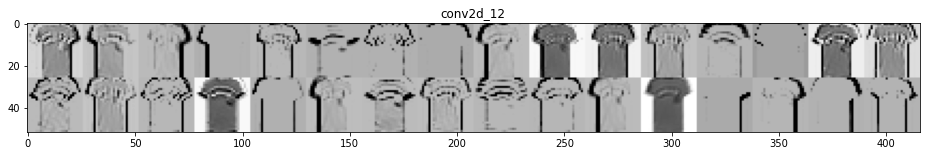

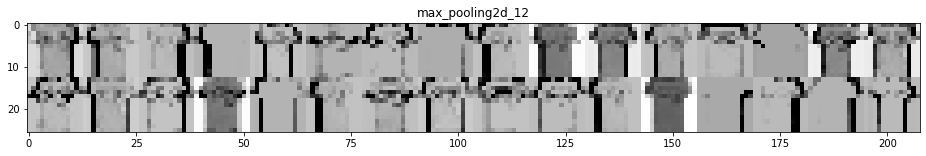

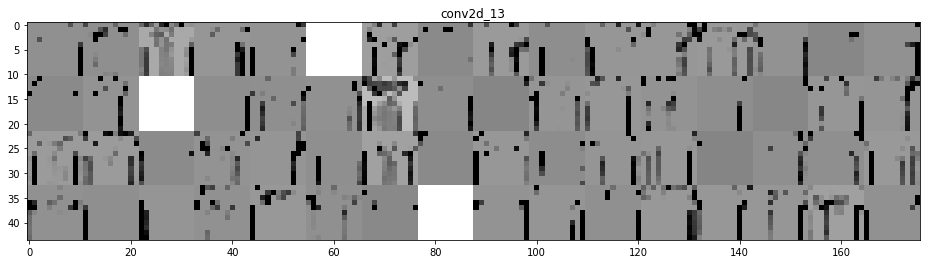

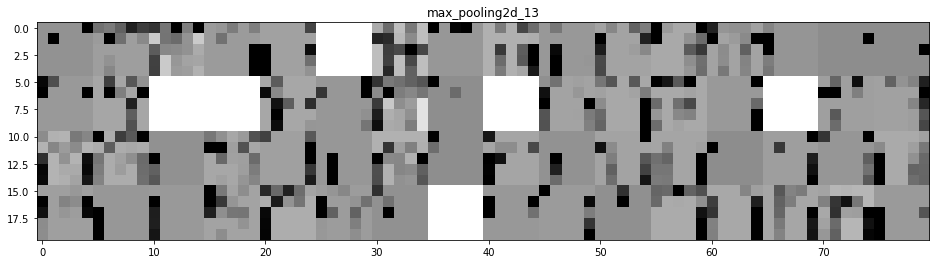

In [ ]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in exp3_best.layers:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    
    if layer_name[0:7] == 'flatten': 
        break
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='binary')
    
plt.show()

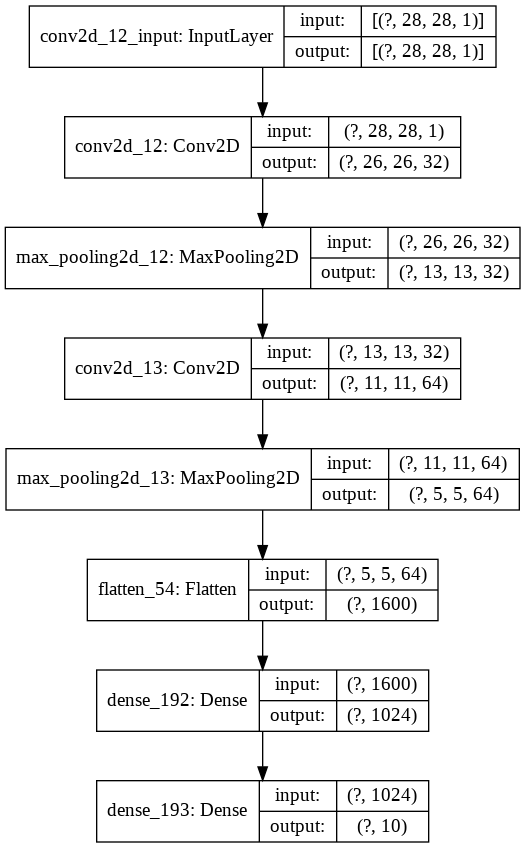

In [ ]:
keras.utils.plot_model(exp3_best, "Experiment3_Model.png", show_shapes=True)

# Additional Experiments

## Adjust Hidden Layer Size

In [ ]:
exp_denseSize_results = pd.DataFrame(columns=['Model','Dense Layer Size','Time','Test Accuracy'])

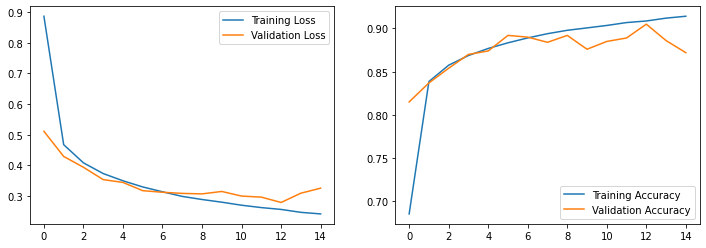

313/313 [==============================] - 3s 9ms/step - loss: 0.3170 - accuracy: 0.8859
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/exp_denseSize_10/assets


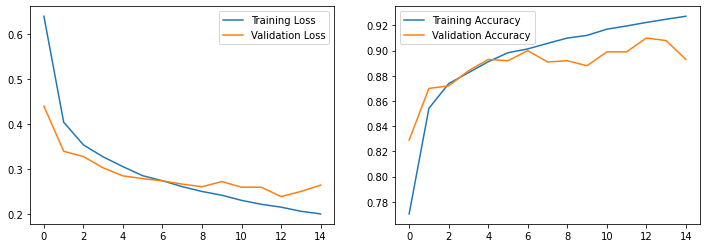

313/313 [==============================] - 3s 9ms/step - loss: 0.2768 - accuracy: 0.9039
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/exp_denseSize_20/assets


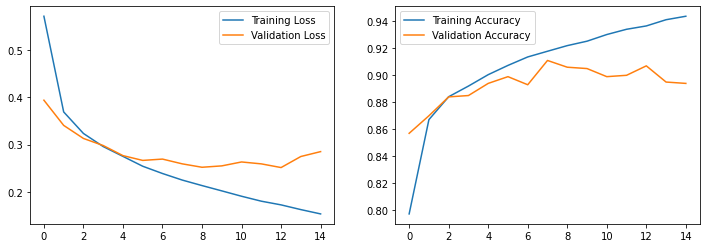

313/313 [==============================] - 3s 9ms/step - loss: 0.2768 - accuracy: 0.9040
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/exp_denseSize_40/assets


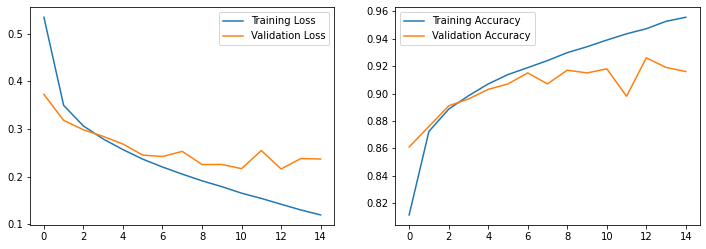

313/313 [==============================] - 3s 9ms/step - loss: 0.2775 - accuracy: 0.9085
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/exp_denseSize_80/assets


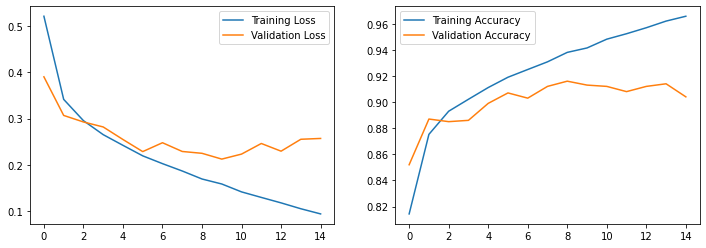

313/313 [==============================] - 3s 9ms/step - loss: 0.2914 - accuracy: 0.9098
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/exp_denseSize_160/assets


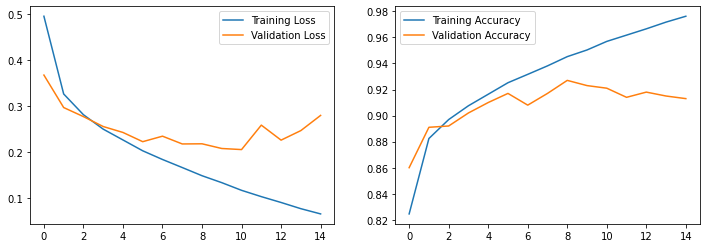

313/313 [==============================] - 3s 10ms/step - loss: 0.3262 - accuracy: 0.9131
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/exp_denseSize_320/assets


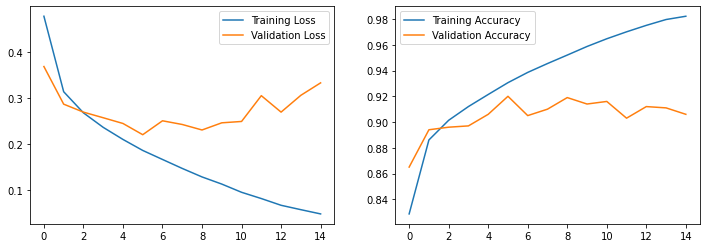

313/313 [==============================] - 3s 11ms/step - loss: 0.3483 - accuracy: 0.9116
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/exp_denseSize_640/assets


In [ ]:
for layer_size in [10, 20, 40, 80, 160, 320, 640]:
  
  seed(5)
  tf.random.set_seed(5)

  folder_name = 'exp_denseSize_' + str(layer_size)

  model = models.Sequential()

  model.add(layers.Conv2D(filters=32, kernel_size=(2,2), strides=(1,1), activation='relu', input_shape=(28,28,1)))
  model.add(layers.MaxPooling2D((2,2), strides=2))

  model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=2))

  model.add(layers.Flatten())
  model.add(layers.Dense(units=layer_size, activation='relu'))

  model.add(layers.Dense(units=10, activation='softmax'))

  model.compile(
      optimizer='adam', 
      loss='categorical_crossentropy', 
      metrics=['accuracy'])

  start_time = time.time()

  history = model.fit(
      x=train_images_norm, 
      y=train_labels_encoded, 
      epochs=15, 
      validation_split=(1/60), 
      batch_size=100,
      verbose=False)

  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  plt.figure(figsize=(12, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
      plt.subplot(1, 2, i + 1)
      plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
      plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
      plt.legend()
  plt.show()

  total_time = time.time() - start_time

  loss, accuracy = model.evaluate(test_images_norm, test_labels_encoded)

  results = {
      'Model':folder_name,
      'Dense Layer Size':layer_size,
      'Time':total_time,
      'Test Accuracy':accuracy
  }

  exp_denseSize_results = exp_denseSize_results.append(results, ignore_index=True)
  exp_denseSize_results.to_csv('/content/drive/My Drive/Colab Notebooks/denseSize_results.csv')

  model.save('/content/drive/My Drive/Colab Notebooks/'+folder_name)

exp_denseSize_results